In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from zipfile import ZipFile
import os
from os import path
import shutil

In [120]:
url = 'Dataset/'

In [121]:
# dataset_A = url + 'Dataset A.zip'
# with ZipFile(dataset_A, 'r') as zip:
#   zip.extractall()

In [122]:
PATH = 'Dataset/'
data_labels = pd.read_csv(PATH + 'training-c.csv', usecols = ['filename', 'digit'])
print(data_labels.shape)
data_labels.head()

(24298, 2)


filename  digit
0  c00000.png      6
1  c00001.png      1
2  c00002.png      3
3  c00003.png      2
4  c00004.png      7

In [123]:
# TRAIN_PATH = url + 'Train'
# os.mkdir(TRAIN_PATH)

# def processImages(folder_name):
#   src = PATH + folder_name + '/'
#   dir_folders = os.listdir(src)
#   for dir_name in dir_folders:
#     file_name = os.path.join(src, dir_name)
#     if os.path.isfile(file_name):
#       shutil.copy(file_name, TRAIN_PATH) 

# processImages('training-a')

In [124]:
TRAIN_PATH = url + 'training-c'


In [125]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [126]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(data_labels, TRAIN_PATH, train_transform)
test_data = Dataset(data_labels, TRAIN_PATH, test_transform)

print("Trainig Samples: ", len(train_data))

Trainig Samples:  24298


# **Base Parameters**

In [127]:
batch_size = 20
num_iters = 20000
input_dim = 28*28
num_hidden = 200
output_dim = 10

learning_rate = 0.01

num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

16


In [128]:
test_size = 0.2
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:972
Test dataloader:243


In [129]:
class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
       
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.ReLU()
#         self.softmax_1 = nn.Softmax(dim=1)
 
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.ReLU()
#         self.softmax_2 = nn.Softmax(dim=1)
 
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.ReLU()
#         self.softmax_3 = nn.Softmax(dim=1)
 
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.ReLU()
#         self.softmax_4 = nn.Softmax(dim=1)
 
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.ReLU()
#         self.softmax_5 = nn.Softmax(dim=1)
 
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.ReLU()
        

 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)
        
        
        probas  = self.linear_out(out)
        return probas

In [130]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [131]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [132]:
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter += 1

        if iter % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.279179811477661. Accuracy: 9.960897303972011
Iteration: 20. Loss: 2.3705573081970215. Accuracy: 9.837415105988887
Iteration: 30. Loss: 2.29461669921875. Accuracy: 9.837415105988887
Iteration: 40. Loss: 2.3065786361694336. Accuracy: 10.104959868285656
Iteration: 50. Loss: 2.3105709552764893. Accuracy: 10.104959868285656
Iteration: 60. Loss: 2.300959348678589. Accuracy: 10.043218769294093
Iteration: 70. Loss: 2.2989039421081543. Accuracy: 9.796254373327844
Iteration: 80. Loss: 2.3023300170898438. Accuracy: 9.713932908005763
Iteration: 90. Loss: 2.292788028717041. Accuracy: 9.713932908005763
Iteration: 100. Loss: 2.2924113273620605. Accuracy: 9.713932908005763
Iteration: 110. Loss: 2.305389404296875. Accuracy: 9.796254373327844
Iteration: 120. Loss: 2.300508975982666. Accuracy: 9.796254373327844
Iteration: 130. Loss: 2.3033862113952637. Accuracy: 9.713932908005763
Iteration: 140. Loss: 2.3154454231262207. Accuracy: 9.796254373327844
Iteration: 150. Loss: 2

Iteration: 1190. Loss: 2.3070952892303467. Accuracy: 10.660629759209714
Iteration: 1200. Loss: 2.3058149814605713. Accuracy: 10.660629759209714
Iteration: 1210. Loss: 2.2988829612731934. Accuracy: 10.660629759209714
Iteration: 1220. Loss: 2.3072943687438965. Accuracy: 9.837415105988887
Iteration: 1230. Loss: 2.298300266265869. Accuracy: 9.837415105988887
Iteration: 1240. Loss: 2.295316219329834. Accuracy: 9.837415105988887
Iteration: 1250. Loss: 2.3050551414489746. Accuracy: 9.837415105988887
Iteration: 1260. Loss: 2.3093419075012207. Accuracy: 9.837415105988887
Iteration: 1270. Loss: 2.3021175861358643. Accuracy: 9.837415105988887
Iteration: 1280. Loss: 2.2990689277648926. Accuracy: 9.837415105988887
Iteration: 1290. Loss: 2.2988486289978027. Accuracy: 9.837415105988887
Iteration: 1300. Loss: 2.301978349685669. Accuracy: 9.837415105988887
Iteration: 1310. Loss: 2.3078560829162598. Accuracy: 9.837415105988887
Iteration: 1320. Loss: 2.303046226501465. Accuracy: 9.837415105988887
Iterati

Iteration: 2350. Loss: 2.3008205890655518. Accuracy: 9.549289977361598
Iteration: 2360. Loss: 2.30690860748291. Accuracy: 9.549289977361598
Iteration: 2370. Loss: 2.3104851245880127. Accuracy: 9.549289977361598
Iteration: 2380. Loss: 2.3093278408050537. Accuracy: 9.549289977361598
Iteration: 2390. Loss: 2.3011364936828613. Accuracy: 9.549289977361598
Iteration: 2400. Loss: 2.307239055633545. Accuracy: 9.549289977361598
Iteration: 2410. Loss: 2.3011085987091064. Accuracy: 9.549289977361598
Iteration: 2420. Loss: 2.3069536685943604. Accuracy: 9.549289977361598
Iteration: 2430. Loss: 2.3081107139587402. Accuracy: 9.549289977361598
Iteration: 2440. Loss: 2.2969226837158203. Accuracy: 9.796254373327844
Iteration: 2450. Loss: 2.3068172931671143. Accuracy: 9.796254373327844
Iteration: 2460. Loss: 2.3028948307037354. Accuracy: 9.796254373327844
Iteration: 2470. Loss: 2.307347297668457. Accuracy: 9.796254373327844
Iteration: 2480. Loss: 2.307133436203003. Accuracy: 9.796254373327844
Iteration: 

Iteration: 3510. Loss: 2.305589199066162. Accuracy: 9.837415105988887
Iteration: 3520. Loss: 2.3081679344177246. Accuracy: 9.837415105988887
Iteration: 3530. Loss: 2.3016018867492676. Accuracy: 9.837415105988887
Iteration: 3540. Loss: 2.3029770851135254. Accuracy: 9.837415105988887
Iteration: 3550. Loss: 2.3072586059570312. Accuracy: 9.837415105988887
Iteration: 3560. Loss: 2.3150975704193115. Accuracy: 9.837415105988887
Iteration: 3570. Loss: 2.3054137229919434. Accuracy: 9.837415105988887
Iteration: 3580. Loss: 2.306558132171631. Accuracy: 9.837415105988887
Iteration: 3590. Loss: 2.304943084716797. Accuracy: 9.837415105988887
Iteration: 3600. Loss: 2.297523021697998. Accuracy: 9.837415105988887
Iteration: 3610. Loss: 2.3030006885528564. Accuracy: 9.837415105988887
Iteration: 3620. Loss: 2.308725357055664. Accuracy: 9.837415105988887
Iteration: 3630. Loss: 2.302391767501831. Accuracy: 9.837415105988887
Iteration: 3640. Loss: 2.2973151206970215. Accuracy: 9.837415105988887
Iteration: 3

Iteration: 4680. Loss: 2.3025426864624023. Accuracy: 9.837415105988887
Iteration: 4690. Loss: 2.301473379135132. Accuracy: 9.837415105988887
Iteration: 4700. Loss: 2.3056719303131104. Accuracy: 9.837415105988887
Iteration: 4710. Loss: 2.3067474365234375. Accuracy: 9.837415105988887
Iteration: 4720. Loss: 2.3040852546691895. Accuracy: 9.837415105988887
Iteration: 4730. Loss: 2.3016998767852783. Accuracy: 9.837415105988887
Iteration: 4740. Loss: 2.3023226261138916. Accuracy: 9.837415105988887
Iteration: 4750. Loss: 2.304661273956299. Accuracy: 9.837415105988887
Iteration: 4760. Loss: 2.3040218353271484. Accuracy: 9.837415105988887
Iteration: 4770. Loss: 2.2977514266967773. Accuracy: 9.837415105988887
Iteration: 4780. Loss: 2.3027119636535645. Accuracy: 9.837415105988887
Iteration: 4790. Loss: 2.300119638442993. Accuracy: 9.837415105988887
Iteration: 4800. Loss: 2.304839611053467. Accuracy: 9.837415105988887
Iteration: 4810. Loss: 2.308279514312744. Accuracy: 9.837415105988887
Iteration: 

Iteration: 5840. Loss: 2.3095040321350098. Accuracy: 9.796254373327844
Iteration: 5850. Loss: 2.30244779586792. Accuracy: 9.755093640666804
Iteration: 5860. Loss: 2.304319381713867. Accuracy: 9.755093640666804
Iteration: 5870. Loss: 2.3014843463897705. Accuracy: 9.755093640666804
Iteration: 5880. Loss: 2.3097662925720215. Accuracy: 9.755093640666804
Iteration: 5890. Loss: 2.2955985069274902. Accuracy: 9.755093640666804
Iteration: 5900. Loss: 2.294595718383789. Accuracy: 9.755093640666804
Iteration: 5910. Loss: 2.3055806159973145. Accuracy: 9.755093640666804
Iteration: 5920. Loss: 2.3025572299957275. Accuracy: 9.755093640666804
Iteration: 5930. Loss: 2.2986502647399902. Accuracy: 9.755093640666804
Iteration: 5940. Loss: 2.3056397438049316. Accuracy: 9.755093640666804
Iteration: 5950. Loss: 2.3034589290618896. Accuracy: 9.755093640666804
Iteration: 5960. Loss: 2.3030025959014893. Accuracy: 9.755093640666804
Iteration: 5970. Loss: 2.3026041984558105. Accuracy: 9.755093640666804
Iteration:

Iteration: 7000. Loss: 2.3054862022399902. Accuracy: 9.796254373327844
Iteration: 7010. Loss: 2.2942705154418945. Accuracy: 9.796254373327844
Iteration: 7020. Loss: 2.3006539344787598. Accuracy: 9.796254373327844
Iteration: 7030. Loss: 2.303863048553467. Accuracy: 9.796254373327844
Iteration: 7040. Loss: 2.301431655883789. Accuracy: 9.796254373327844
Iteration: 7050. Loss: 2.2970352172851562. Accuracy: 9.796254373327844
Iteration: 7060. Loss: 2.3093130588531494. Accuracy: 9.796254373327844
Iteration: 7070. Loss: 2.2985267639160156. Accuracy: 9.796254373327844
Iteration: 7080. Loss: 2.2983319759368896. Accuracy: 9.796254373327844
Iteration: 7090. Loss: 2.3045265674591064. Accuracy: 9.796254373327844
Iteration: 7100. Loss: 2.301682233810425. Accuracy: 9.796254373327844
Iteration: 7110. Loss: 2.3094677925109863. Accuracy: 9.796254373327844
Iteration: 7120. Loss: 2.3049731254577637. Accuracy: 9.796254373327844
Iteration: 7130. Loss: 2.3076934814453125. Accuracy: 9.796254373327844
Iteration

Iteration: 8160. Loss: 2.304431438446045. Accuracy: 9.755093640666804
Iteration: 8170. Loss: 2.3041460514068604. Accuracy: 9.755093640666804
Iteration: 8180. Loss: 2.299748182296753. Accuracy: 9.755093640666804
Iteration: 8190. Loss: 2.30361008644104. Accuracy: 9.837415105988887
Iteration: 8200. Loss: 2.300039291381836. Accuracy: 9.837415105988887
Iteration: 8210. Loss: 2.301414728164673. Accuracy: 9.837415105988887
Iteration: 8220. Loss: 2.299790859222412. Accuracy: 9.837415105988887
Iteration: 8230. Loss: 2.3019421100616455. Accuracy: 9.837415105988887
Iteration: 8240. Loss: 2.3004250526428223. Accuracy: 9.837415105988887
Iteration: 8250. Loss: 2.302733898162842. Accuracy: 9.837415105988887
Iteration: 8260. Loss: 2.3003132343292236. Accuracy: 9.837415105988887
Iteration: 8270. Loss: 2.3017578125. Accuracy: 9.837415105988887
Iteration: 8280. Loss: 2.2990939617156982. Accuracy: 9.837415105988887
Iteration: 8290. Loss: 2.3035428524017334. Accuracy: 9.796254373327844
Iteration: 8300. Los

Iteration: 9320. Loss: 2.3018832206726074. Accuracy: 9.796254373327844
Iteration: 9330. Loss: 2.3077590465545654. Accuracy: 9.796254373327844
Iteration: 9340. Loss: 2.302490711212158. Accuracy: 9.796254373327844
Iteration: 9350. Loss: 2.3068599700927734. Accuracy: 9.796254373327844
Iteration: 9360. Loss: 2.303152322769165. Accuracy: 9.837415105988887
Iteration: 9370. Loss: 2.3034064769744873. Accuracy: 9.837415105988887
Iteration: 9380. Loss: 2.3120062351226807. Accuracy: 9.837415105988887
Iteration: 9390. Loss: 2.310232639312744. Accuracy: 9.837415105988887
Iteration: 9400. Loss: 2.3006622791290283. Accuracy: 9.837415105988887
Iteration: 9410. Loss: 2.304928779602051. Accuracy: 9.837415105988887
Iteration: 9420. Loss: 2.302415370941162. Accuracy: 9.837415105988887
Iteration: 9430. Loss: 2.305138111114502. Accuracy: 9.837415105988887
Iteration: 9440. Loss: 2.3035426139831543. Accuracy: 9.837415105988887
Iteration: 9450. Loss: 2.2998359203338623. Accuracy: 9.837415105988887
Iteration: 9

Iteration: 10470. Loss: 2.303234577178955. Accuracy: 9.837415105988887
Iteration: 10480. Loss: 2.3032546043395996. Accuracy: 9.837415105988887
Iteration: 10490. Loss: 2.305112600326538. Accuracy: 9.837415105988887
Iteration: 10500. Loss: 2.2998428344726562. Accuracy: 9.713932908005763
Iteration: 10510. Loss: 2.3043389320373535. Accuracy: 9.713932908005763
Iteration: 10520. Loss: 2.3032796382904053. Accuracy: 9.713932908005763
Iteration: 10530. Loss: 2.3091464042663574. Accuracy: 9.713932908005763
Iteration: 10540. Loss: 2.3061695098876953. Accuracy: 9.713932908005763
Iteration: 10550. Loss: 2.3051352500915527. Accuracy: 9.713932908005763
Iteration: 10560. Loss: 2.3020596504211426. Accuracy: 9.713932908005763
Iteration: 10570. Loss: 2.3049042224884033. Accuracy: 9.713932908005763
Iteration: 10580. Loss: 2.3007054328918457. Accuracy: 9.713932908005763
Iteration: 10590. Loss: 2.303950548171997. Accuracy: 9.713932908005763
Iteration: 10600. Loss: 2.297508716583252. Accuracy: 9.713932908005

Iteration: 11620. Loss: 2.305983066558838. Accuracy: 9.755093640666804
Iteration: 11630. Loss: 2.3095319271087646. Accuracy: 9.755093640666804
Iteration: 11640. Loss: 2.3064417839050293. Accuracy: 9.755093640666804
Iteration: 11650. Loss: 2.3041787147521973. Accuracy: 9.755093640666804
Iteration: 11660. Loss: 2.3042056560516357. Accuracy: 9.755093640666804
Epoch:  13
Iteration: 11670. Loss: 2.3032517433166504. Accuracy: 9.755093640666804
Iteration: 11680. Loss: 2.3048205375671387. Accuracy: 9.755093640666804
Iteration: 11690. Loss: 2.307288646697998. Accuracy: 9.755093640666804
Iteration: 11700. Loss: 2.299572229385376. Accuracy: 9.755093640666804
Iteration: 11710. Loss: 2.300525188446045. Accuracy: 9.549289977361598
Iteration: 11720. Loss: 2.3046152591705322. Accuracy: 9.755093640666804
Iteration: 11730. Loss: 2.2995500564575195. Accuracy: 9.755093640666804
Iteration: 11740. Loss: 2.29895281791687. Accuracy: 9.755093640666804
Iteration: 11750. Loss: 2.3041093349456787. Accuracy: 9.755

Iteration: 12770. Loss: 2.3038134574890137. Accuracy: 9.713932908005763
Iteration: 12780. Loss: 2.297664165496826. Accuracy: 9.713932908005763
Iteration: 12790. Loss: 2.300401449203491. Accuracy: 9.713932908005763
Iteration: 12800. Loss: 2.29817533493042. Accuracy: 9.713932908005763
Iteration: 12810. Loss: 2.3044023513793945. Accuracy: 9.713932908005763
Iteration: 12820. Loss: 2.303288698196411. Accuracy: 9.713932908005763
Iteration: 12830. Loss: 2.306664228439331. Accuracy: 9.713932908005763
Iteration: 12840. Loss: 2.303384780883789. Accuracy: 9.713932908005763
Iteration: 12850. Loss: 2.3033595085144043. Accuracy: 9.713932908005763
Iteration: 12860. Loss: 2.3081228733062744. Accuracy: 9.713932908005763
Iteration: 12870. Loss: 2.3024678230285645. Accuracy: 10.104959868285656
Iteration: 12880. Loss: 2.306272268295288. Accuracy: 10.104959868285656
Iteration: 12890. Loss: 2.3031294345855713. Accuracy: 10.104959868285656
Iteration: 12900. Loss: 2.304781913757324. Accuracy: 10.1049598682856

Iteration: 13920. Loss: 2.308441638946533. Accuracy: 9.713932908005763
Iteration: 13930. Loss: 2.3049018383026123. Accuracy: 9.837415105988887
Iteration: 13940. Loss: 2.302534341812134. Accuracy: 9.837415105988887
Iteration: 13950. Loss: 2.3027536869049072. Accuracy: 9.837415105988887
Iteration: 13960. Loss: 2.3028695583343506. Accuracy: 9.837415105988887
Iteration: 13970. Loss: 2.296785593032837. Accuracy: 9.837415105988887
Iteration: 13980. Loss: 2.307729482650757. Accuracy: 9.837415105988887
Iteration: 13990. Loss: 2.300260066986084. Accuracy: 9.837415105988887
Iteration: 14000. Loss: 2.304640769958496. Accuracy: 9.837415105988887
Iteration: 14010. Loss: 2.305063009262085. Accuracy: 9.837415105988887
Iteration: 14020. Loss: 2.307314395904541. Accuracy: 9.837415105988887
Iteration: 14030. Loss: 2.2988386154174805. Accuracy: 9.837415105988887
Iteration: 14040. Loss: 2.305030345916748. Accuracy: 9.837415105988887
Iteration: 14050. Loss: 2.3010807037353516. Accuracy: 9.837415105988887
I

Iteration: 15070. Loss: 2.304267406463623. Accuracy: 9.837415105988887
Iteration: 15080. Loss: 2.3047080039978027. Accuracy: 9.837415105988887
Iteration: 15090. Loss: 2.303762197494507. Accuracy: 9.837415105988887
Iteration: 15100. Loss: 2.304394006729126. Accuracy: 9.837415105988887
Iteration: 15110. Loss: 2.301623821258545. Accuracy: 9.837415105988887
Iteration: 15120. Loss: 2.302582025527954. Accuracy: 9.837415105988887
Iteration: 15130. Loss: 2.304283380508423. Accuracy: 9.713932908005763
Iteration: 15140. Loss: 2.3022613525390625. Accuracy: 9.837415105988887
Iteration: 15150. Loss: 2.2995073795318604. Accuracy: 9.713932908005763
Iteration: 15160. Loss: 2.304635524749756. Accuracy: 9.837415105988887
Iteration: 15170. Loss: 2.304645538330078. Accuracy: 9.837415105988887
Iteration: 15180. Loss: 2.304184675216675. Accuracy: 9.837415105988887
Iteration: 15190. Loss: 2.307556629180908. Accuracy: 9.837415105988887
Iteration: 15200. Loss: 2.30381178855896. Accuracy: 9.837415105988887
Iter

In [133]:
torch.save(model.state_dict(), 'model_base_ex_1.pkl')

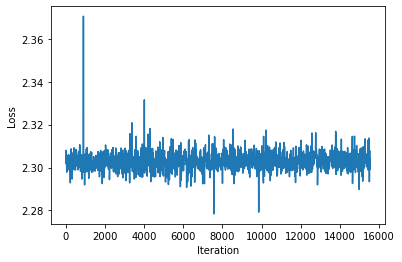

In [36]:
# print (iteration_loss)
plt.plot(range(0,15550,10),it)
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.show()

In [35]:
it = np.array(iteration_loss)
np.random.shuffle(it)

None


In [135]:
print(accuracy)

9.796254373327844


In [160]:
from sklearn.metrics import accuracy_score

def evaluate_model(test_dl, model):
    model.eval() 
    total = 0
    correct = 0
    for images, labels in test_dl:
        
#         image = images.reshape(28, 28, 1)
        print(images.shape)
    
        # Show result
               
        images = images.view(-1, 28*28).to(device)
        

        outputs = model(images)

        _, predicted = torch.max(outputs, 1)

        plt.imshow(images[0].reshape(28, 28, 1), cmap='gray')
        plt.title(f'Prediction: {predicted[0]} - Actual target: {labels[0]}')
        plt.show()


        total += labels.size(0)

        if torch.cuda.is_available():
            correct += (predicted.cpu() == labels.cpu()).sum() 
        else:
            correct += (predicted == labels).sum()

    acc = 100 * correct.item() / total
    return acc

torch.Size([20, 1, 28, 28])


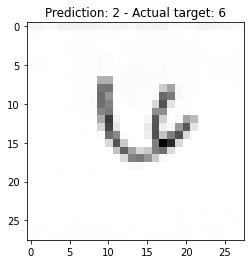

torch.Size([20, 1, 28, 28])


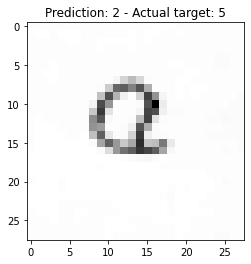

torch.Size([20, 1, 28, 28])


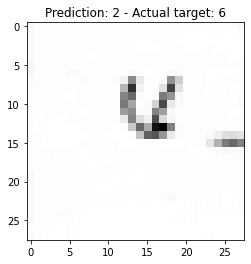

torch.Size([20, 1, 28, 28])


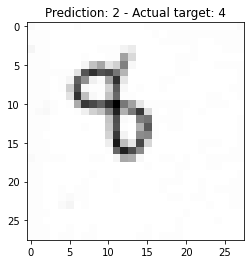

torch.Size([20, 1, 28, 28])


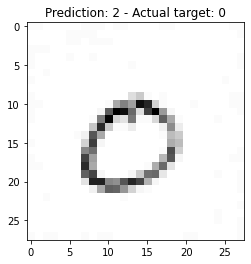

torch.Size([20, 1, 28, 28])


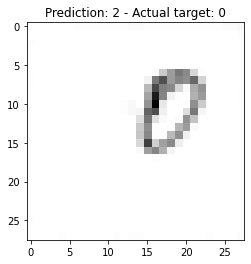

torch.Size([20, 1, 28, 28])


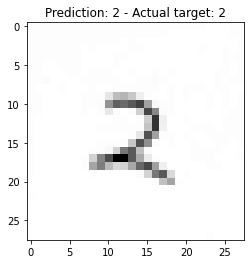

torch.Size([20, 1, 28, 28])


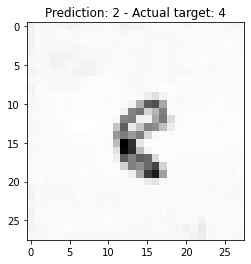

torch.Size([20, 1, 28, 28])


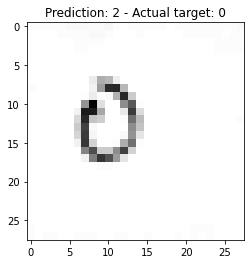

torch.Size([20, 1, 28, 28])


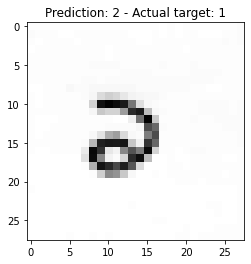

torch.Size([20, 1, 28, 28])


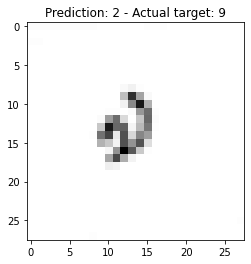

torch.Size([20, 1, 28, 28])


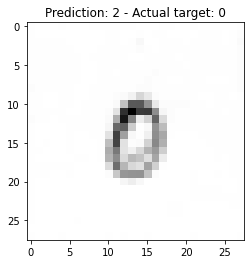

torch.Size([20, 1, 28, 28])


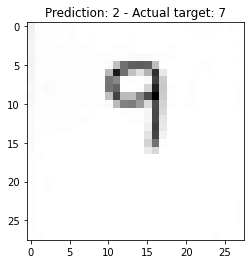

torch.Size([20, 1, 28, 28])


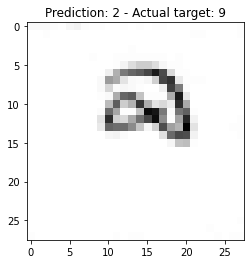

torch.Size([20, 1, 28, 28])


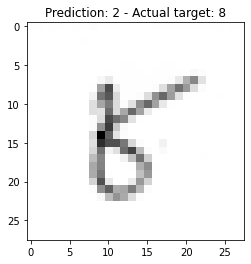

torch.Size([20, 1, 28, 28])


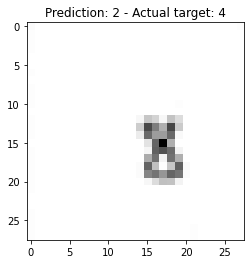

torch.Size([20, 1, 28, 28])


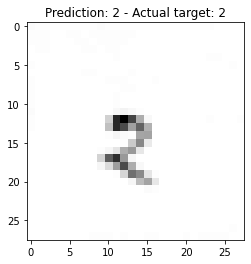

torch.Size([20, 1, 28, 28])


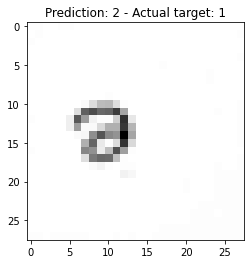

torch.Size([20, 1, 28, 28])


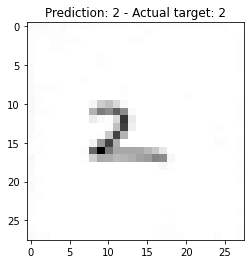

torch.Size([20, 1, 28, 28])


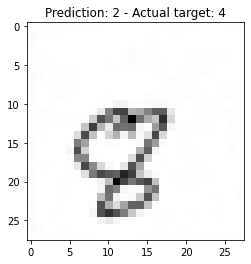

torch.Size([20, 1, 28, 28])


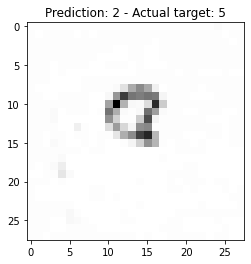

torch.Size([20, 1, 28, 28])


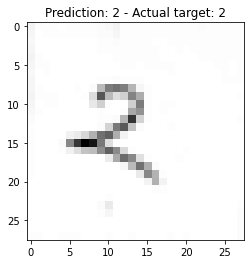

torch.Size([20, 1, 28, 28])


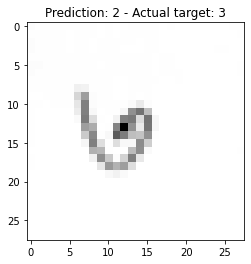

torch.Size([20, 1, 28, 28])


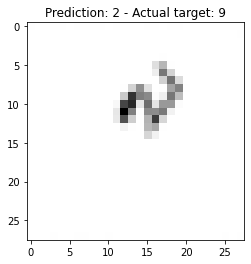

torch.Size([20, 1, 28, 28])


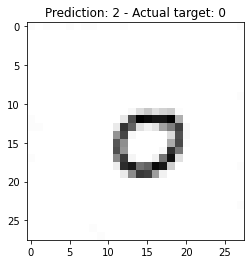

torch.Size([20, 1, 28, 28])


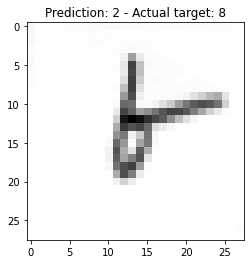

torch.Size([20, 1, 28, 28])


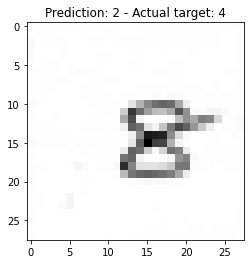

torch.Size([20, 1, 28, 28])


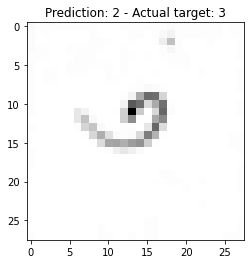

torch.Size([20, 1, 28, 28])


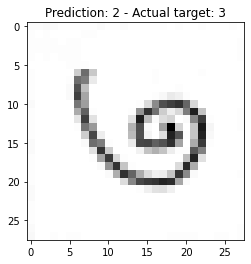

torch.Size([20, 1, 28, 28])


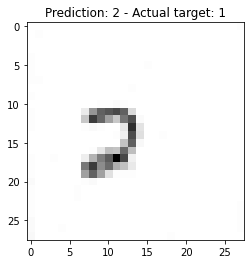

torch.Size([20, 1, 28, 28])


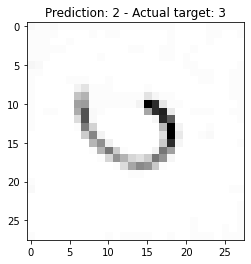

torch.Size([20, 1, 28, 28])


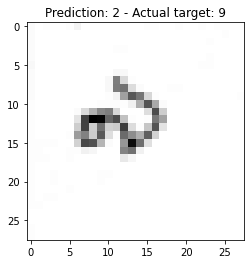

torch.Size([20, 1, 28, 28])


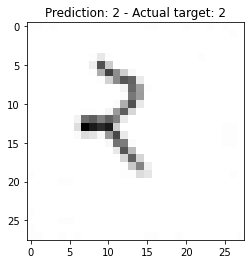

torch.Size([20, 1, 28, 28])


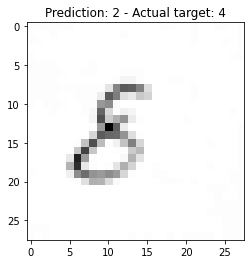

torch.Size([20, 1, 28, 28])


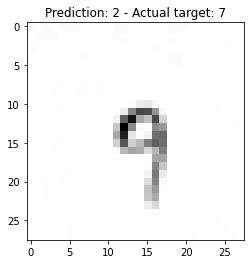

torch.Size([20, 1, 28, 28])


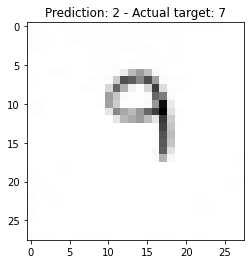

torch.Size([20, 1, 28, 28])


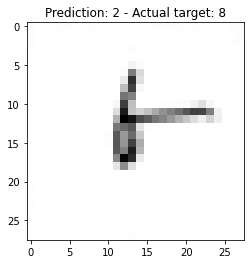

torch.Size([20, 1, 28, 28])


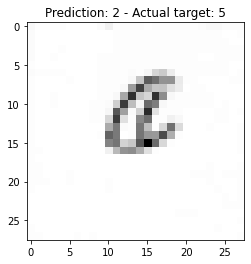

torch.Size([20, 1, 28, 28])


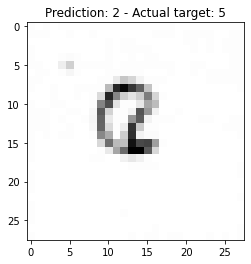

torch.Size([20, 1, 28, 28])


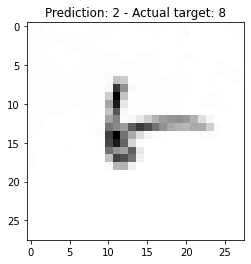

torch.Size([20, 1, 28, 28])


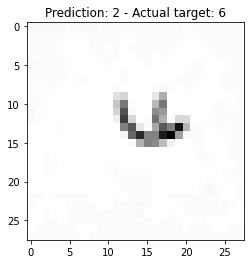

torch.Size([20, 1, 28, 28])


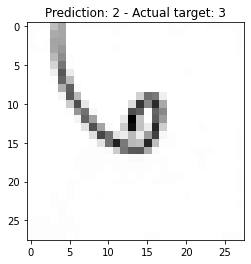

torch.Size([20, 1, 28, 28])


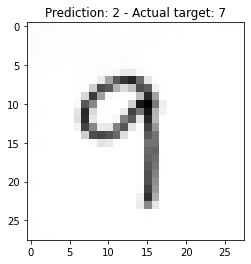

torch.Size([20, 1, 28, 28])


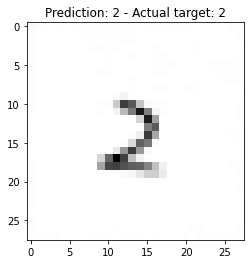

torch.Size([20, 1, 28, 28])


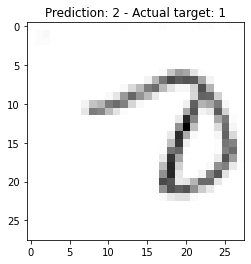

torch.Size([20, 1, 28, 28])


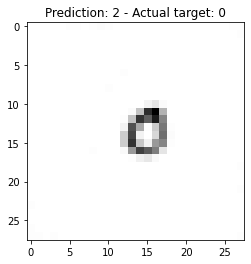

torch.Size([20, 1, 28, 28])


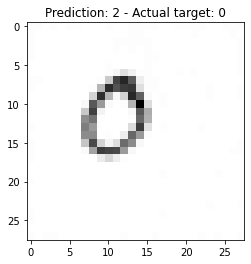

torch.Size([20, 1, 28, 28])


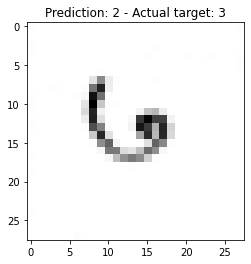

torch.Size([20, 1, 28, 28])


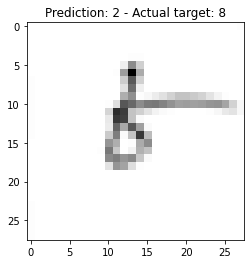

torch.Size([20, 1, 28, 28])


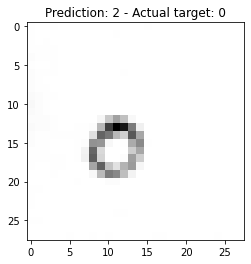

torch.Size([20, 1, 28, 28])


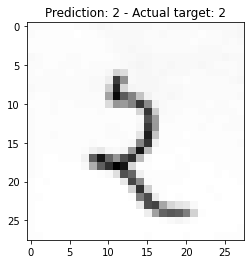

torch.Size([20, 1, 28, 28])


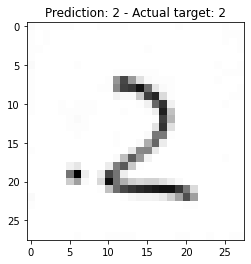

torch.Size([20, 1, 28, 28])


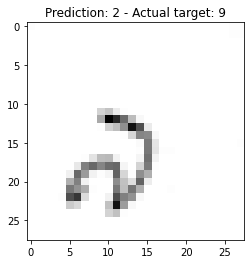

torch.Size([20, 1, 28, 28])


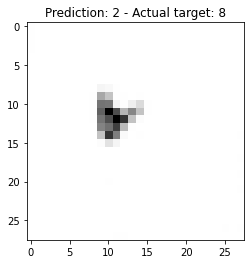

torch.Size([20, 1, 28, 28])


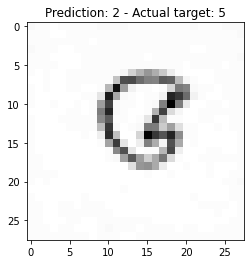

torch.Size([20, 1, 28, 28])


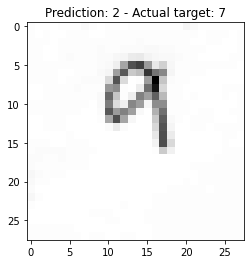

torch.Size([20, 1, 28, 28])


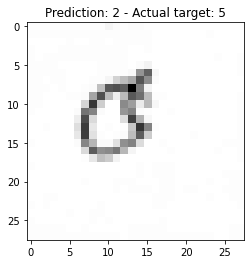

torch.Size([20, 1, 28, 28])


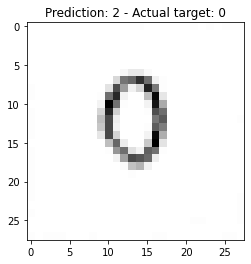

torch.Size([20, 1, 28, 28])


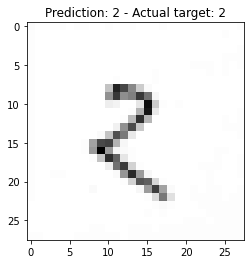

torch.Size([20, 1, 28, 28])


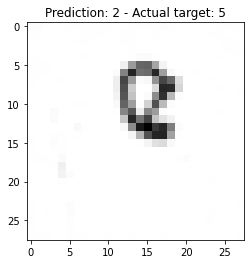

torch.Size([20, 1, 28, 28])


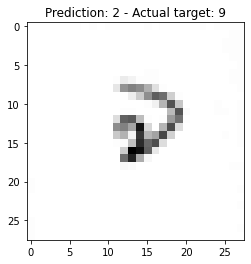

torch.Size([20, 1, 28, 28])


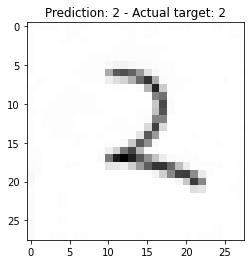

torch.Size([20, 1, 28, 28])


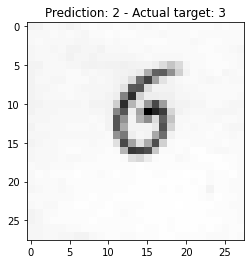

torch.Size([20, 1, 28, 28])


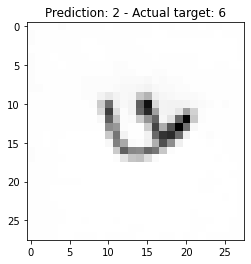

torch.Size([20, 1, 28, 28])


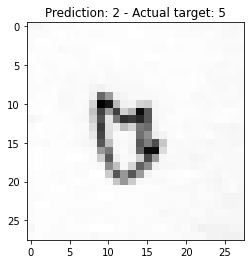

torch.Size([20, 1, 28, 28])


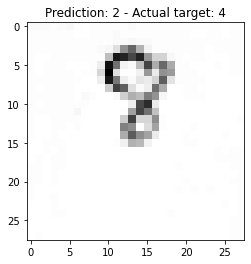

torch.Size([20, 1, 28, 28])


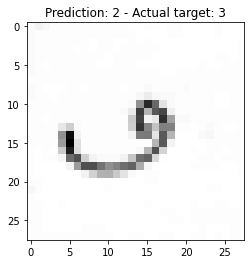

torch.Size([20, 1, 28, 28])


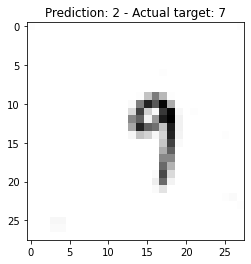

torch.Size([20, 1, 28, 28])


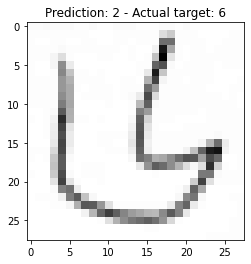

torch.Size([20, 1, 28, 28])


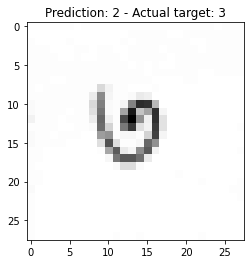

torch.Size([20, 1, 28, 28])


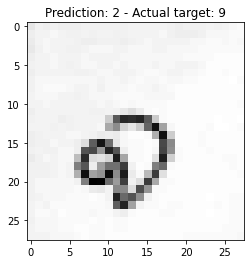

torch.Size([20, 1, 28, 28])


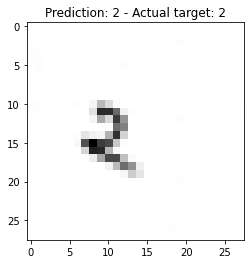

torch.Size([20, 1, 28, 28])


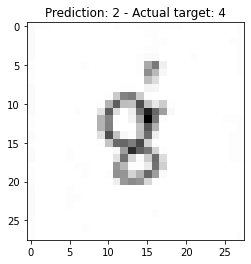

torch.Size([20, 1, 28, 28])


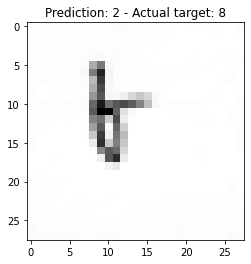

torch.Size([20, 1, 28, 28])


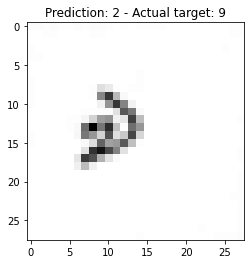

torch.Size([20, 1, 28, 28])


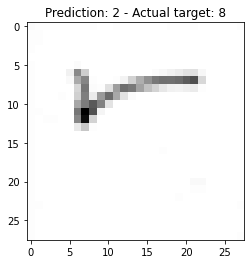

torch.Size([20, 1, 28, 28])


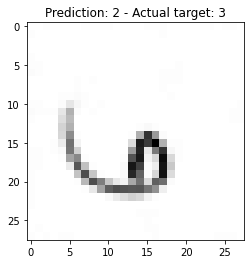

torch.Size([20, 1, 28, 28])


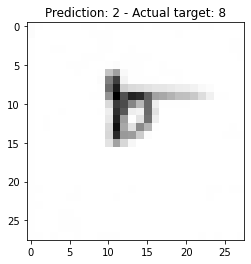

torch.Size([20, 1, 28, 28])


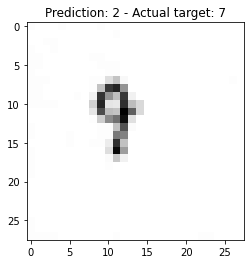

torch.Size([20, 1, 28, 28])


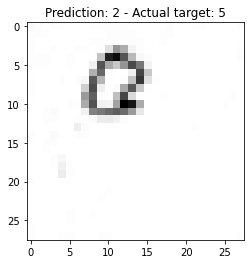

torch.Size([20, 1, 28, 28])


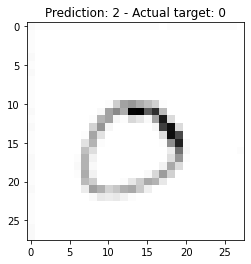

torch.Size([20, 1, 28, 28])


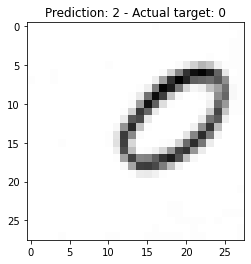

torch.Size([20, 1, 28, 28])


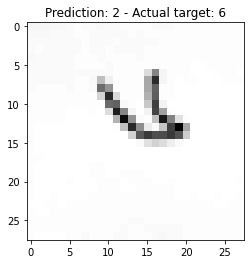

torch.Size([20, 1, 28, 28])


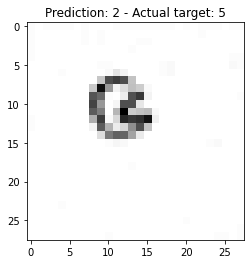

torch.Size([20, 1, 28, 28])


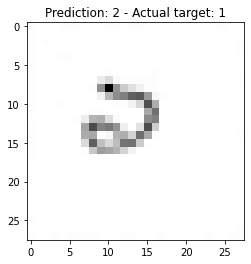

torch.Size([20, 1, 28, 28])


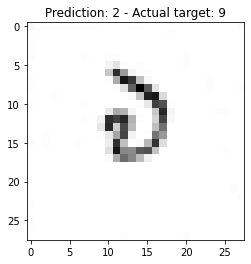

torch.Size([20, 1, 28, 28])


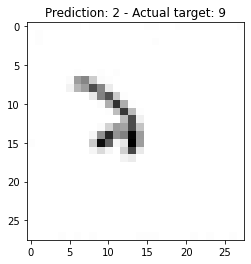

torch.Size([20, 1, 28, 28])


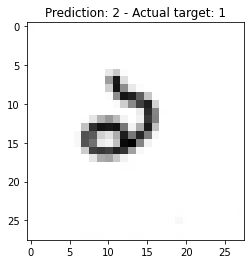

torch.Size([20, 1, 28, 28])


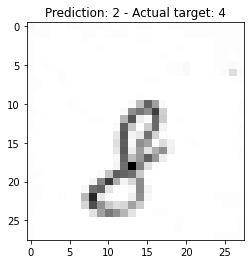

torch.Size([20, 1, 28, 28])


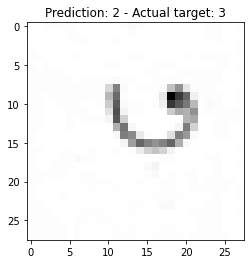

torch.Size([20, 1, 28, 28])


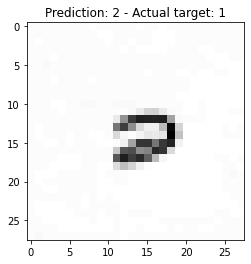

torch.Size([20, 1, 28, 28])


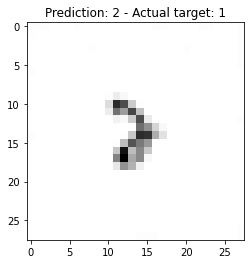

torch.Size([20, 1, 28, 28])


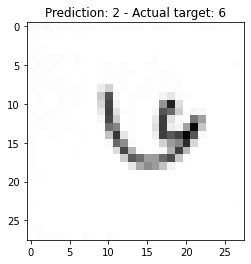

torch.Size([20, 1, 28, 28])


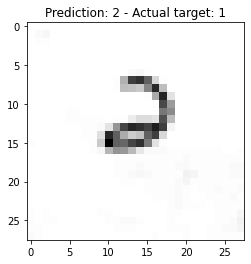

torch.Size([20, 1, 28, 28])


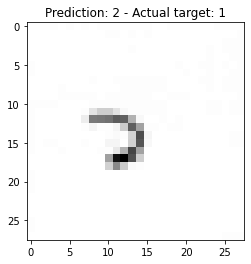

torch.Size([20, 1, 28, 28])


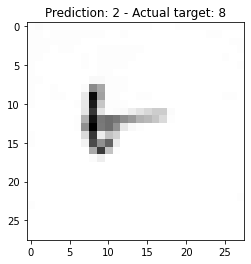

torch.Size([20, 1, 28, 28])


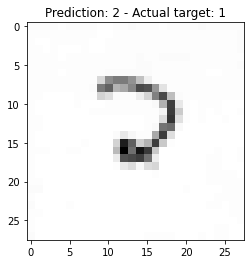

torch.Size([20, 1, 28, 28])


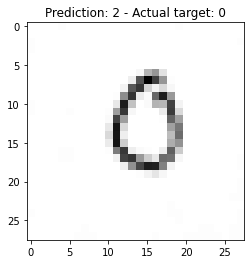

torch.Size([20, 1, 28, 28])


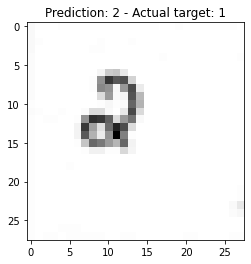

torch.Size([20, 1, 28, 28])


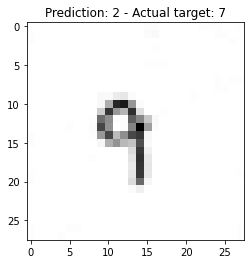

torch.Size([20, 1, 28, 28])


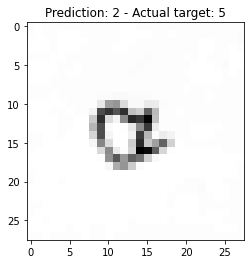

torch.Size([20, 1, 28, 28])


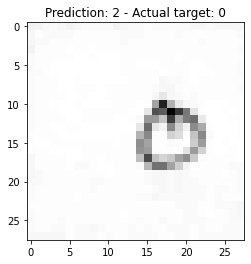

torch.Size([20, 1, 28, 28])


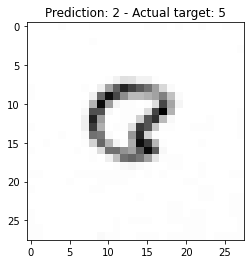

torch.Size([20, 1, 28, 28])


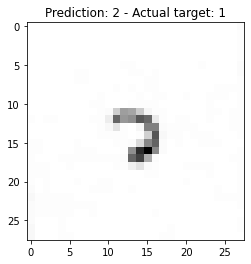

torch.Size([20, 1, 28, 28])


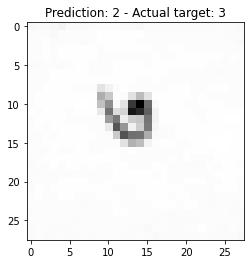

torch.Size([20, 1, 28, 28])


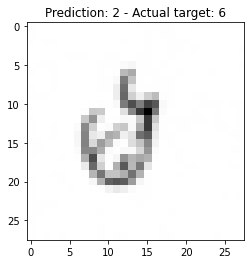

torch.Size([20, 1, 28, 28])


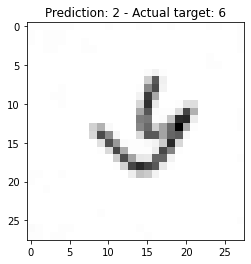

torch.Size([20, 1, 28, 28])


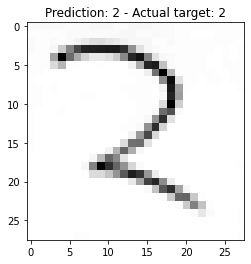

torch.Size([20, 1, 28, 28])


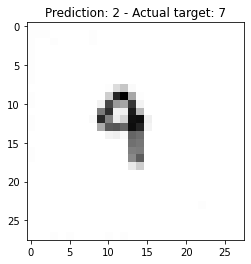

torch.Size([20, 1, 28, 28])


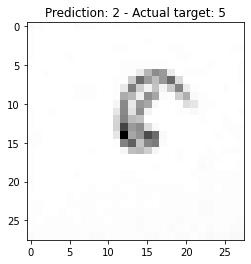

torch.Size([20, 1, 28, 28])


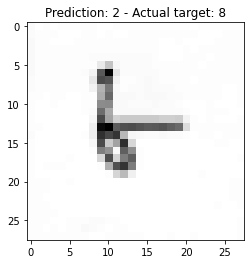

torch.Size([20, 1, 28, 28])


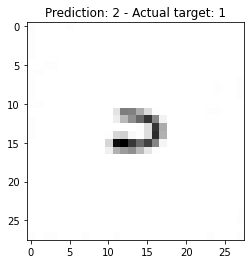

torch.Size([20, 1, 28, 28])


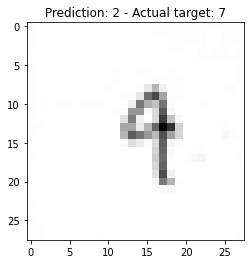

torch.Size([20, 1, 28, 28])


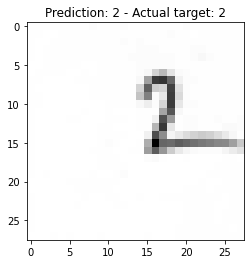

torch.Size([20, 1, 28, 28])


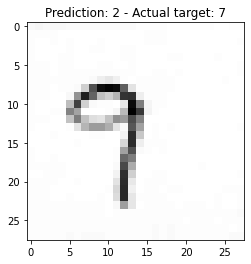

torch.Size([20, 1, 28, 28])


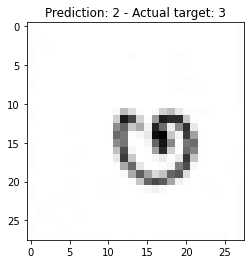

torch.Size([20, 1, 28, 28])


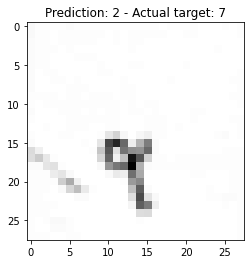

torch.Size([20, 1, 28, 28])


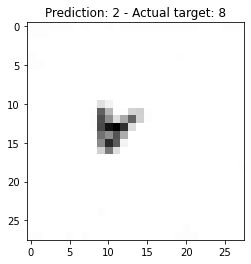

torch.Size([20, 1, 28, 28])


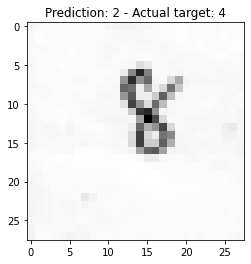

torch.Size([20, 1, 28, 28])


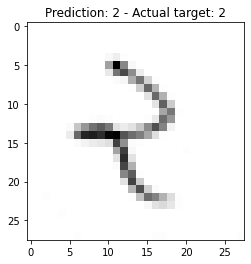

torch.Size([20, 1, 28, 28])


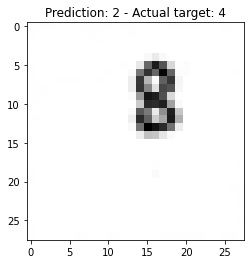

torch.Size([20, 1, 28, 28])


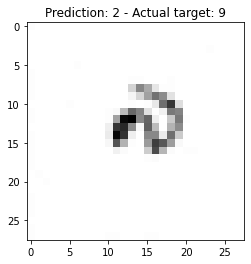

torch.Size([20, 1, 28, 28])


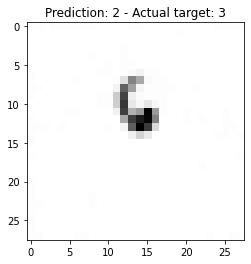

torch.Size([20, 1, 28, 28])


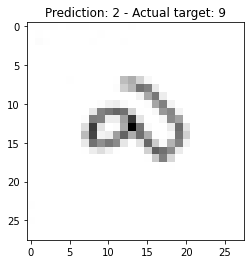

torch.Size([20, 1, 28, 28])


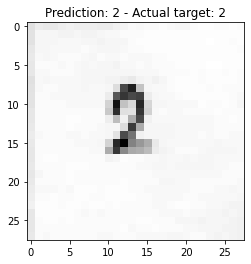

torch.Size([20, 1, 28, 28])


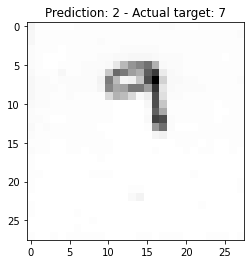

torch.Size([20, 1, 28, 28])


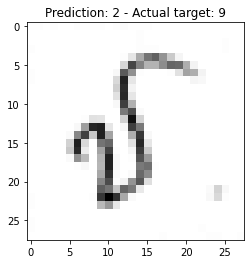

torch.Size([20, 1, 28, 28])


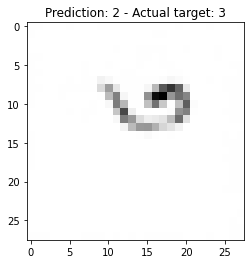

torch.Size([20, 1, 28, 28])


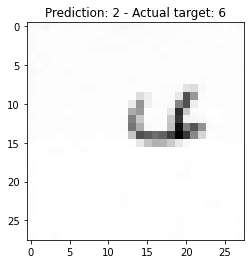

torch.Size([20, 1, 28, 28])


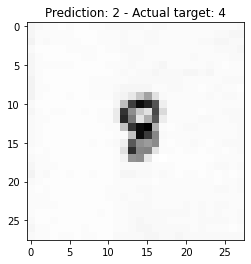

torch.Size([20, 1, 28, 28])


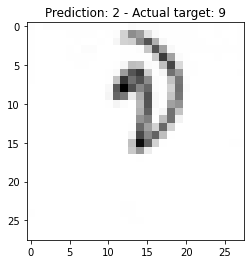

torch.Size([20, 1, 28, 28])


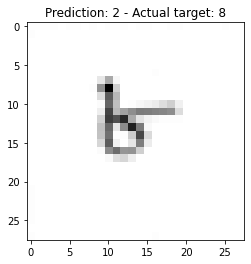

torch.Size([20, 1, 28, 28])


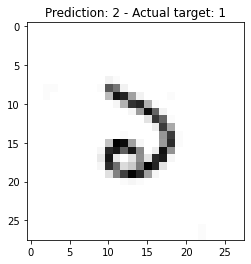

torch.Size([20, 1, 28, 28])


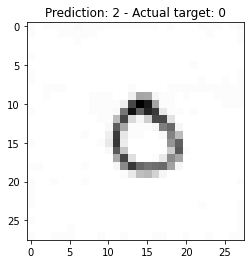

torch.Size([20, 1, 28, 28])


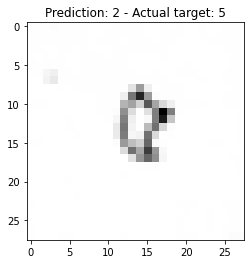

torch.Size([20, 1, 28, 28])


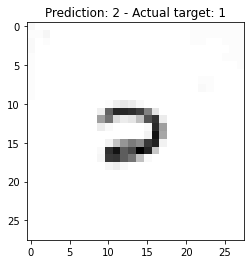

torch.Size([20, 1, 28, 28])


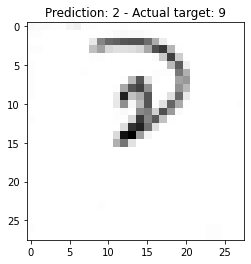

torch.Size([20, 1, 28, 28])


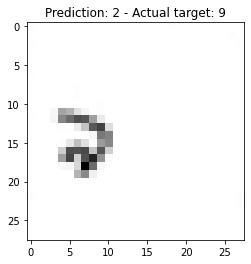

torch.Size([20, 1, 28, 28])


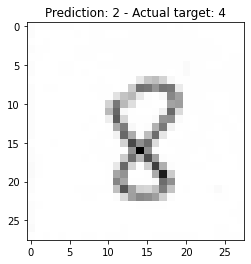

torch.Size([20, 1, 28, 28])


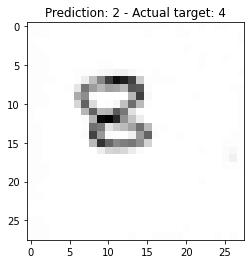

torch.Size([20, 1, 28, 28])


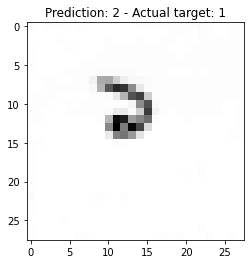

torch.Size([20, 1, 28, 28])


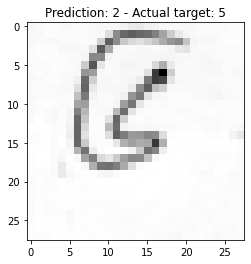

torch.Size([20, 1, 28, 28])


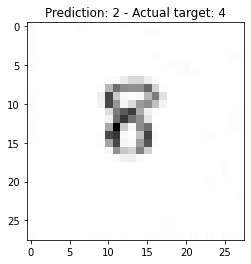

torch.Size([20, 1, 28, 28])


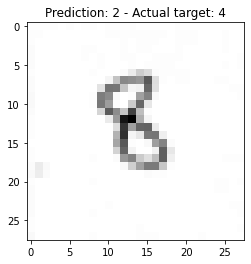

torch.Size([20, 1, 28, 28])


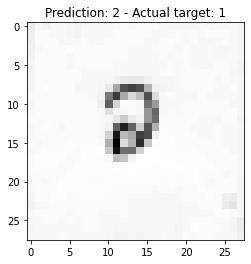

torch.Size([20, 1, 28, 28])


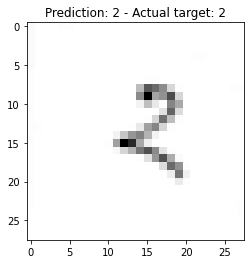

torch.Size([20, 1, 28, 28])


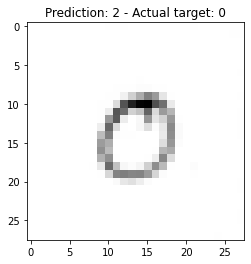

torch.Size([20, 1, 28, 28])


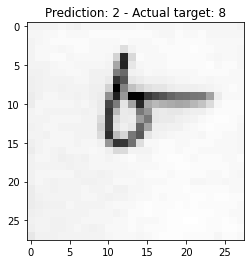

torch.Size([20, 1, 28, 28])


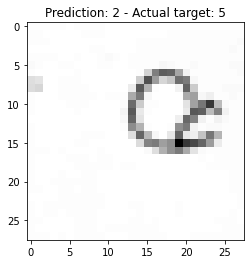

torch.Size([20, 1, 28, 28])


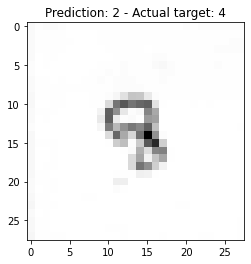

torch.Size([20, 1, 28, 28])


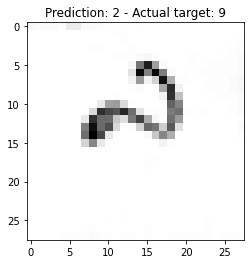

torch.Size([20, 1, 28, 28])


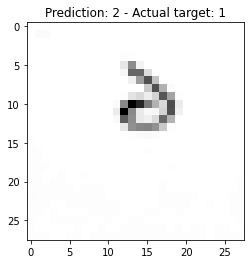

torch.Size([20, 1, 28, 28])


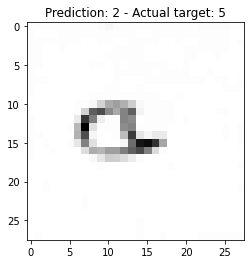

torch.Size([20, 1, 28, 28])


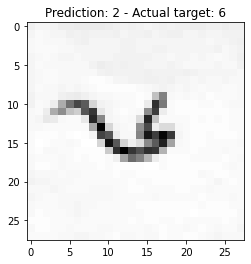

torch.Size([20, 1, 28, 28])


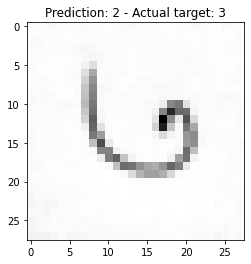

torch.Size([20, 1, 28, 28])


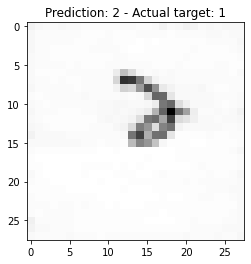

torch.Size([20, 1, 28, 28])


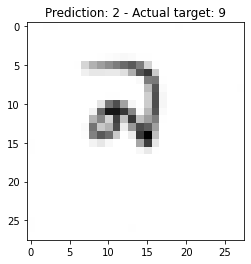

torch.Size([20, 1, 28, 28])


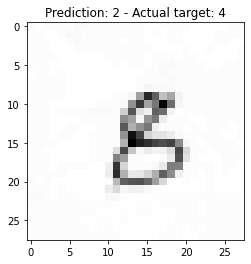

torch.Size([20, 1, 28, 28])


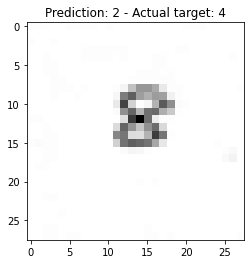

torch.Size([20, 1, 28, 28])


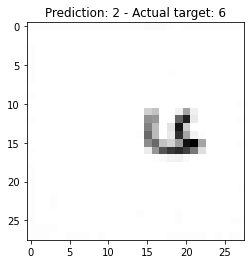

torch.Size([20, 1, 28, 28])


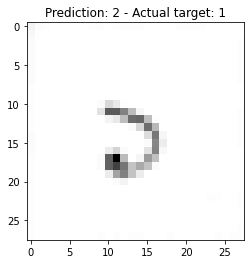

torch.Size([20, 1, 28, 28])


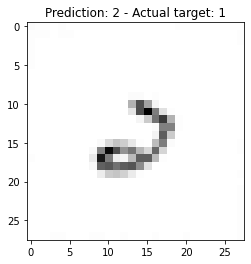

torch.Size([20, 1, 28, 28])


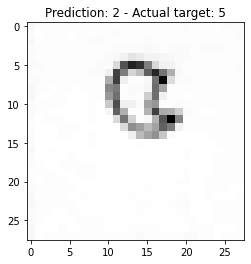

torch.Size([20, 1, 28, 28])


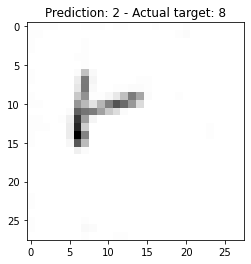

torch.Size([20, 1, 28, 28])


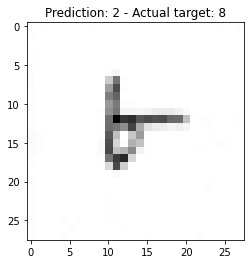

torch.Size([20, 1, 28, 28])


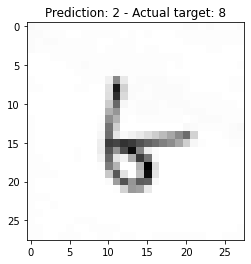

torch.Size([20, 1, 28, 28])


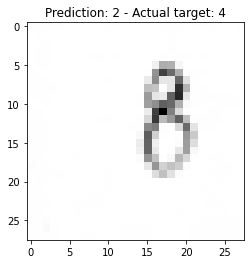

torch.Size([20, 1, 28, 28])


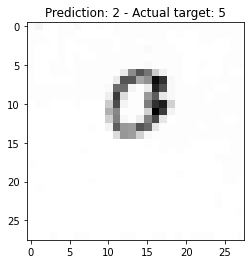

torch.Size([20, 1, 28, 28])


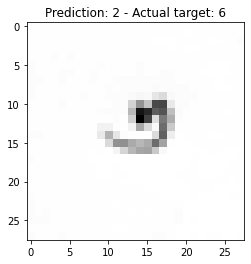

torch.Size([20, 1, 28, 28])


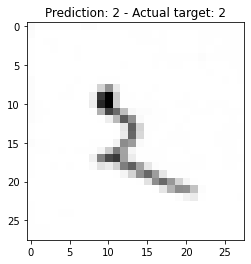

torch.Size([20, 1, 28, 28])


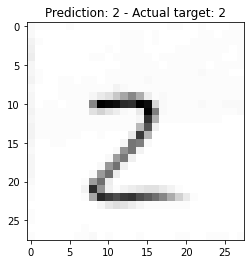

torch.Size([20, 1, 28, 28])


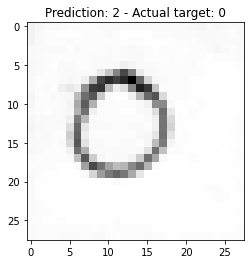

torch.Size([20, 1, 28, 28])


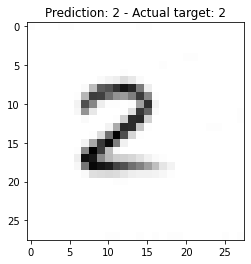

torch.Size([20, 1, 28, 28])


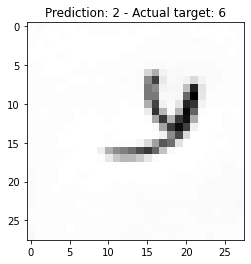

torch.Size([20, 1, 28, 28])


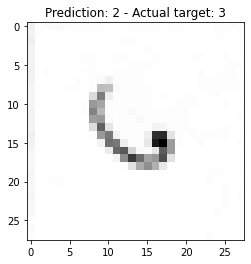

torch.Size([20, 1, 28, 28])


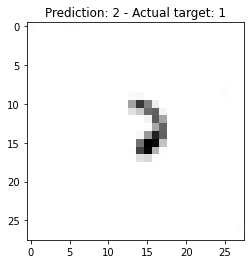

torch.Size([20, 1, 28, 28])


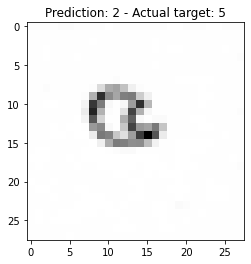

torch.Size([20, 1, 28, 28])


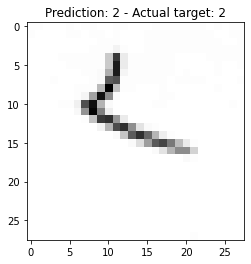

torch.Size([20, 1, 28, 28])


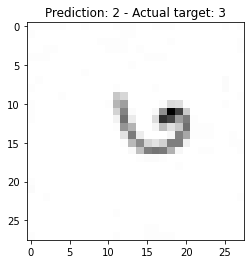

torch.Size([20, 1, 28, 28])


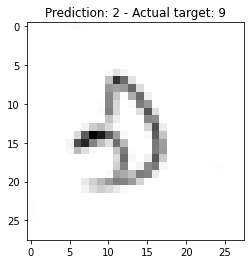

torch.Size([20, 1, 28, 28])


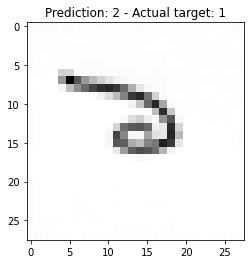

torch.Size([20, 1, 28, 28])


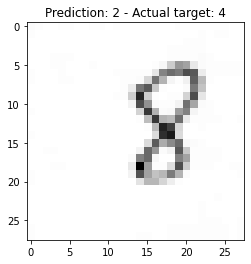

torch.Size([20, 1, 28, 28])


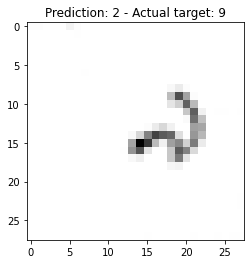

torch.Size([20, 1, 28, 28])


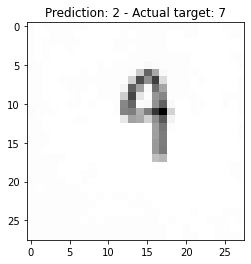

torch.Size([20, 1, 28, 28])


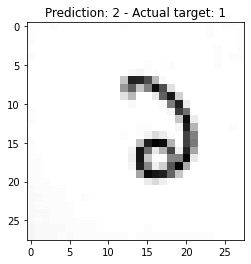

torch.Size([20, 1, 28, 28])


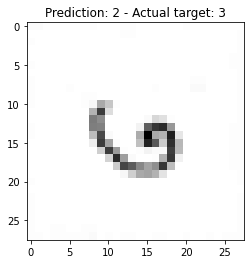

torch.Size([20, 1, 28, 28])


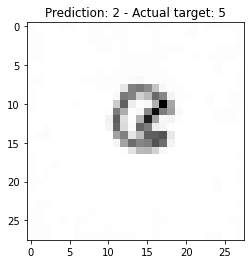

torch.Size([20, 1, 28, 28])


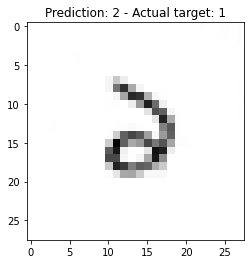

torch.Size([20, 1, 28, 28])


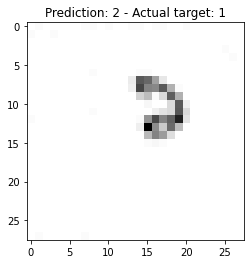

torch.Size([20, 1, 28, 28])


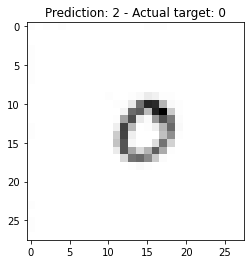

torch.Size([20, 1, 28, 28])


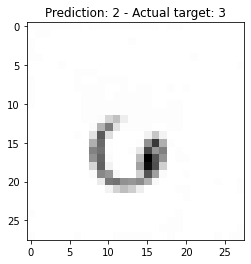

torch.Size([20, 1, 28, 28])


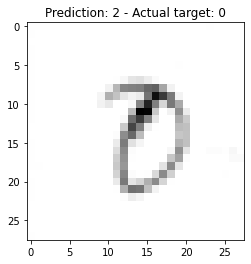

torch.Size([20, 1, 28, 28])


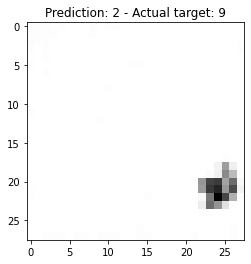

torch.Size([20, 1, 28, 28])


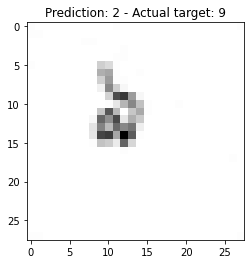

torch.Size([20, 1, 28, 28])


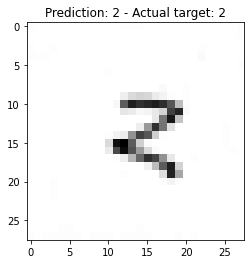

torch.Size([20, 1, 28, 28])


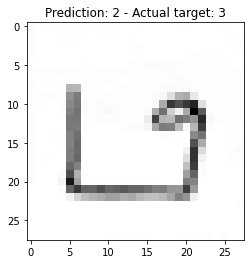

torch.Size([20, 1, 28, 28])


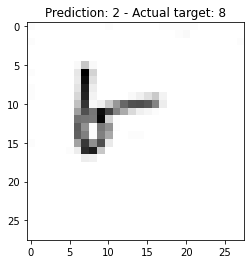

torch.Size([20, 1, 28, 28])


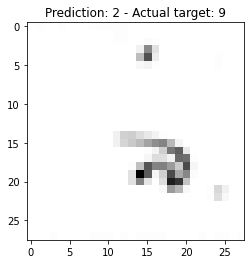

torch.Size([20, 1, 28, 28])


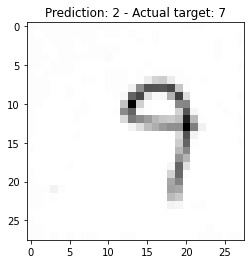

torch.Size([20, 1, 28, 28])


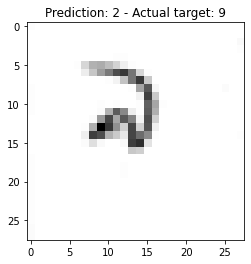

torch.Size([20, 1, 28, 28])


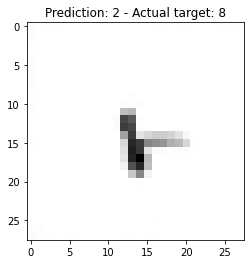

torch.Size([20, 1, 28, 28])


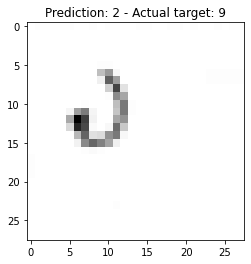

torch.Size([20, 1, 28, 28])


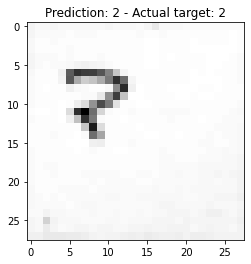

torch.Size([20, 1, 28, 28])


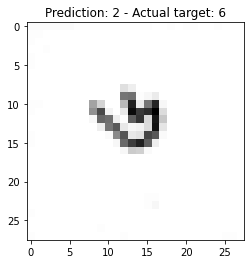

torch.Size([20, 1, 28, 28])


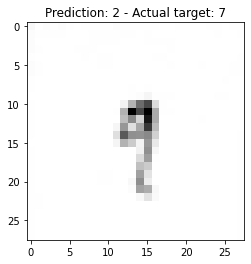

torch.Size([20, 1, 28, 28])


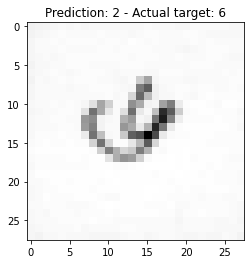

torch.Size([20, 1, 28, 28])


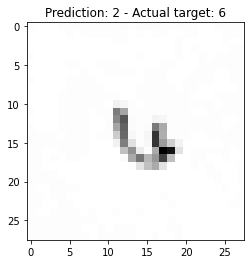

torch.Size([20, 1, 28, 28])


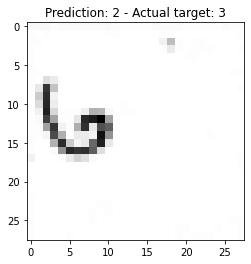

torch.Size([20, 1, 28, 28])


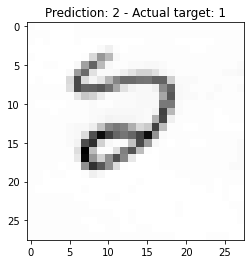

torch.Size([20, 1, 28, 28])


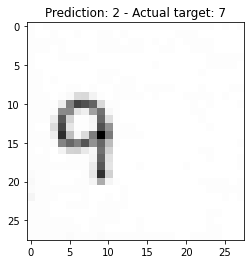

torch.Size([20, 1, 28, 28])


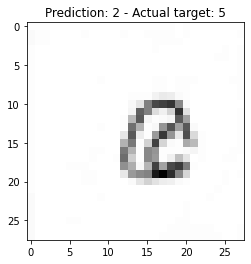

torch.Size([20, 1, 28, 28])


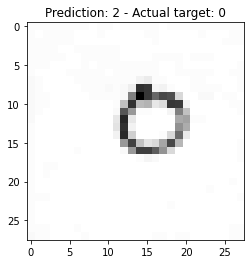

torch.Size([20, 1, 28, 28])


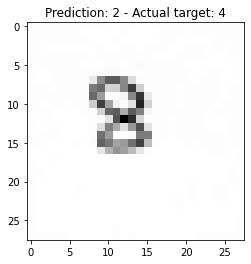

torch.Size([20, 1, 28, 28])


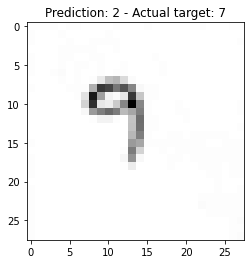

torch.Size([20, 1, 28, 28])


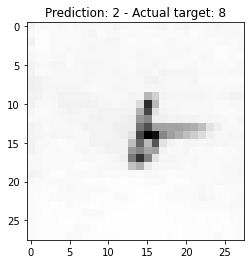

torch.Size([20, 1, 28, 28])


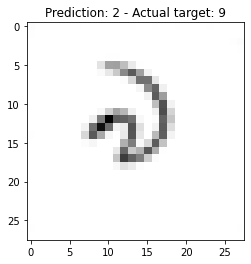

torch.Size([20, 1, 28, 28])


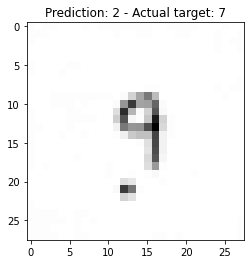

torch.Size([20, 1, 28, 28])


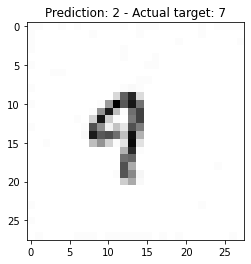

torch.Size([20, 1, 28, 28])


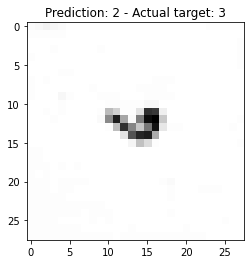

torch.Size([20, 1, 28, 28])


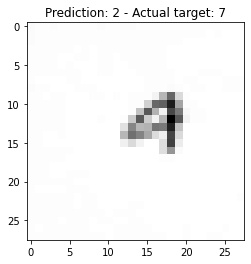

torch.Size([20, 1, 28, 28])


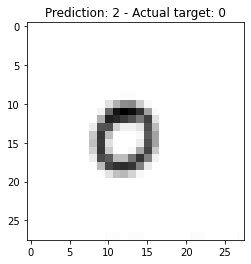

torch.Size([20, 1, 28, 28])


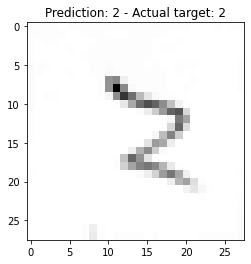

torch.Size([20, 1, 28, 28])


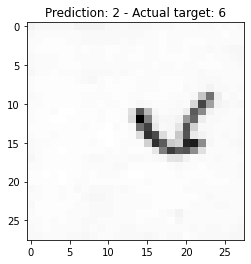

torch.Size([20, 1, 28, 28])


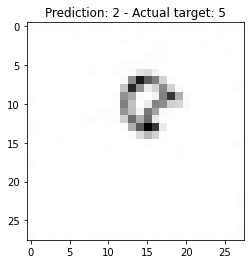

torch.Size([20, 1, 28, 28])


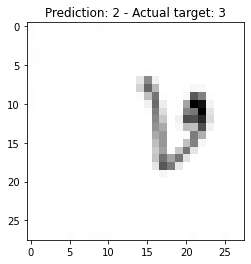

torch.Size([20, 1, 28, 28])


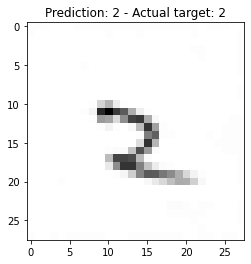

torch.Size([20, 1, 28, 28])


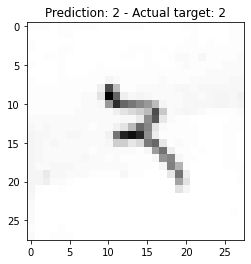

torch.Size([20, 1, 28, 28])


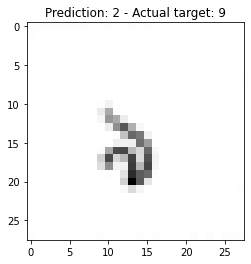

torch.Size([20, 1, 28, 28])


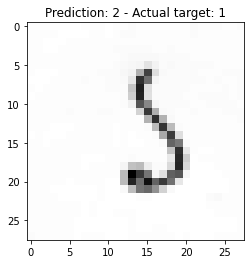

torch.Size([20, 1, 28, 28])


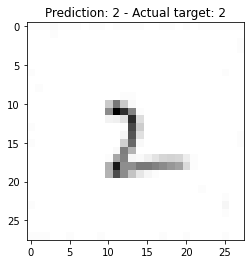

torch.Size([20, 1, 28, 28])


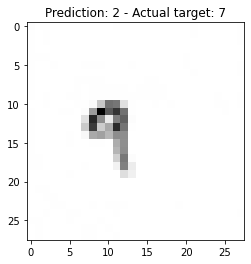

torch.Size([20, 1, 28, 28])


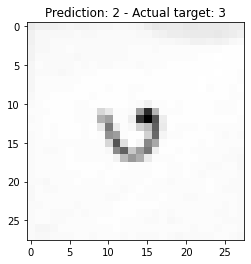

torch.Size([20, 1, 28, 28])


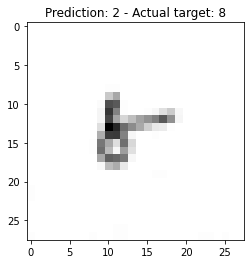

torch.Size([20, 1, 28, 28])


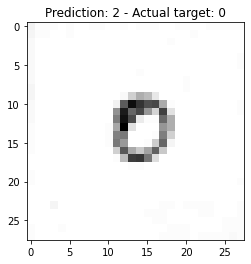

torch.Size([20, 1, 28, 28])


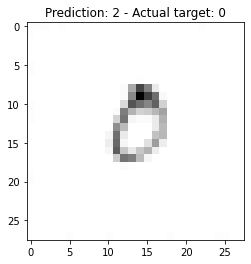

torch.Size([20, 1, 28, 28])


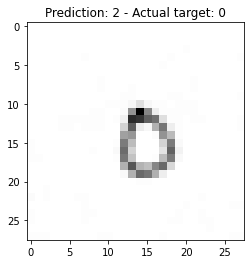

torch.Size([20, 1, 28, 28])


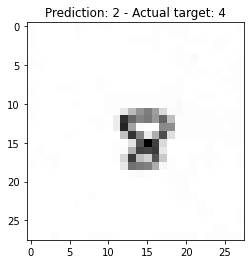

torch.Size([20, 1, 28, 28])


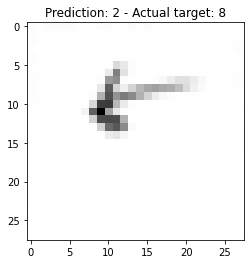

torch.Size([20, 1, 28, 28])


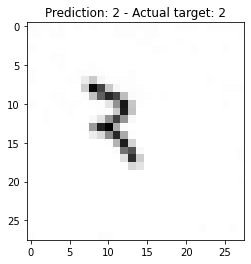

torch.Size([20, 1, 28, 28])


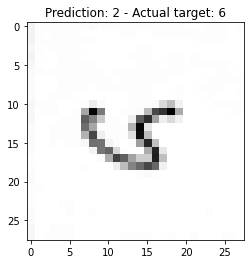

torch.Size([20, 1, 28, 28])


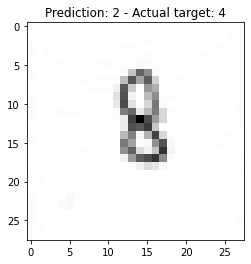

torch.Size([20, 1, 28, 28])


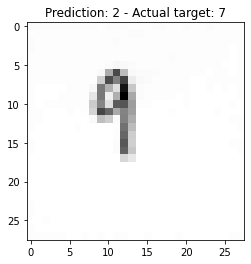

torch.Size([19, 1, 28, 28])


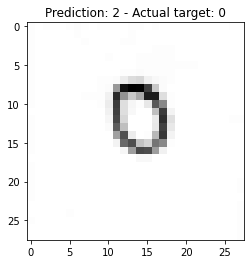

Accuracy: 9.796


In [137]:
acc = evaluate_model(test_loader, model)
print('Accuracy: %.3f' % acc)

In [147]:
PATH2 = 'Dataset_2/'

train_dataset2 = pd.read_csv(PATH2 + 'verification_train.csv')
test_dataset2 = pd.read_csv(PATH2 + 'verification_test.csv')

In [148]:
print(train_dataset2.shape)
train_dataset2.head()

(60000, 785)


label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [149]:
from PIL import Image

class Dataset2(Dataset):
    def __init__(self, df, transform=None):
        self.data = df
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
#         path = self.root + "/" + item[0]
        im_array = np.int8(np.reshape(item[1:].to_numpy(), (28, 28))) # create a 2D array from flat array
        image = Image.fromarray(im_array, 'L')
#         image =(item[1:].to_numpy())
        label = item[0]
        
#         print(item.shape)
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [150]:
train_data2  = Dataset2(train_dataset2, train_transform)
test_data2 = Dataset2(test_dataset2, test_transform)



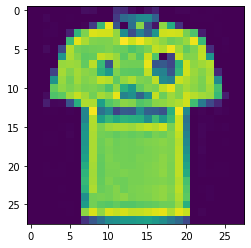

In [151]:
plt.imshow(test_data2[0][0].reshape(28,28,1))

In [152]:
test_size = 0.2
num_train = len(train_data2)
indices = list(range(num_train))
# np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
train_idx, test_idx = indices[split:], indices[:split]

train_sampler2 = SubsetRandomSampler(train_idx)
test_sampler2 = SubsetRandomSampler(test_idx)

train_loader2 = torch.utils.data.DataLoader(
    train_data2, batch_size=batch_size,
    sampler=train_sampler)

test_loader2 = torch.utils.data.DataLoader(
    train_data2, batch_size=batch_size,
    sampler=test_sampler)


print("Train dataloader:{}".format(len(train_loader2)))
print("Test dataloader:{}".format(len(test_loader2)))

Train dataloader:972
Test dataloader:243


In [153]:
model = DeepNeuralNetworkModel(input_size = input_dim, num_classes = output_dim, num_hidden = num_hidden)

model.to(device)

DeepNeuralNetworkModel(
  (linear_1): Linear(in_features=784, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=200, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=200, out_features=200, bias=True)
  (relu_3): ReLU()
  (linear_4): Linear(in_features=200, out_features=200, bias=True)
  (relu_4): ReLU()
  (linear_5): Linear(in_features=200, out_features=200, bias=True)
  (relu_5): ReLU()
  (linear_6): Linear(in_features=200, out_features=200, bias=True)
  (relu_6): ReLU()
  (linear_out): Linear(in_features=200, out_features=10, bias=True)
)

In [155]:
iteration_loss2 = []
iter2 = 0
for epoch in range(num_epochs):
    print('Epoch: ', epoch + 1)
    for i, (images, labels) in enumerate(train_loader2):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images) 

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()

        iter2 += 1

        if iter2 % 10 == 0:        
            correct = 0
            total = 0
            for images, labels in test_loader2:
               
                images = images.view(-1, 28*28).to(device)

                outputs = model(images)

                _, predicted = torch.max(outputs, 1)

                total += labels.size(0)

                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy2 = 100 * correct.item() / total

            iteration_loss2.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter2, loss.item(), accuracy))

Epoch:  1
Iteration: 10. Loss: 2.309940814971924. Accuracy: 9.796254373327844
Iteration: 20. Loss: 2.3091673851013184. Accuracy: 9.796254373327844
Iteration: 30. Loss: 2.323256015777588. Accuracy: 9.796254373327844
Iteration: 40. Loss: 2.3131420612335205. Accuracy: 9.796254373327844
Iteration: 50. Loss: 2.3053090572357178. Accuracy: 9.796254373327844
Iteration: 60. Loss: 2.312950611114502. Accuracy: 9.796254373327844
Iteration: 70. Loss: 2.2949609756469727. Accuracy: 9.796254373327844
Iteration: 80. Loss: 2.2940049171447754. Accuracy: 9.796254373327844
Iteration: 90. Loss: 2.2928524017333984. Accuracy: 9.796254373327844
Iteration: 100. Loss: 2.2994751930236816. Accuracy: 9.796254373327844
Iteration: 110. Loss: 2.3064751625061035. Accuracy: 9.796254373327844
Iteration: 120. Loss: 2.3033299446105957. Accuracy: 9.796254373327844
Iteration: 130. Loss: 2.3147127628326416. Accuracy: 9.796254373327844
Iteration: 140. Loss: 2.2972919940948486. Accuracy: 9.796254373327844
Iteration: 150. Loss: 

Iteration: 1190. Loss: 2.311859130859375. Accuracy: 9.796254373327844
Iteration: 1200. Loss: 2.3004863262176514. Accuracy: 9.796254373327844
Iteration: 1210. Loss: 2.307135820388794. Accuracy: 9.796254373327844
Iteration: 1220. Loss: 2.3071014881134033. Accuracy: 9.796254373327844
Iteration: 1230. Loss: 2.3105106353759766. Accuracy: 9.796254373327844
Iteration: 1240. Loss: 2.3163833618164062. Accuracy: 9.796254373327844
Iteration: 1250. Loss: 2.306101083755493. Accuracy: 9.796254373327844
Iteration: 1260. Loss: 2.298240900039673. Accuracy: 9.796254373327844
Iteration: 1270. Loss: 2.2934672832489014. Accuracy: 9.796254373327844
Iteration: 1280. Loss: 2.3017897605895996. Accuracy: 9.796254373327844
Iteration: 1290. Loss: 2.292874336242676. Accuracy: 9.796254373327844
Iteration: 1300. Loss: 2.2981793880462646. Accuracy: 9.796254373327844
Iteration: 1310. Loss: 2.3038411140441895. Accuracy: 9.796254373327844
Iteration: 1320. Loss: 2.3081552982330322. Accuracy: 9.796254373327844
Iteration: 

Iteration: 2350. Loss: 2.3015661239624023. Accuracy: 9.796254373327844
Iteration: 2360. Loss: 2.2961268424987793. Accuracy: 9.796254373327844
Iteration: 2370. Loss: 2.288849115371704. Accuracy: 9.796254373327844
Iteration: 2380. Loss: 2.301656723022461. Accuracy: 9.796254373327844
Iteration: 2390. Loss: 2.303041696548462. Accuracy: 9.796254373327844
Iteration: 2400. Loss: 2.3024094104766846. Accuracy: 9.796254373327844
Iteration: 2410. Loss: 2.308333396911621. Accuracy: 9.796254373327844
Iteration: 2420. Loss: 2.313441276550293. Accuracy: 9.796254373327844
Iteration: 2430. Loss: 2.317126989364624. Accuracy: 9.796254373327844
Iteration: 2440. Loss: 2.3086888790130615. Accuracy: 9.796254373327844
Iteration: 2450. Loss: 2.2948203086853027. Accuracy: 9.796254373327844
Iteration: 2460. Loss: 2.3178341388702393. Accuracy: 9.796254373327844
Iteration: 2470. Loss: 2.307051181793213. Accuracy: 9.796254373327844
Iteration: 2480. Loss: 2.2947328090667725. Accuracy: 9.796254373327844
Iteration: 24

Iteration: 3510. Loss: 2.2951667308807373. Accuracy: 9.796254373327844
Iteration: 3520. Loss: 2.3153042793273926. Accuracy: 9.796254373327844
Iteration: 3530. Loss: 2.2948193550109863. Accuracy: 9.796254373327844
Iteration: 3540. Loss: 2.3067963123321533. Accuracy: 9.796254373327844
Iteration: 3550. Loss: 2.313633918762207. Accuracy: 9.796254373327844
Iteration: 3560. Loss: 2.2861180305480957. Accuracy: 9.796254373327844
Iteration: 3570. Loss: 2.2947206497192383. Accuracy: 9.796254373327844
Iteration: 3580. Loss: 2.29986572265625. Accuracy: 9.796254373327844
Iteration: 3590. Loss: 2.304654121398926. Accuracy: 9.796254373327844
Iteration: 3600. Loss: 2.3031184673309326. Accuracy: 9.796254373327844
Iteration: 3610. Loss: 2.3084495067596436. Accuracy: 9.796254373327844
Iteration: 3620. Loss: 2.2949655055999756. Accuracy: 9.796254373327844
Iteration: 3630. Loss: 2.296081781387329. Accuracy: 9.796254373327844
Iteration: 3640. Loss: 2.3136813640594482. Accuracy: 9.796254373327844
Iteration: 

Iteration: 4670. Loss: 2.3157973289489746. Accuracy: 9.796254373327844
Iteration: 4680. Loss: 2.30491304397583. Accuracy: 9.796254373327844
Iteration: 4690. Loss: 2.296257734298706. Accuracy: 9.796254373327844
Iteration: 4700. Loss: 2.2898826599121094. Accuracy: 9.796254373327844
Iteration: 4710. Loss: 2.3118035793304443. Accuracy: 9.796254373327844
Iteration: 4720. Loss: 2.2857940196990967. Accuracy: 9.796254373327844
Iteration: 4730. Loss: 2.3070263862609863. Accuracy: 9.796254373327844
Iteration: 4740. Loss: 2.2938334941864014. Accuracy: 9.796254373327844
Iteration: 4750. Loss: 2.302854061126709. Accuracy: 9.796254373327844
Iteration: 4760. Loss: 2.293243408203125. Accuracy: 9.796254373327844
Iteration: 4770. Loss: 2.300170660018921. Accuracy: 9.796254373327844
Iteration: 4780. Loss: 2.3027327060699463. Accuracy: 9.796254373327844
Iteration: 4790. Loss: 2.293562889099121. Accuracy: 9.796254373327844
Iteration: 4800. Loss: 2.309458017349243. Accuracy: 9.796254373327844
Iteration: 481

Iteration: 5840. Loss: 2.3106114864349365. Accuracy: 9.796254373327844
Iteration: 5850. Loss: 2.295349359512329. Accuracy: 9.796254373327844
Iteration: 5860. Loss: 2.3046183586120605. Accuracy: 9.796254373327844
Iteration: 5870. Loss: 2.3012733459472656. Accuracy: 9.796254373327844
Iteration: 5880. Loss: 2.3024168014526367. Accuracy: 9.796254373327844
Iteration: 5890. Loss: 2.308799982070923. Accuracy: 9.796254373327844
Iteration: 5900. Loss: 2.300750494003296. Accuracy: 9.796254373327844
Iteration: 5910. Loss: 2.3058342933654785. Accuracy: 9.796254373327844
Iteration: 5920. Loss: 2.2943687438964844. Accuracy: 9.796254373327844
Iteration: 5930. Loss: 2.3171935081481934. Accuracy: 9.796254373327844
Iteration: 5940. Loss: 2.3143868446350098. Accuracy: 9.796254373327844
Iteration: 5950. Loss: 2.2911674976348877. Accuracy: 9.796254373327844
Iteration: 5960. Loss: 2.3216538429260254. Accuracy: 9.796254373327844
Iteration: 5970. Loss: 2.3058934211730957. Accuracy: 9.796254373327844
Iteration

Iteration: 7000. Loss: 2.306143283843994. Accuracy: 9.796254373327844
Iteration: 7010. Loss: 2.30780291557312. Accuracy: 9.796254373327844
Iteration: 7020. Loss: 2.3110430240631104. Accuracy: 9.796254373327844
Iteration: 7030. Loss: 2.293761730194092. Accuracy: 9.796254373327844
Iteration: 7040. Loss: 2.2990827560424805. Accuracy: 9.796254373327844
Iteration: 7050. Loss: 2.314497470855713. Accuracy: 9.796254373327844
Iteration: 7060. Loss: 2.3056929111480713. Accuracy: 9.796254373327844
Iteration: 7070. Loss: 2.3027987480163574. Accuracy: 9.796254373327844
Iteration: 7080. Loss: 2.304534673690796. Accuracy: 9.796254373327844
Iteration: 7090. Loss: 2.308231830596924. Accuracy: 9.796254373327844
Iteration: 7100. Loss: 2.309657573699951. Accuracy: 9.796254373327844
Iteration: 7110. Loss: 2.3151943683624268. Accuracy: 9.796254373327844
Iteration: 7120. Loss: 2.3225178718566895. Accuracy: 9.796254373327844
Iteration: 7130. Loss: 2.287436008453369. Accuracy: 9.796254373327844
Iteration: 7140

Iteration: 8170. Loss: 2.309530019760132. Accuracy: 9.796254373327844
Iteration: 8180. Loss: 2.2942638397216797. Accuracy: 9.796254373327844
Iteration: 8190. Loss: 2.310335636138916. Accuracy: 9.796254373327844
Iteration: 8200. Loss: 2.3140039443969727. Accuracy: 9.796254373327844
Iteration: 8210. Loss: 2.3124468326568604. Accuracy: 9.796254373327844
Iteration: 8220. Loss: 2.304568290710449. Accuracy: 9.796254373327844
Iteration: 8230. Loss: 2.304900646209717. Accuracy: 9.796254373327844
Iteration: 8240. Loss: 2.3129794597625732. Accuracy: 9.796254373327844
Iteration: 8250. Loss: 2.300696849822998. Accuracy: 9.796254373327844
Iteration: 8260. Loss: 2.3106331825256348. Accuracy: 9.796254373327844
Iteration: 8270. Loss: 2.3120455741882324. Accuracy: 9.796254373327844
Iteration: 8280. Loss: 2.307823896408081. Accuracy: 9.796254373327844
Iteration: 8290. Loss: 2.307011127471924. Accuracy: 9.796254373327844
Iteration: 8300. Loss: 2.3152353763580322. Accuracy: 9.796254373327844
Iteration: 83

Iteration: 9340. Loss: 2.299985885620117. Accuracy: 9.796254373327844
Iteration: 9350. Loss: 2.3054842948913574. Accuracy: 9.796254373327844
Iteration: 9360. Loss: 2.2955873012542725. Accuracy: 9.796254373327844
Iteration: 9370. Loss: 2.2984466552734375. Accuracy: 9.796254373327844
Iteration: 9380. Loss: 2.3038430213928223. Accuracy: 9.796254373327844
Iteration: 9390. Loss: 2.3016891479492188. Accuracy: 9.796254373327844
Iteration: 9400. Loss: 2.3146615028381348. Accuracy: 9.796254373327844
Iteration: 9410. Loss: 2.3009262084960938. Accuracy: 9.796254373327844
Iteration: 9420. Loss: 2.29461669921875. Accuracy: 9.796254373327844
Iteration: 9430. Loss: 2.2914490699768066. Accuracy: 9.796254373327844
Iteration: 9440. Loss: 2.313246011734009. Accuracy: 9.796254373327844
Iteration: 9450. Loss: 2.2985382080078125. Accuracy: 9.796254373327844
Iteration: 9460. Loss: 2.312019109725952. Accuracy: 9.796254373327844
Iteration: 9470. Loss: 2.324894666671753. Accuracy: 9.796254373327844
Iteration: 9

Iteration: 10500. Loss: 2.301269292831421. Accuracy: 9.796254373327844
Iteration: 10510. Loss: 2.2984538078308105. Accuracy: 9.796254373327844
Iteration: 10520. Loss: 2.3159375190734863. Accuracy: 9.796254373327844
Iteration: 10530. Loss: 2.304020404815674. Accuracy: 9.796254373327844
Iteration: 10540. Loss: 2.304426431655884. Accuracy: 9.796254373327844
Iteration: 10550. Loss: 2.2989096641540527. Accuracy: 9.796254373327844
Iteration: 10560. Loss: 2.320425271987915. Accuracy: 9.796254373327844
Iteration: 10570. Loss: 2.295633316040039. Accuracy: 9.796254373327844
Iteration: 10580. Loss: 2.315561294555664. Accuracy: 9.796254373327844
Iteration: 10590. Loss: 2.2990119457244873. Accuracy: 9.796254373327844
Iteration: 10600. Loss: 2.3090109825134277. Accuracy: 9.796254373327844
Iteration: 10610. Loss: 2.316676139831543. Accuracy: 9.796254373327844
Iteration: 10620. Loss: 2.306817054748535. Accuracy: 9.796254373327844
Iteration: 10630. Loss: 2.3049495220184326. Accuracy: 9.796254373327844


Iteration: 11650. Loss: 2.2910304069519043. Accuracy: 9.796254373327844
Iteration: 11660. Loss: 2.3128044605255127. Accuracy: 9.796254373327844
Epoch:  13
Iteration: 11670. Loss: 2.3057408332824707. Accuracy: 9.796254373327844
Iteration: 11680. Loss: 2.292372226715088. Accuracy: 9.796254373327844
Iteration: 11690. Loss: 2.3002769947052. Accuracy: 9.796254373327844
Iteration: 11700. Loss: 2.2938685417175293. Accuracy: 9.796254373327844
Iteration: 11710. Loss: 2.303920269012451. Accuracy: 9.796254373327844
Iteration: 11720. Loss: 2.3117356300354004. Accuracy: 9.796254373327844
Iteration: 11730. Loss: 2.3107142448425293. Accuracy: 9.796254373327844
Iteration: 11740. Loss: 2.3015823364257812. Accuracy: 9.796254373327844
Iteration: 11750. Loss: 2.2887208461761475. Accuracy: 9.796254373327844
Iteration: 11760. Loss: 2.2856698036193848. Accuracy: 9.796254373327844
Iteration: 11770. Loss: 2.303683042526245. Accuracy: 9.796254373327844
Iteration: 11780. Loss: 2.2955234050750732. Accuracy: 9.796

Iteration: 12800. Loss: 2.3001675605773926. Accuracy: 9.796254373327844
Iteration: 12810. Loss: 2.289828062057495. Accuracy: 9.796254373327844
Iteration: 12820. Loss: 2.2983272075653076. Accuracy: 9.796254373327844
Iteration: 12830. Loss: 2.3134055137634277. Accuracy: 9.796254373327844
Iteration: 12840. Loss: 2.295234203338623. Accuracy: 9.796254373327844
Iteration: 12850. Loss: 2.304068088531494. Accuracy: 9.796254373327844
Iteration: 12860. Loss: 2.3023569583892822. Accuracy: 9.796254373327844
Iteration: 12870. Loss: 2.298130989074707. Accuracy: 9.796254373327844
Iteration: 12880. Loss: 2.3059446811676025. Accuracy: 9.796254373327844
Iteration: 12890. Loss: 2.3041868209838867. Accuracy: 9.796254373327844
Iteration: 12900. Loss: 2.3059310913085938. Accuracy: 9.796254373327844
Iteration: 12910. Loss: 2.298586845397949. Accuracy: 9.796254373327844
Iteration: 12920. Loss: 2.3119454383850098. Accuracy: 9.796254373327844
Iteration: 12930. Loss: 2.3121066093444824. Accuracy: 9.7962543733278

Iteration: 13950. Loss: 2.3028783798217773. Accuracy: 9.796254373327844
Iteration: 13960. Loss: 2.289303779602051. Accuracy: 9.796254373327844
Iteration: 13970. Loss: 2.3062195777893066. Accuracy: 9.796254373327844
Iteration: 13980. Loss: 2.3018598556518555. Accuracy: 9.796254373327844
Iteration: 13990. Loss: 2.3089089393615723. Accuracy: 9.796254373327844
Iteration: 14000. Loss: 2.301255702972412. Accuracy: 9.796254373327844
Iteration: 14010. Loss: 2.306408166885376. Accuracy: 9.796254373327844
Iteration: 14020. Loss: 2.3023457527160645. Accuracy: 9.796254373327844
Iteration: 14030. Loss: 2.303374767303467. Accuracy: 9.796254373327844
Iteration: 14040. Loss: 2.298290729522705. Accuracy: 9.796254373327844
Iteration: 14050. Loss: 2.300612688064575. Accuracy: 9.796254373327844
Iteration: 14060. Loss: 2.3025224208831787. Accuracy: 9.796254373327844
Iteration: 14070. Loss: 2.309948444366455. Accuracy: 9.796254373327844
Iteration: 14080. Loss: 2.3047478199005127. Accuracy: 9.796254373327844

Iteration: 15100. Loss: 2.312775135040283. Accuracy: 9.796254373327844
Iteration: 15110. Loss: 2.3027584552764893. Accuracy: 9.796254373327844
Iteration: 15120. Loss: 2.3113675117492676. Accuracy: 9.796254373327844
Iteration: 15130. Loss: 2.305224657058716. Accuracy: 9.796254373327844
Iteration: 15140. Loss: 2.3144049644470215. Accuracy: 9.796254373327844
Iteration: 15150. Loss: 2.3127431869506836. Accuracy: 9.796254373327844
Iteration: 15160. Loss: 2.298996925354004. Accuracy: 9.796254373327844
Iteration: 15170. Loss: 2.2931742668151855. Accuracy: 9.796254373327844
Iteration: 15180. Loss: 2.3076443672180176. Accuracy: 9.796254373327844
Iteration: 15190. Loss: 2.3098623752593994. Accuracy: 9.796254373327844
Iteration: 15200. Loss: 2.3097596168518066. Accuracy: 9.796254373327844
Iteration: 15210. Loss: 2.302342653274536. Accuracy: 9.796254373327844
Iteration: 15220. Loss: 2.295351982116699. Accuracy: 9.796254373327844
Iteration: 15230. Loss: 2.304408550262451. Accuracy: 9.79625437332784

In [156]:
torch.save(model.state_dict(), 'model_base_ex_1_d_2.pkl')

In [157]:
print(accuracy2)

9.6521918090142


In [162]:
test_loader2 = torch.utils.data.DataLoader(
    test_data2, batch_size=batch_size)

torch.Size([20, 1, 28, 28])


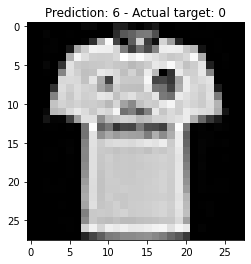

torch.Size([20, 1, 28, 28])


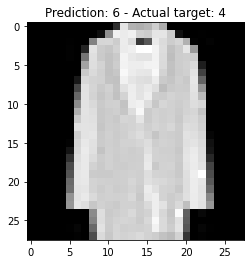

torch.Size([20, 1, 28, 28])


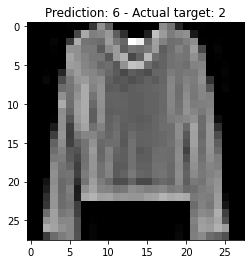

torch.Size([20, 1, 28, 28])


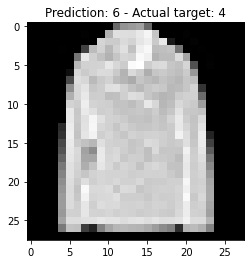

torch.Size([20, 1, 28, 28])


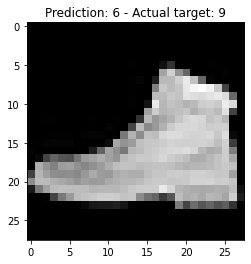

torch.Size([20, 1, 28, 28])


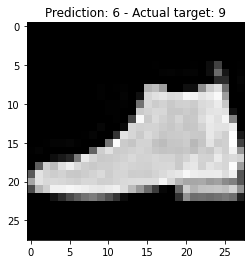

torch.Size([20, 1, 28, 28])


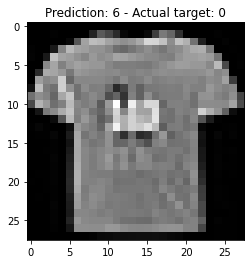

torch.Size([20, 1, 28, 28])


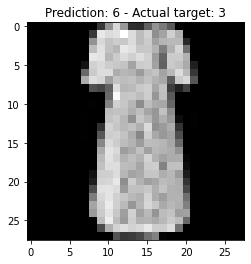

torch.Size([20, 1, 28, 28])


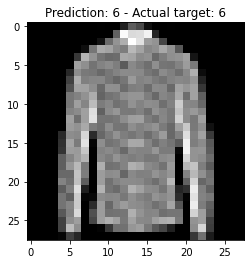

torch.Size([20, 1, 28, 28])


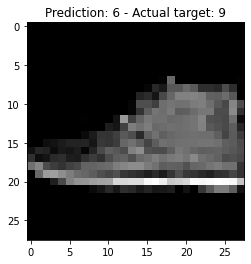

torch.Size([20, 1, 28, 28])


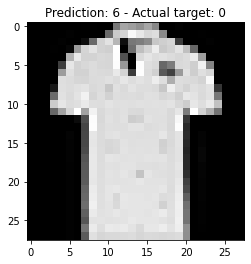

torch.Size([20, 1, 28, 28])


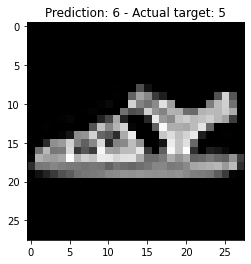

torch.Size([20, 1, 28, 28])


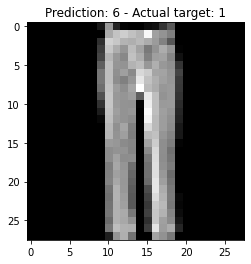

torch.Size([20, 1, 28, 28])


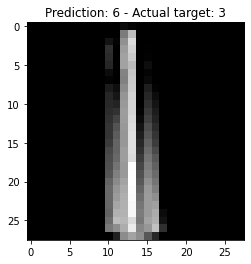

torch.Size([20, 1, 28, 28])


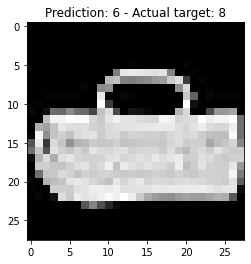

torch.Size([20, 1, 28, 28])


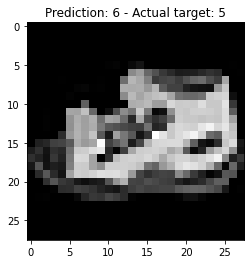

torch.Size([20, 1, 28, 28])


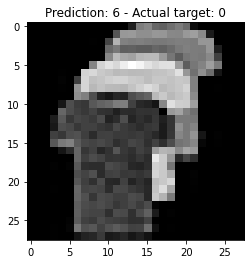

torch.Size([20, 1, 28, 28])


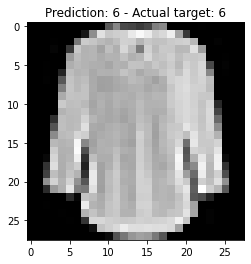

torch.Size([20, 1, 28, 28])


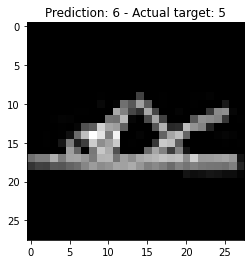

torch.Size([20, 1, 28, 28])


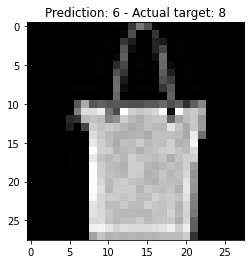

torch.Size([20, 1, 28, 28])


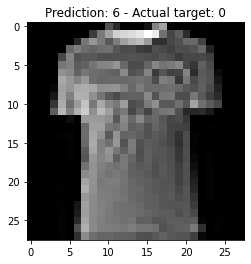

torch.Size([20, 1, 28, 28])


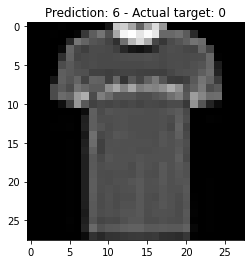

torch.Size([20, 1, 28, 28])


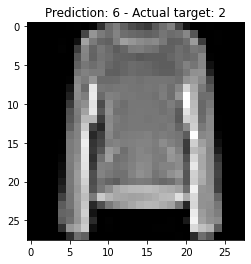

torch.Size([20, 1, 28, 28])


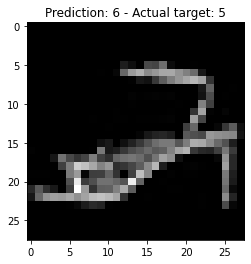

torch.Size([20, 1, 28, 28])


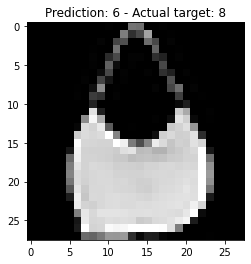

torch.Size([20, 1, 28, 28])


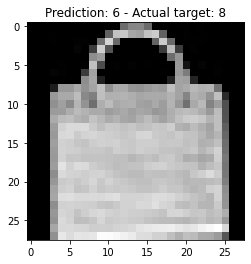

torch.Size([20, 1, 28, 28])


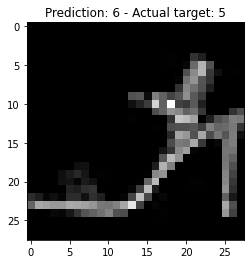

torch.Size([20, 1, 28, 28])


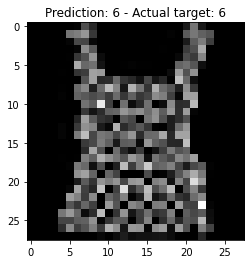

torch.Size([20, 1, 28, 28])


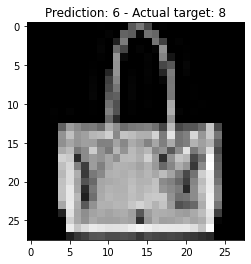

torch.Size([20, 1, 28, 28])


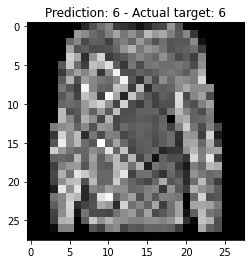

torch.Size([20, 1, 28, 28])


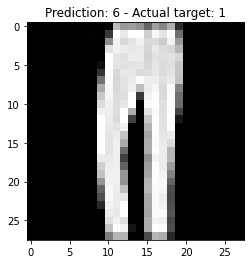

torch.Size([20, 1, 28, 28])


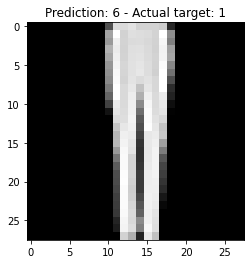

torch.Size([20, 1, 28, 28])


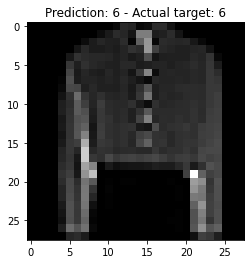

torch.Size([20, 1, 28, 28])


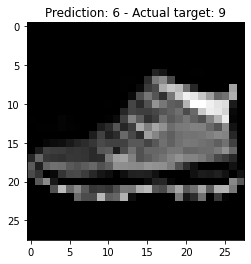

torch.Size([20, 1, 28, 28])


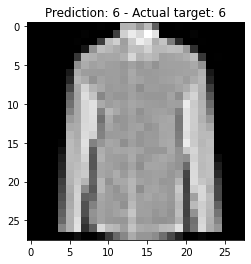

torch.Size([20, 1, 28, 28])


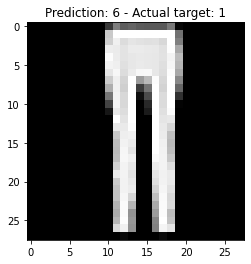

torch.Size([20, 1, 28, 28])


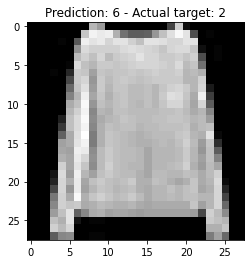

torch.Size([20, 1, 28, 28])


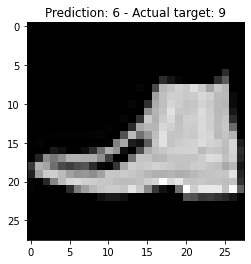

torch.Size([20, 1, 28, 28])


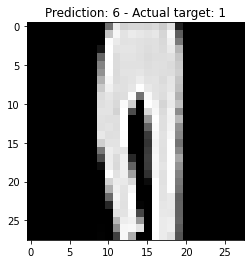

torch.Size([20, 1, 28, 28])


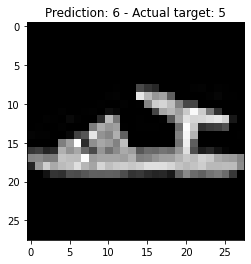

torch.Size([20, 1, 28, 28])


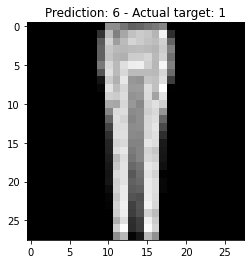

torch.Size([20, 1, 28, 28])


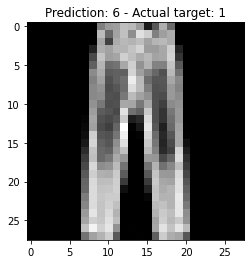

torch.Size([20, 1, 28, 28])


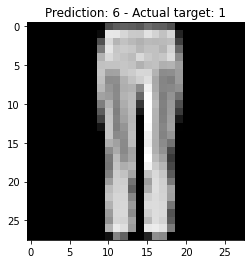

torch.Size([20, 1, 28, 28])


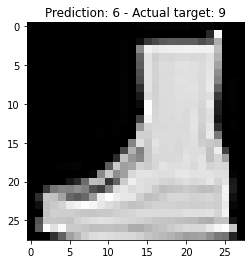

torch.Size([20, 1, 28, 28])


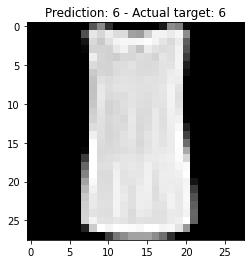

torch.Size([20, 1, 28, 28])


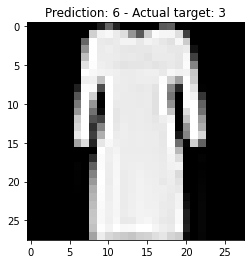

torch.Size([20, 1, 28, 28])


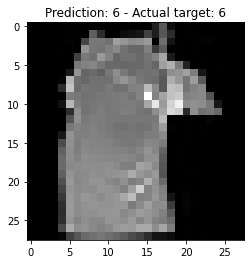

torch.Size([20, 1, 28, 28])


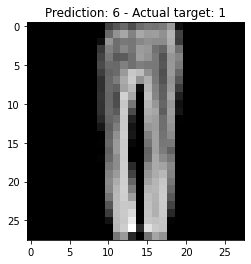

torch.Size([20, 1, 28, 28])


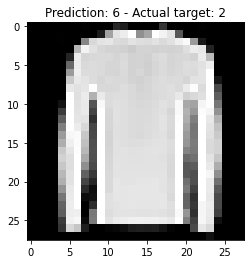

torch.Size([20, 1, 28, 28])


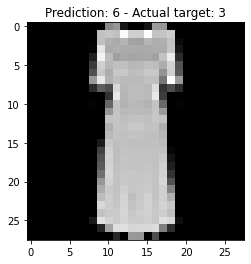

torch.Size([20, 1, 28, 28])


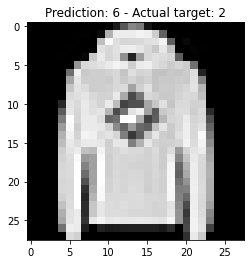

torch.Size([20, 1, 28, 28])


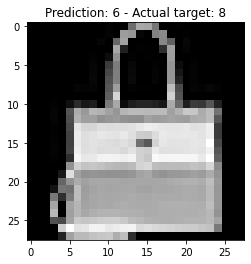

torch.Size([20, 1, 28, 28])


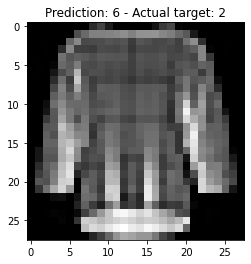

torch.Size([20, 1, 28, 28])


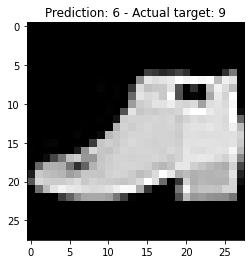

torch.Size([20, 1, 28, 28])


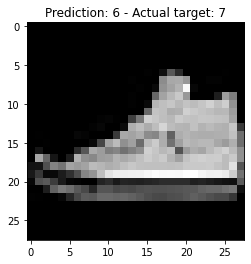

torch.Size([20, 1, 28, 28])


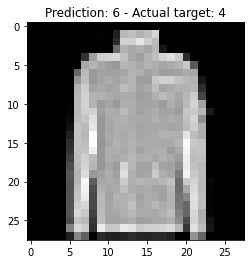

torch.Size([20, 1, 28, 28])


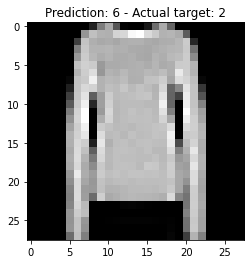

torch.Size([20, 1, 28, 28])


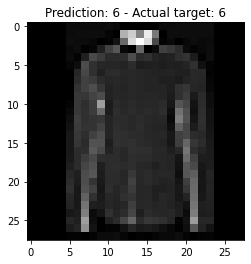

torch.Size([20, 1, 28, 28])


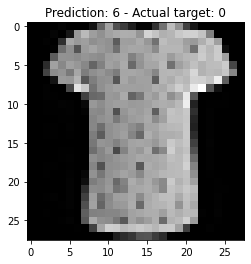

torch.Size([20, 1, 28, 28])


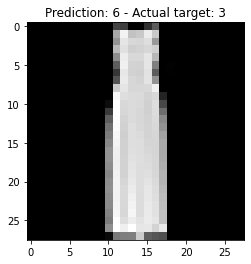

torch.Size([20, 1, 28, 28])


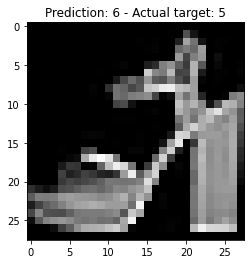

torch.Size([20, 1, 28, 28])


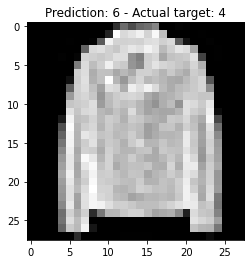

torch.Size([20, 1, 28, 28])


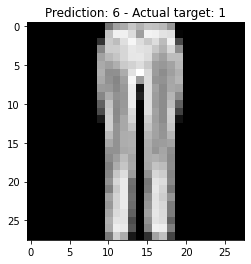

torch.Size([20, 1, 28, 28])


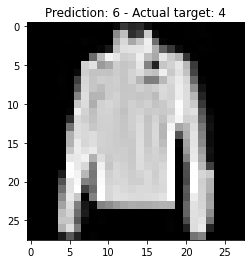

torch.Size([20, 1, 28, 28])


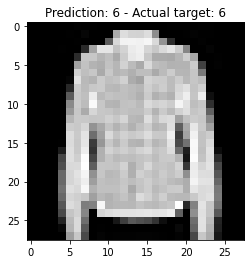

torch.Size([20, 1, 28, 28])


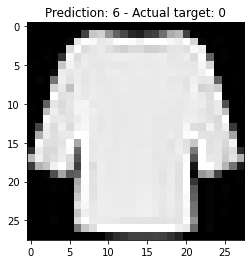

torch.Size([20, 1, 28, 28])


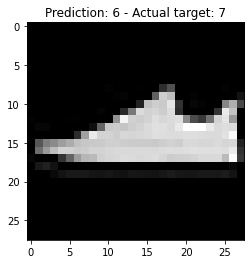

torch.Size([20, 1, 28, 28])


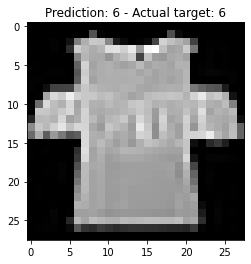

torch.Size([20, 1, 28, 28])


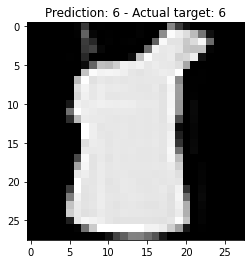

torch.Size([20, 1, 28, 28])


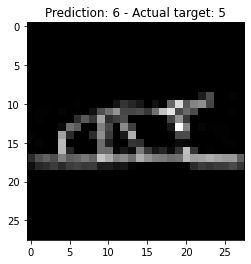

torch.Size([20, 1, 28, 28])


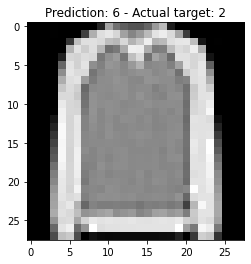

torch.Size([20, 1, 28, 28])


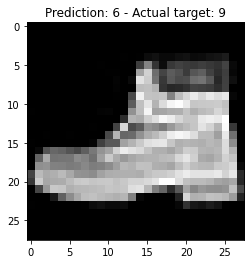

torch.Size([20, 1, 28, 28])


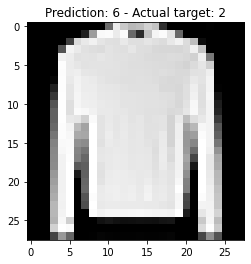

torch.Size([20, 1, 28, 28])


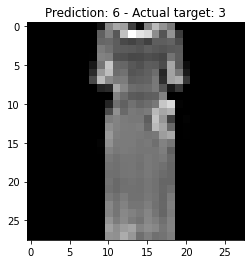

torch.Size([20, 1, 28, 28])


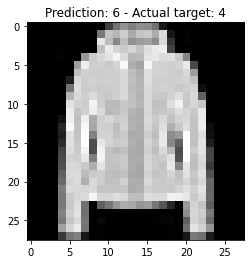

torch.Size([20, 1, 28, 28])


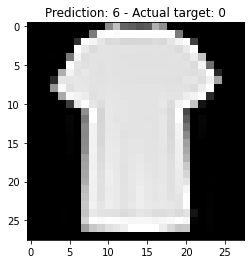

torch.Size([20, 1, 28, 28])


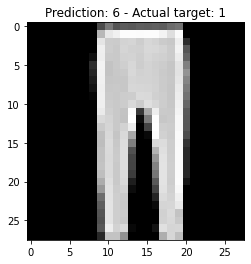

torch.Size([20, 1, 28, 28])


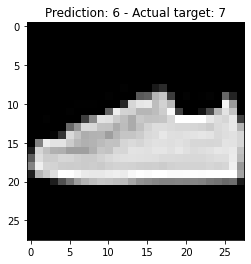

torch.Size([20, 1, 28, 28])


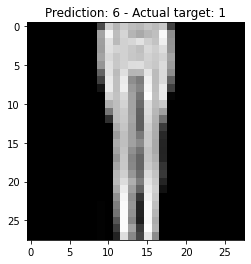

torch.Size([20, 1, 28, 28])


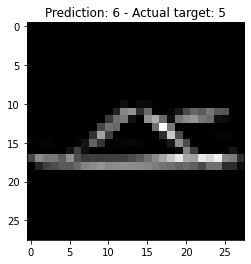

torch.Size([20, 1, 28, 28])


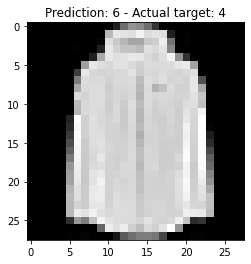

torch.Size([20, 1, 28, 28])


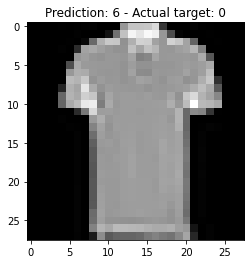

torch.Size([20, 1, 28, 28])


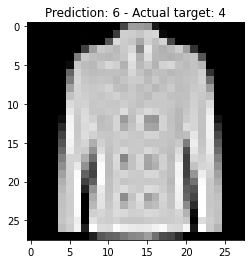

torch.Size([20, 1, 28, 28])


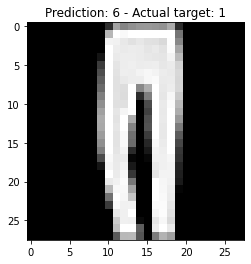

torch.Size([20, 1, 28, 28])


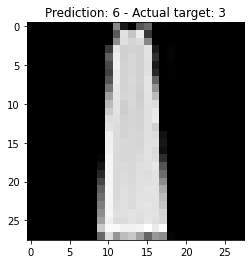

torch.Size([20, 1, 28, 28])


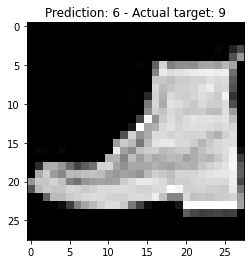

torch.Size([20, 1, 28, 28])


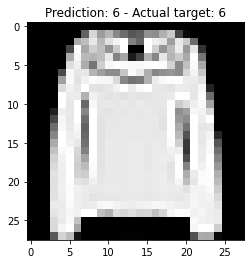

torch.Size([20, 1, 28, 28])


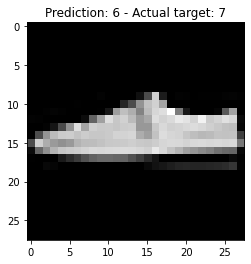

torch.Size([20, 1, 28, 28])


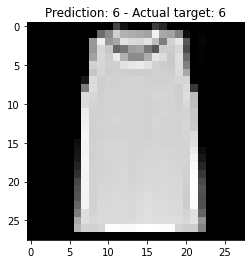

torch.Size([20, 1, 28, 28])


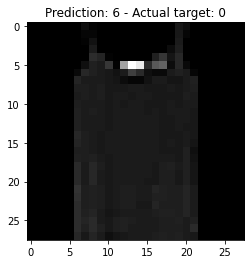

torch.Size([20, 1, 28, 28])


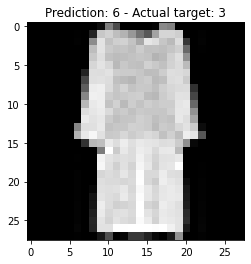

torch.Size([20, 1, 28, 28])


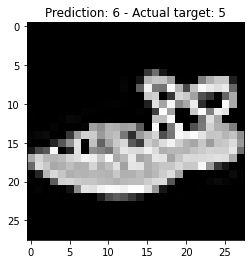

torch.Size([20, 1, 28, 28])


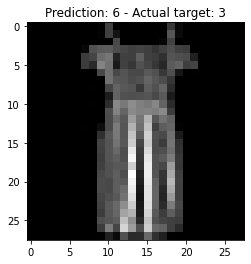

torch.Size([20, 1, 28, 28])


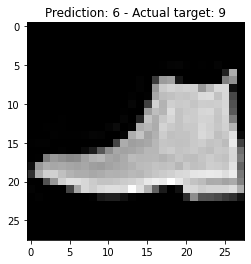

torch.Size([20, 1, 28, 28])


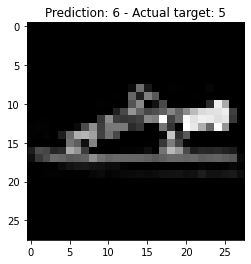

torch.Size([20, 1, 28, 28])


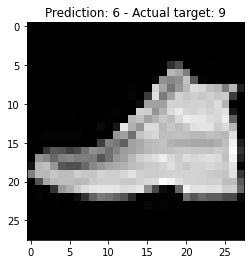

torch.Size([20, 1, 28, 28])


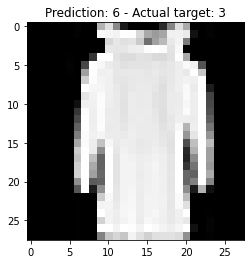

torch.Size([20, 1, 28, 28])


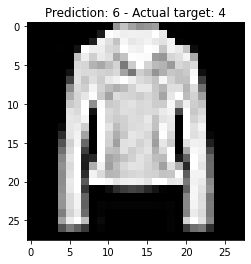

torch.Size([20, 1, 28, 28])


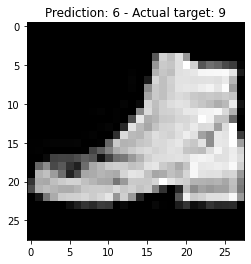

torch.Size([20, 1, 28, 28])


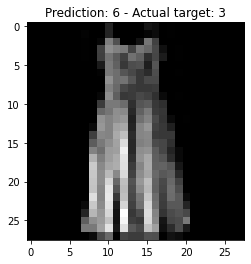

torch.Size([20, 1, 28, 28])


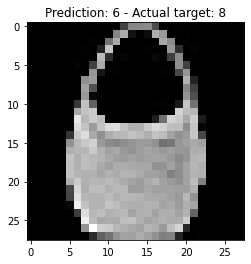

torch.Size([20, 1, 28, 28])


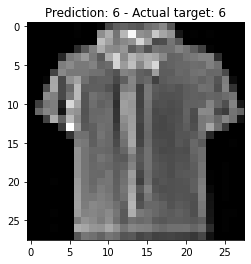

torch.Size([20, 1, 28, 28])


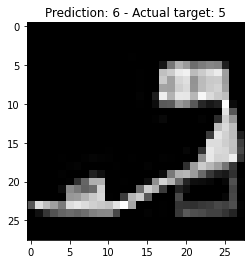

torch.Size([20, 1, 28, 28])


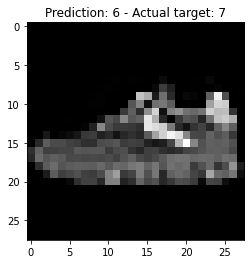

torch.Size([20, 1, 28, 28])


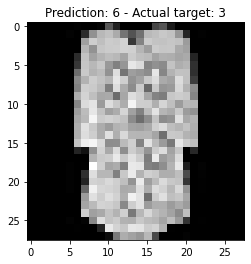

torch.Size([20, 1, 28, 28])


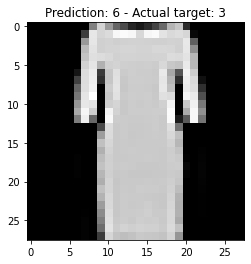

torch.Size([20, 1, 28, 28])


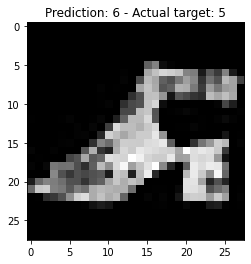

torch.Size([20, 1, 28, 28])


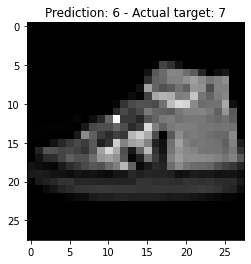

torch.Size([20, 1, 28, 28])


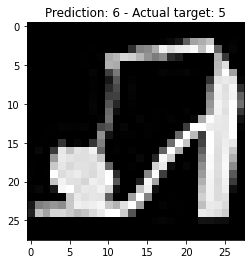

torch.Size([20, 1, 28, 28])


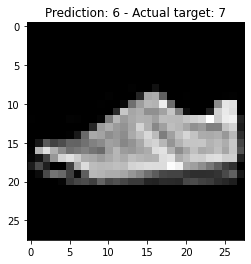

torch.Size([20, 1, 28, 28])


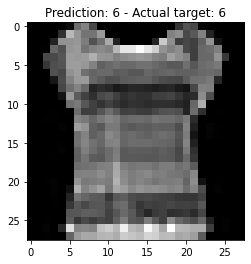

torch.Size([20, 1, 28, 28])


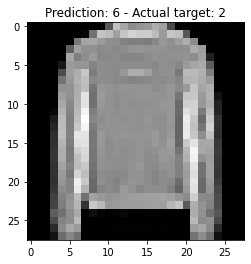

torch.Size([20, 1, 28, 28])


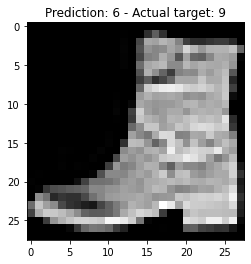

torch.Size([20, 1, 28, 28])


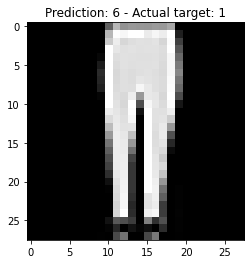

torch.Size([20, 1, 28, 28])


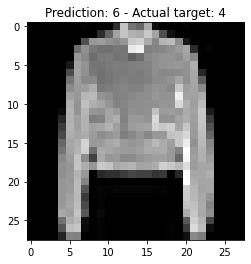

torch.Size([20, 1, 28, 28])


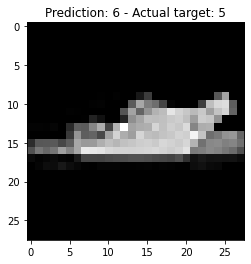

torch.Size([20, 1, 28, 28])


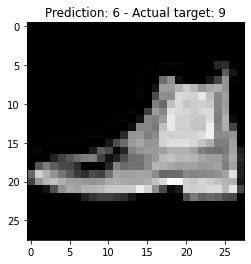

torch.Size([20, 1, 28, 28])


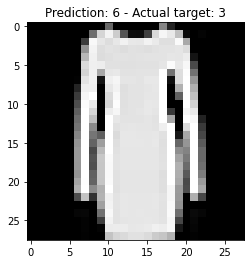

torch.Size([20, 1, 28, 28])


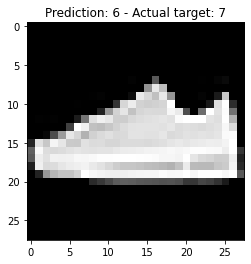

torch.Size([20, 1, 28, 28])


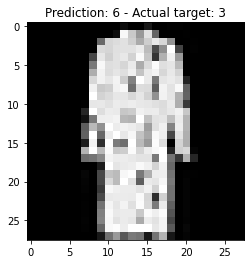

torch.Size([20, 1, 28, 28])


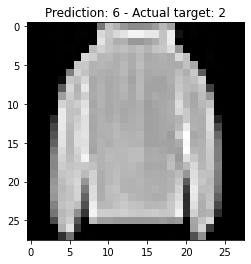

torch.Size([20, 1, 28, 28])


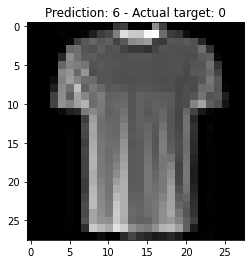

torch.Size([20, 1, 28, 28])


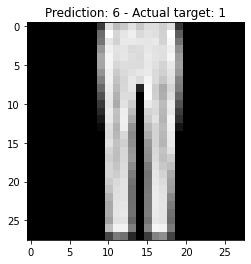

torch.Size([20, 1, 28, 28])


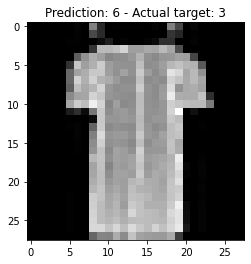

torch.Size([20, 1, 28, 28])


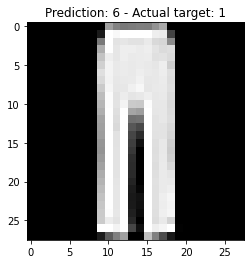

torch.Size([20, 1, 28, 28])


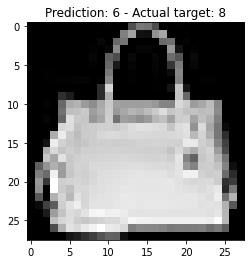

torch.Size([20, 1, 28, 28])


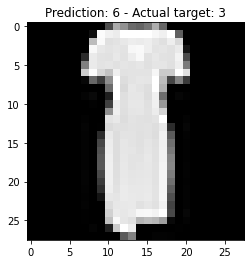

torch.Size([20, 1, 28, 28])


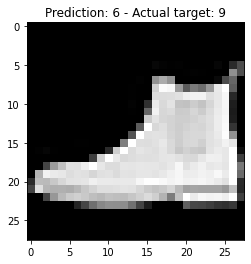

torch.Size([20, 1, 28, 28])


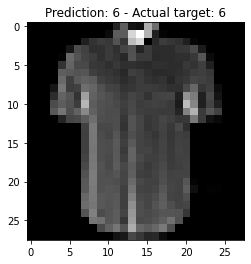

torch.Size([20, 1, 28, 28])


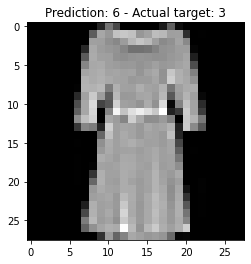

torch.Size([20, 1, 28, 28])


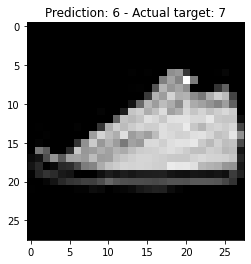

torch.Size([20, 1, 28, 28])


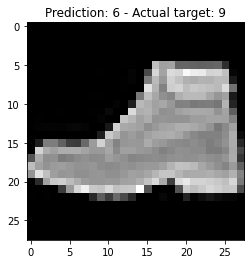

torch.Size([20, 1, 28, 28])


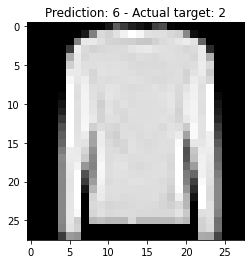

torch.Size([20, 1, 28, 28])


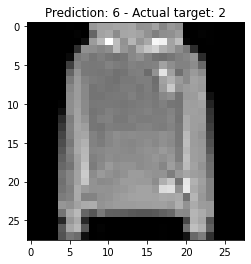

torch.Size([20, 1, 28, 28])


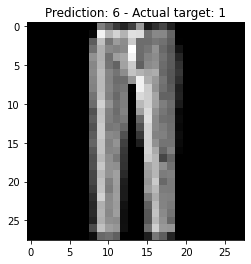

torch.Size([20, 1, 28, 28])


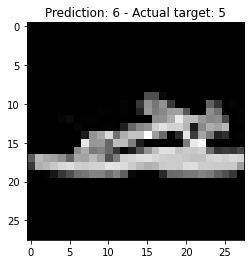

torch.Size([20, 1, 28, 28])


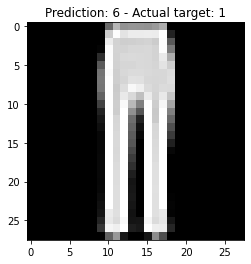

torch.Size([20, 1, 28, 28])


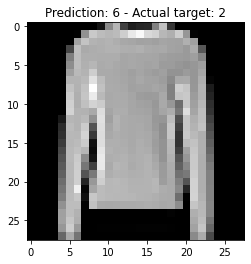

torch.Size([20, 1, 28, 28])


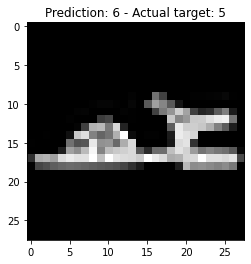

torch.Size([20, 1, 28, 28])


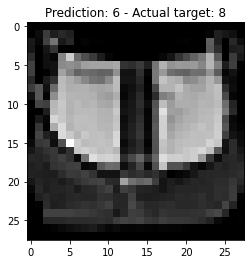

torch.Size([20, 1, 28, 28])


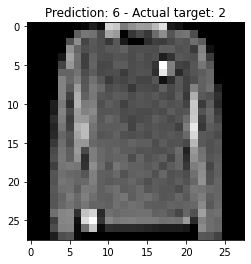

torch.Size([20, 1, 28, 28])


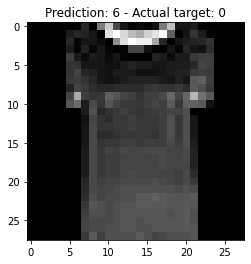

torch.Size([20, 1, 28, 28])


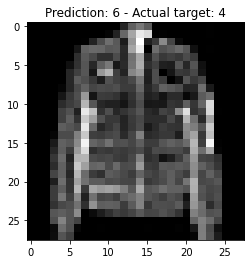

torch.Size([20, 1, 28, 28])


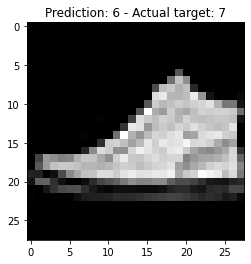

torch.Size([20, 1, 28, 28])


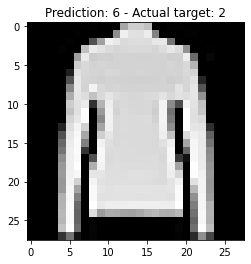

torch.Size([20, 1, 28, 28])


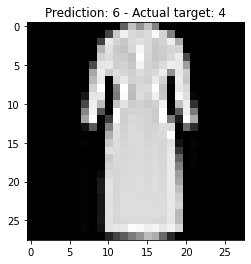

torch.Size([20, 1, 28, 28])


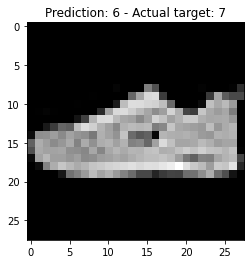

torch.Size([20, 1, 28, 28])


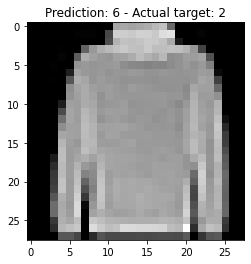

torch.Size([20, 1, 28, 28])


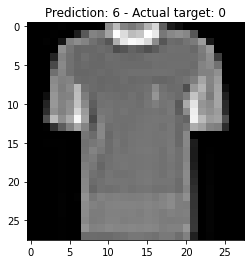

torch.Size([20, 1, 28, 28])


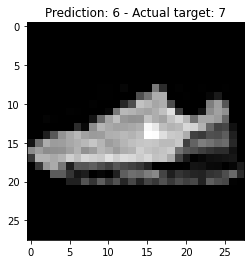

torch.Size([20, 1, 28, 28])


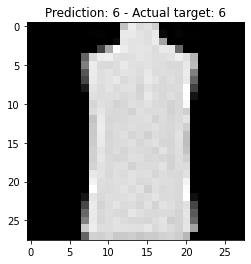

torch.Size([20, 1, 28, 28])


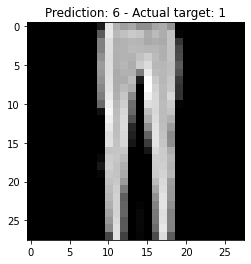

torch.Size([20, 1, 28, 28])


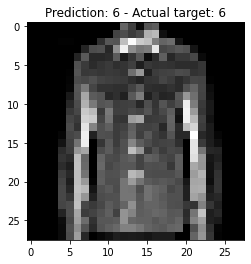

torch.Size([20, 1, 28, 28])


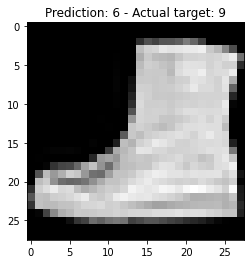

torch.Size([20, 1, 28, 28])


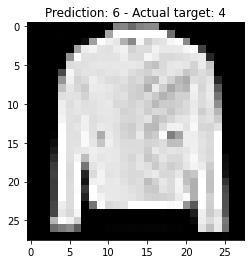

torch.Size([20, 1, 28, 28])


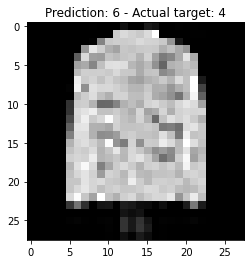

torch.Size([20, 1, 28, 28])


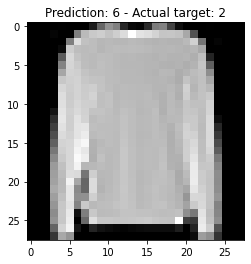

torch.Size([20, 1, 28, 28])


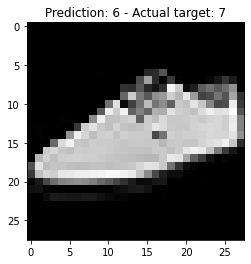

torch.Size([20, 1, 28, 28])


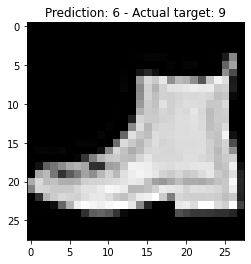

torch.Size([20, 1, 28, 28])


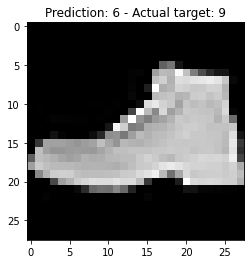

torch.Size([20, 1, 28, 28])


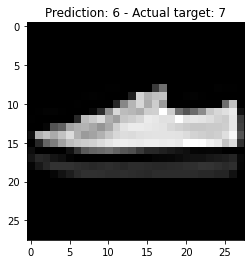

torch.Size([20, 1, 28, 28])


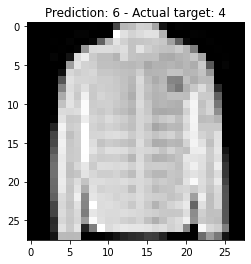

torch.Size([20, 1, 28, 28])


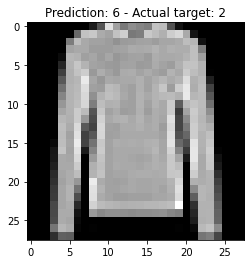

torch.Size([20, 1, 28, 28])


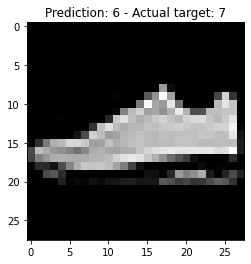

torch.Size([20, 1, 28, 28])


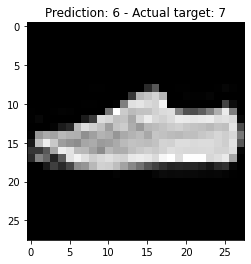

torch.Size([20, 1, 28, 28])


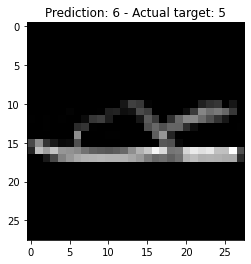

torch.Size([20, 1, 28, 28])


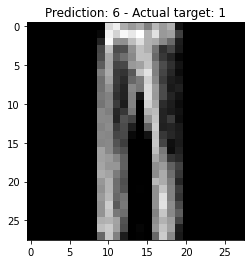

torch.Size([20, 1, 28, 28])


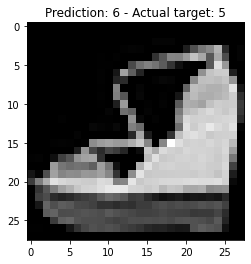

torch.Size([20, 1, 28, 28])


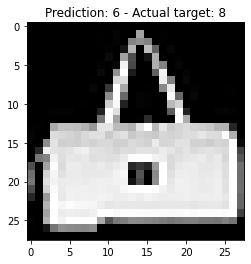

torch.Size([20, 1, 28, 28])


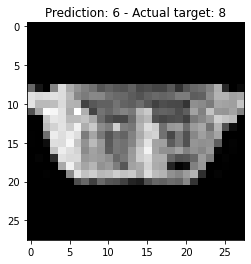

torch.Size([20, 1, 28, 28])


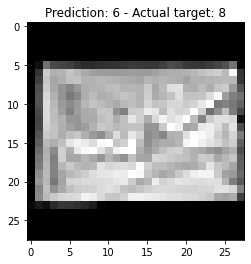

torch.Size([20, 1, 28, 28])


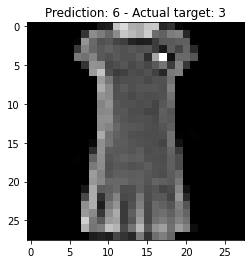

torch.Size([20, 1, 28, 28])


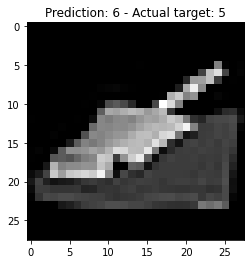

torch.Size([20, 1, 28, 28])


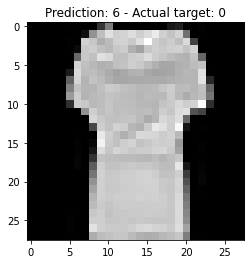

torch.Size([20, 1, 28, 28])


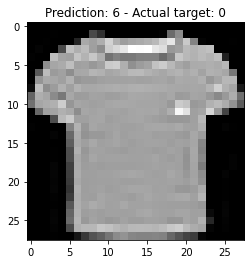

torch.Size([20, 1, 28, 28])


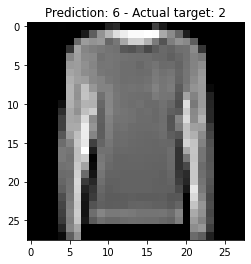

torch.Size([20, 1, 28, 28])


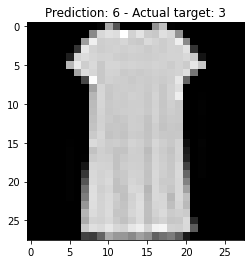

torch.Size([20, 1, 28, 28])


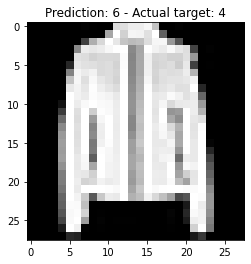

torch.Size([20, 1, 28, 28])


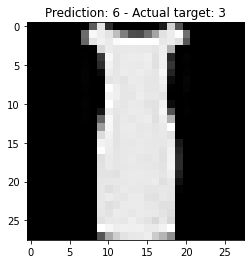

torch.Size([20, 1, 28, 28])


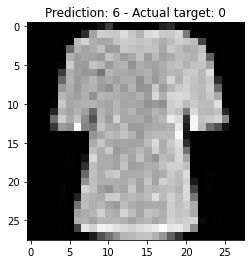

torch.Size([20, 1, 28, 28])


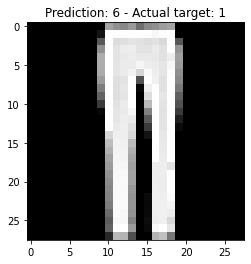

torch.Size([20, 1, 28, 28])


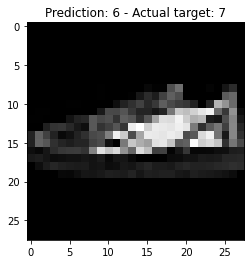

torch.Size([20, 1, 28, 28])


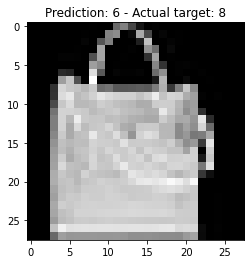

torch.Size([20, 1, 28, 28])


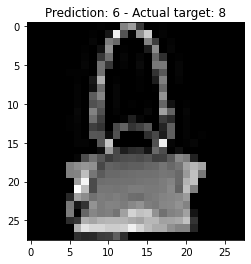

torch.Size([20, 1, 28, 28])


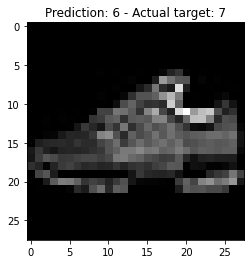

torch.Size([20, 1, 28, 28])


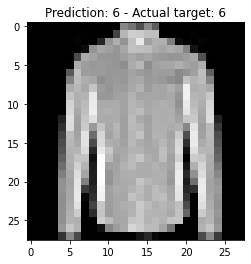

torch.Size([20, 1, 28, 28])


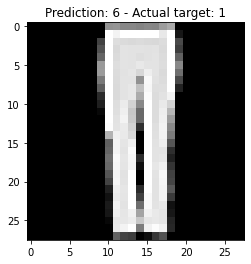

torch.Size([20, 1, 28, 28])


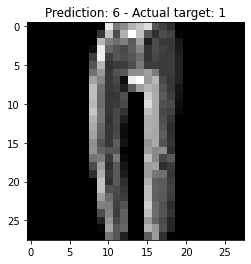

torch.Size([20, 1, 28, 28])


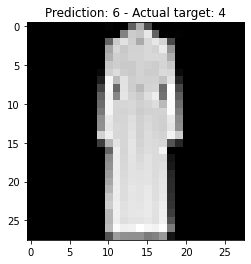

torch.Size([20, 1, 28, 28])


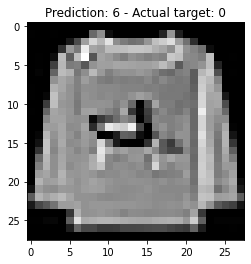

torch.Size([20, 1, 28, 28])


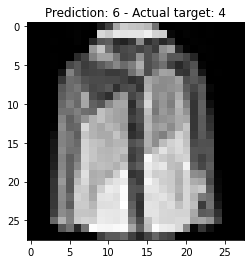

torch.Size([20, 1, 28, 28])


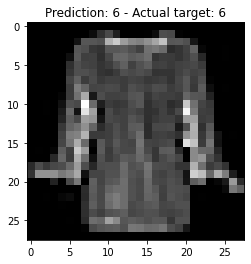

torch.Size([20, 1, 28, 28])


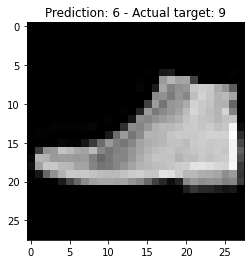

torch.Size([20, 1, 28, 28])


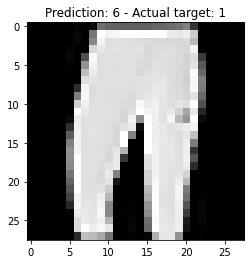

torch.Size([20, 1, 28, 28])


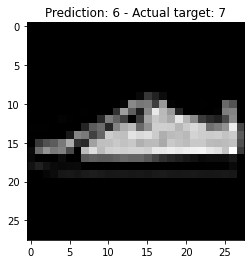

torch.Size([20, 1, 28, 28])


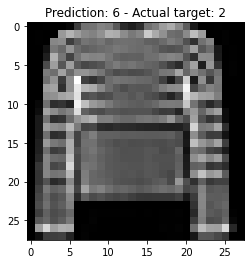

torch.Size([20, 1, 28, 28])


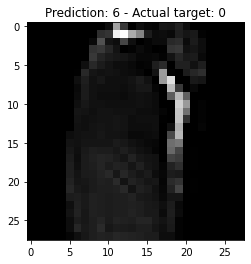

torch.Size([20, 1, 28, 28])


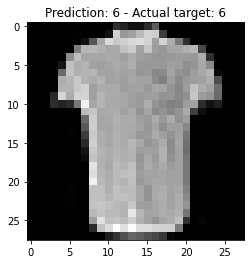

torch.Size([20, 1, 28, 28])


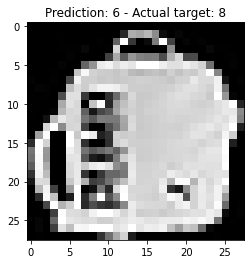

torch.Size([20, 1, 28, 28])


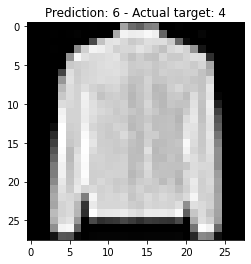

torch.Size([20, 1, 28, 28])


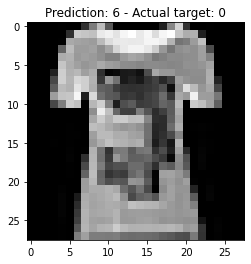

torch.Size([20, 1, 28, 28])


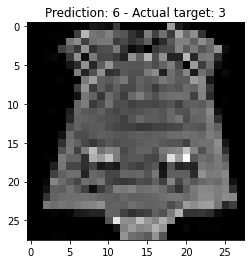

torch.Size([20, 1, 28, 28])


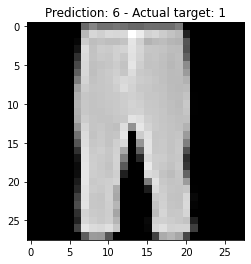

torch.Size([20, 1, 28, 28])


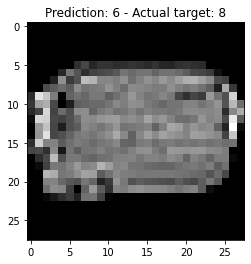

torch.Size([20, 1, 28, 28])


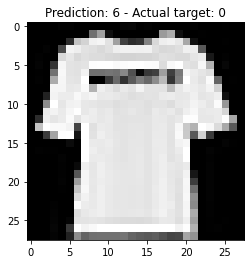

torch.Size([20, 1, 28, 28])


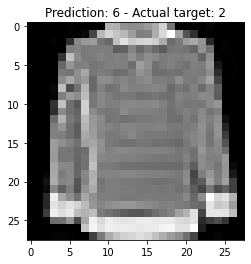

torch.Size([20, 1, 28, 28])


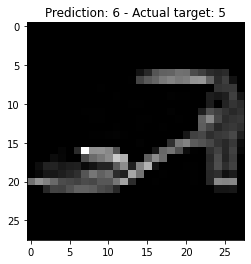

torch.Size([20, 1, 28, 28])


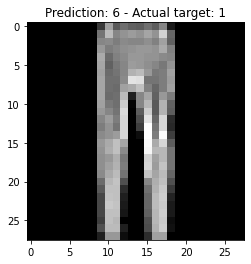

torch.Size([20, 1, 28, 28])


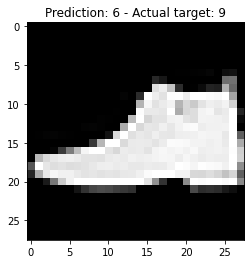

torch.Size([20, 1, 28, 28])


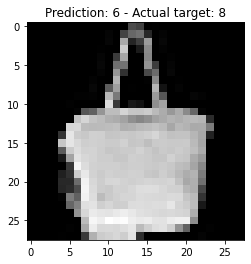

torch.Size([20, 1, 28, 28])


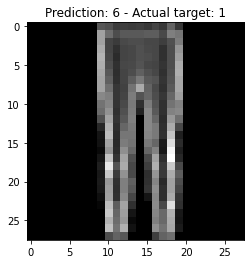

torch.Size([20, 1, 28, 28])


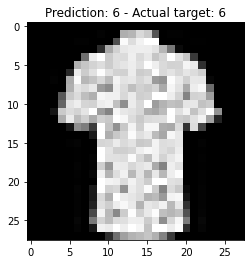

torch.Size([20, 1, 28, 28])


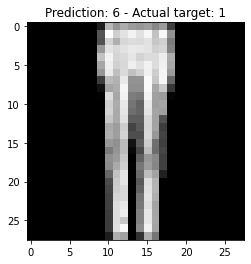

torch.Size([20, 1, 28, 28])


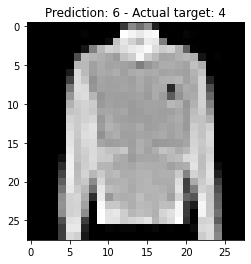

torch.Size([20, 1, 28, 28])


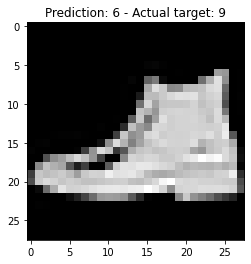

torch.Size([20, 1, 28, 28])


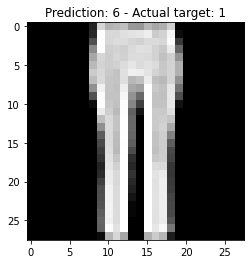

torch.Size([20, 1, 28, 28])


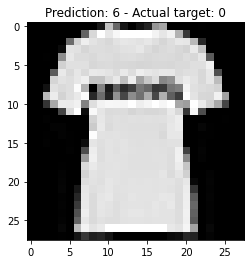

torch.Size([20, 1, 28, 28])


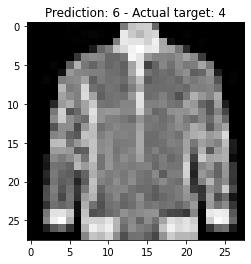

torch.Size([20, 1, 28, 28])


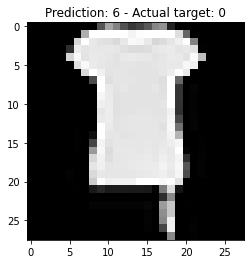

torch.Size([20, 1, 28, 28])


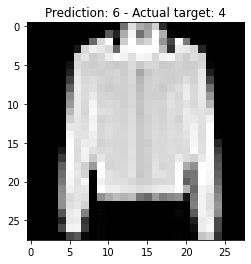

torch.Size([20, 1, 28, 28])


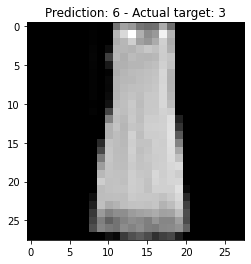

torch.Size([20, 1, 28, 28])


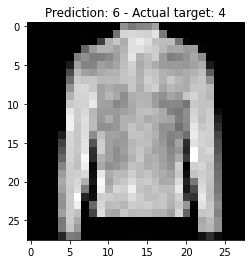

torch.Size([20, 1, 28, 28])


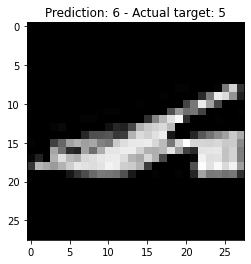

torch.Size([20, 1, 28, 28])


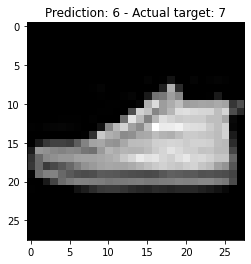

torch.Size([20, 1, 28, 28])


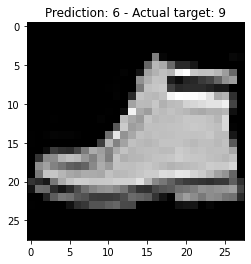

torch.Size([20, 1, 28, 28])


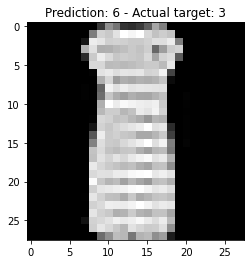

torch.Size([20, 1, 28, 28])


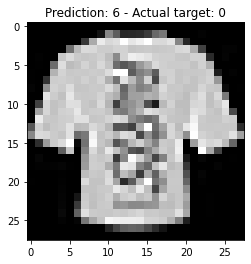

torch.Size([20, 1, 28, 28])


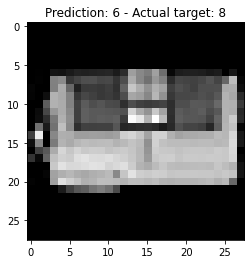

torch.Size([20, 1, 28, 28])


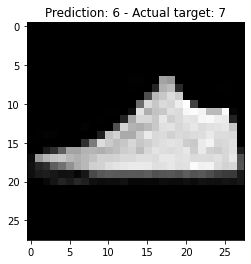

torch.Size([20, 1, 28, 28])


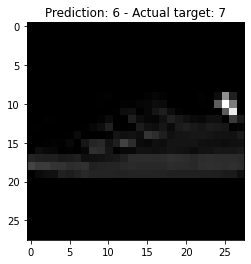

torch.Size([20, 1, 28, 28])


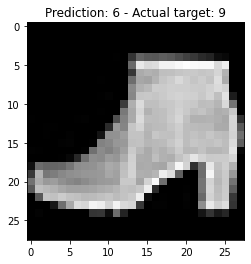

torch.Size([20, 1, 28, 28])


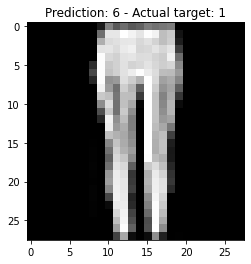

torch.Size([20, 1, 28, 28])


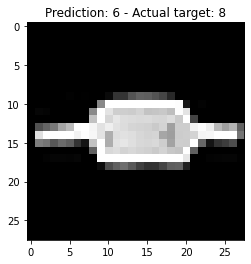

torch.Size([20, 1, 28, 28])


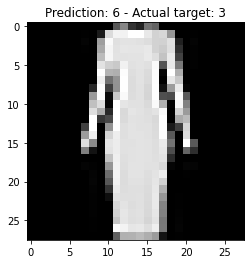

torch.Size([20, 1, 28, 28])


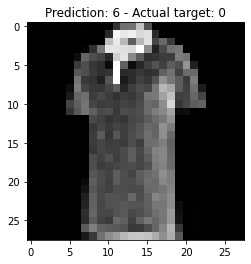

torch.Size([20, 1, 28, 28])


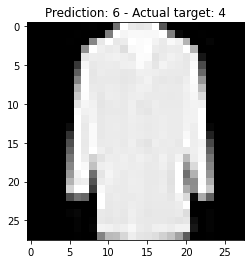

torch.Size([20, 1, 28, 28])


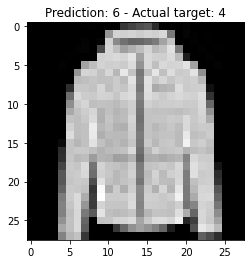

torch.Size([20, 1, 28, 28])


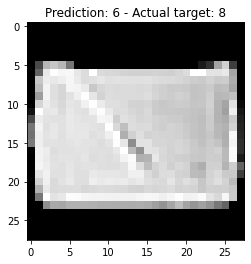

torch.Size([20, 1, 28, 28])


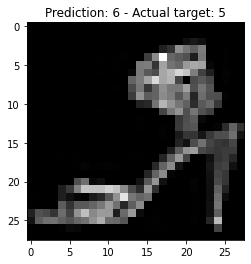

torch.Size([20, 1, 28, 28])


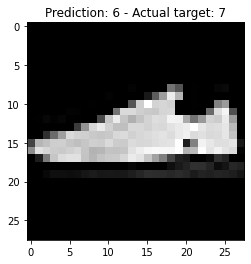

torch.Size([20, 1, 28, 28])


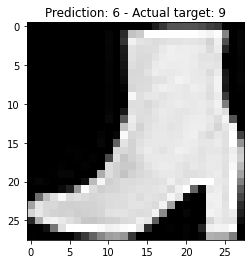

torch.Size([20, 1, 28, 28])


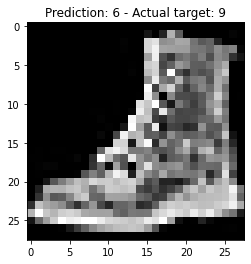

torch.Size([20, 1, 28, 28])


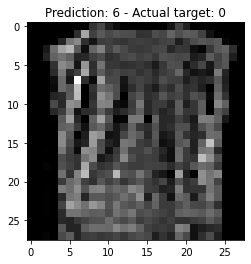

torch.Size([20, 1, 28, 28])


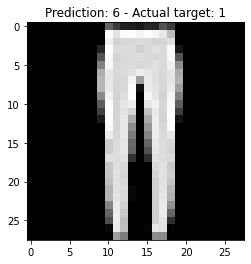

torch.Size([20, 1, 28, 28])


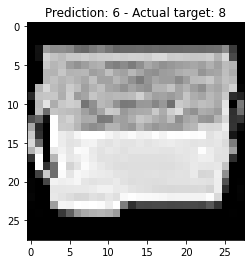

torch.Size([20, 1, 28, 28])


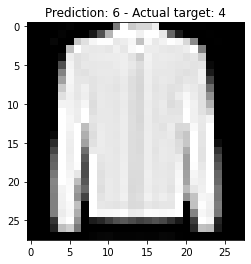

torch.Size([20, 1, 28, 28])


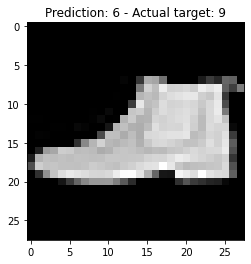

torch.Size([20, 1, 28, 28])


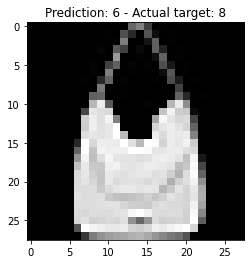

torch.Size([20, 1, 28, 28])


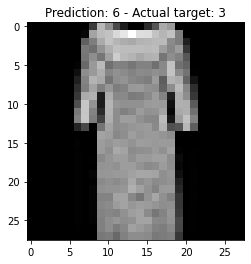

torch.Size([20, 1, 28, 28])


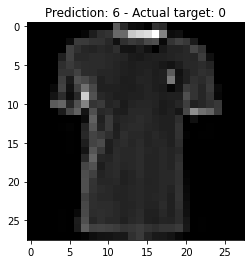

torch.Size([20, 1, 28, 28])


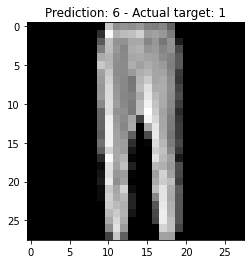

torch.Size([20, 1, 28, 28])


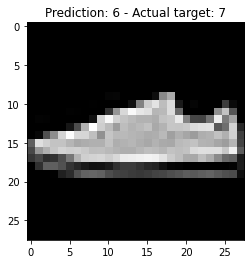

torch.Size([20, 1, 28, 28])


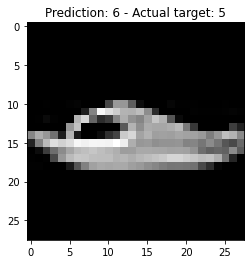

torch.Size([20, 1, 28, 28])


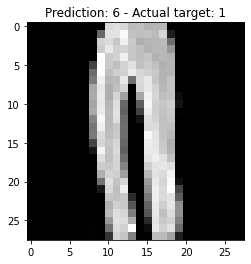

torch.Size([20, 1, 28, 28])


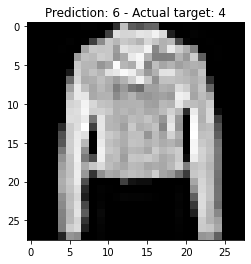

torch.Size([20, 1, 28, 28])


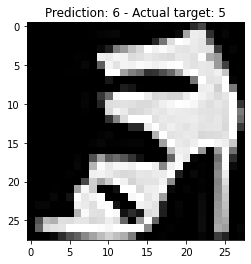

torch.Size([20, 1, 28, 28])


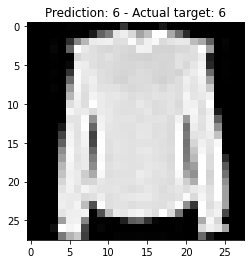

torch.Size([20, 1, 28, 28])


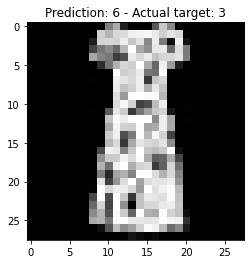

torch.Size([20, 1, 28, 28])


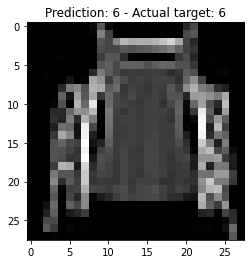

torch.Size([20, 1, 28, 28])


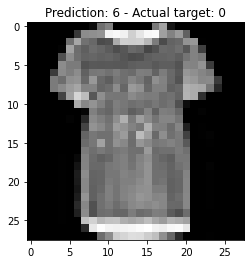

torch.Size([20, 1, 28, 28])


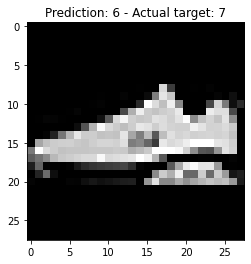

torch.Size([20, 1, 28, 28])


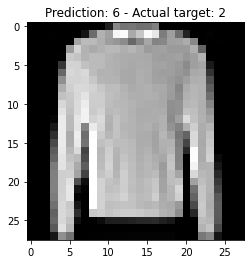

torch.Size([20, 1, 28, 28])


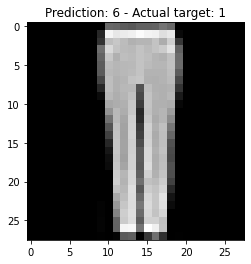

torch.Size([20, 1, 28, 28])


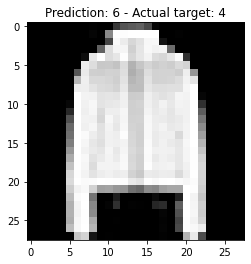

torch.Size([20, 1, 28, 28])


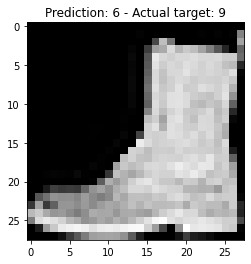

torch.Size([20, 1, 28, 28])


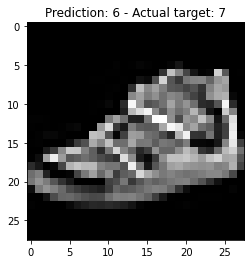

torch.Size([20, 1, 28, 28])


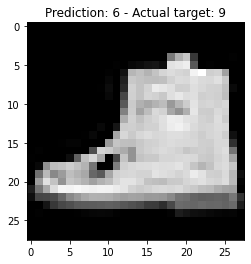

torch.Size([20, 1, 28, 28])


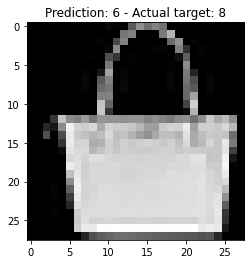

torch.Size([20, 1, 28, 28])


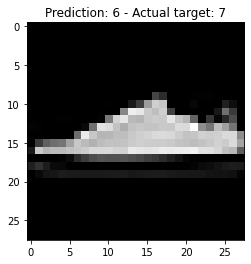

torch.Size([20, 1, 28, 28])


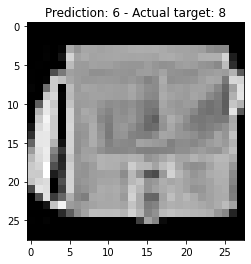

torch.Size([20, 1, 28, 28])


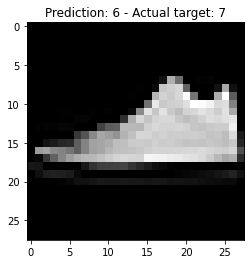

torch.Size([20, 1, 28, 28])


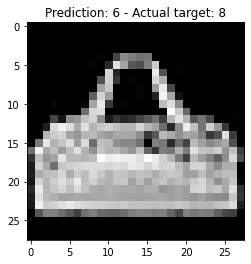

torch.Size([20, 1, 28, 28])


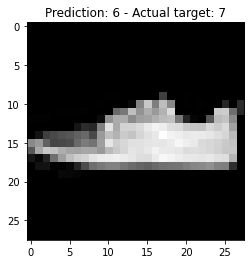

torch.Size([20, 1, 28, 28])


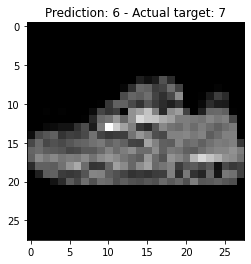

torch.Size([20, 1, 28, 28])


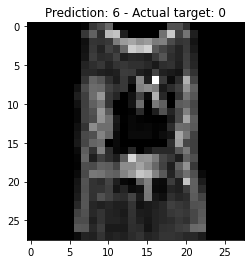

torch.Size([20, 1, 28, 28])


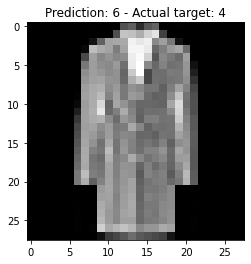

torch.Size([20, 1, 28, 28])


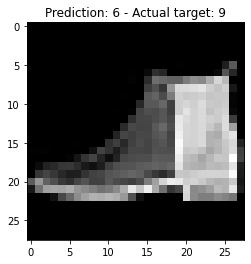

torch.Size([20, 1, 28, 28])


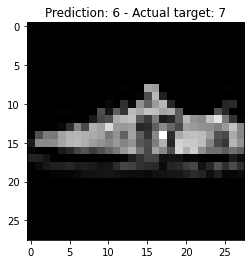

torch.Size([20, 1, 28, 28])


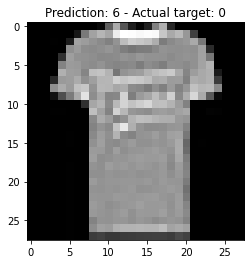

torch.Size([20, 1, 28, 28])


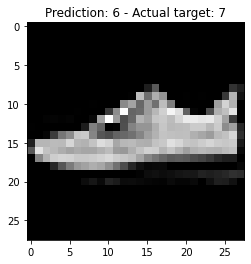

torch.Size([20, 1, 28, 28])


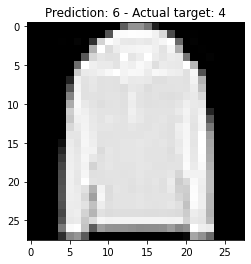

torch.Size([20, 1, 28, 28])


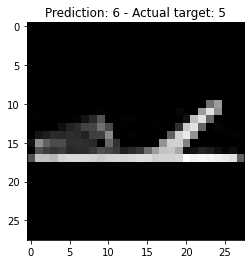

torch.Size([20, 1, 28, 28])


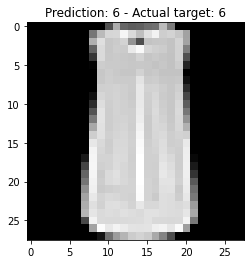

torch.Size([20, 1, 28, 28])


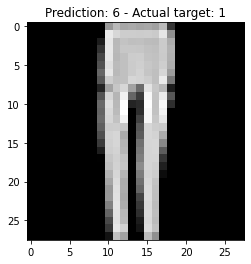

torch.Size([20, 1, 28, 28])


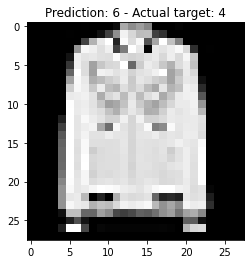

torch.Size([20, 1, 28, 28])


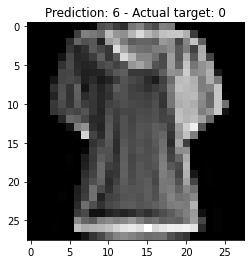

torch.Size([20, 1, 28, 28])


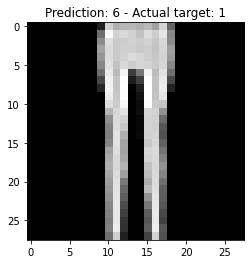

torch.Size([20, 1, 28, 28])


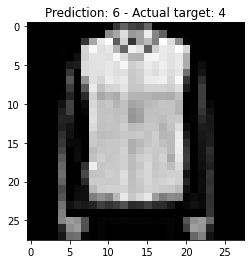

torch.Size([20, 1, 28, 28])


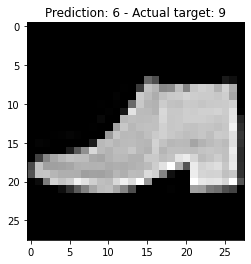

torch.Size([20, 1, 28, 28])


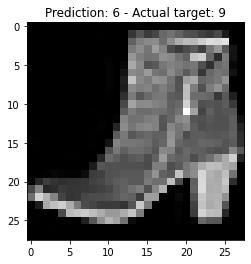

torch.Size([20, 1, 28, 28])


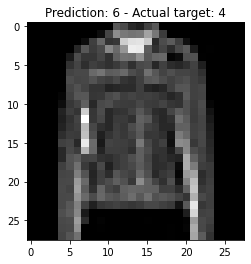

torch.Size([20, 1, 28, 28])


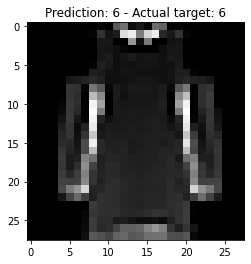

torch.Size([20, 1, 28, 28])


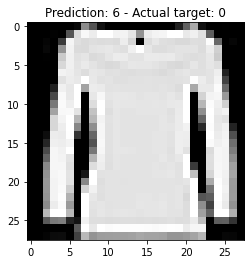

torch.Size([20, 1, 28, 28])


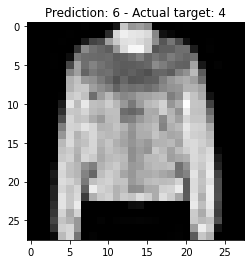

torch.Size([20, 1, 28, 28])


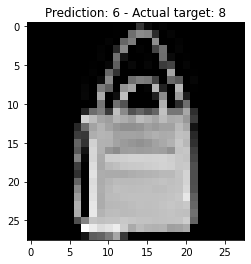

torch.Size([20, 1, 28, 28])


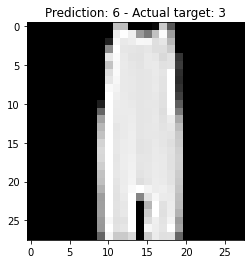

torch.Size([20, 1, 28, 28])


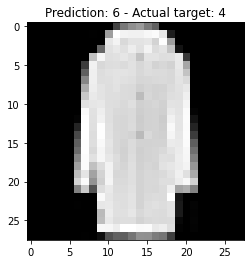

torch.Size([20, 1, 28, 28])


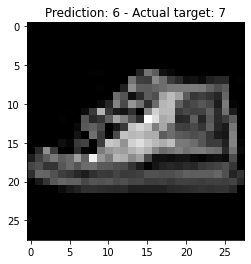

torch.Size([20, 1, 28, 28])


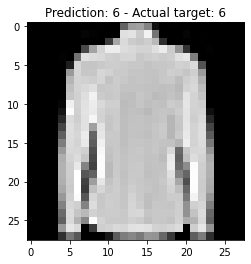

torch.Size([20, 1, 28, 28])


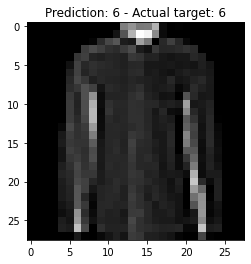

torch.Size([20, 1, 28, 28])


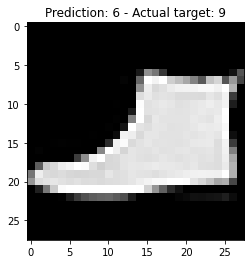

torch.Size([20, 1, 28, 28])


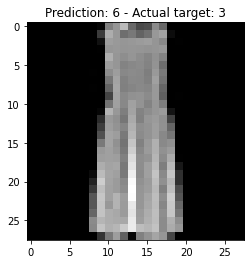

torch.Size([20, 1, 28, 28])


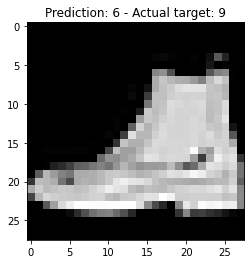

torch.Size([20, 1, 28, 28])


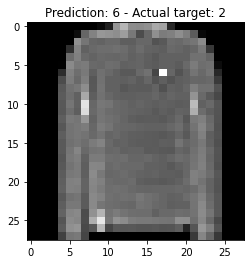

torch.Size([20, 1, 28, 28])


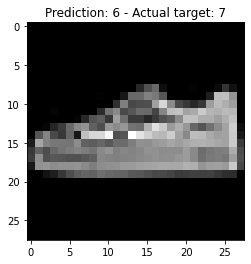

torch.Size([20, 1, 28, 28])


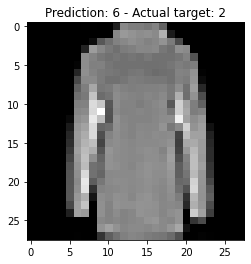

torch.Size([20, 1, 28, 28])


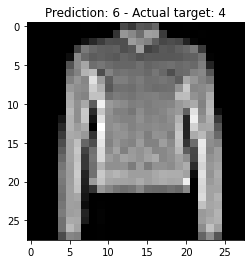

torch.Size([20, 1, 28, 28])


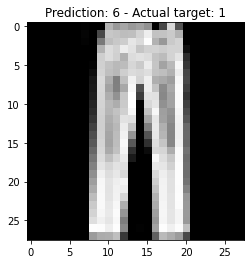

torch.Size([20, 1, 28, 28])


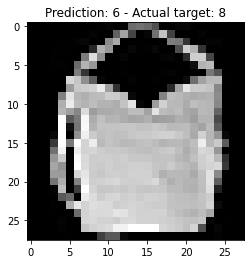

torch.Size([20, 1, 28, 28])


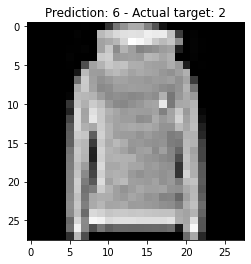

torch.Size([20, 1, 28, 28])


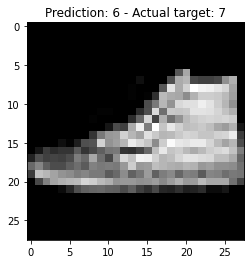

torch.Size([20, 1, 28, 28])


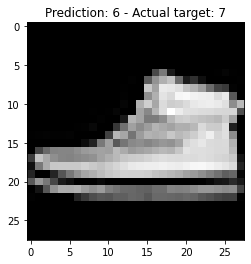

torch.Size([20, 1, 28, 28])


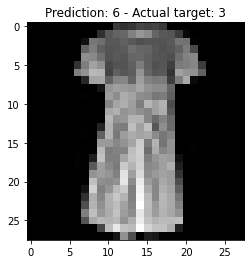

torch.Size([20, 1, 28, 28])


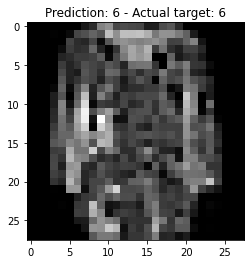

torch.Size([20, 1, 28, 28])


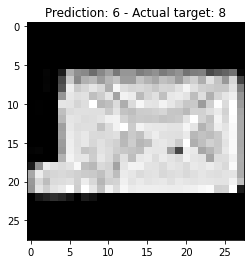

torch.Size([20, 1, 28, 28])


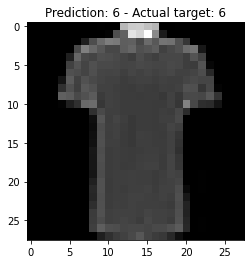

torch.Size([20, 1, 28, 28])


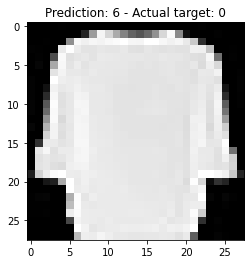

torch.Size([20, 1, 28, 28])


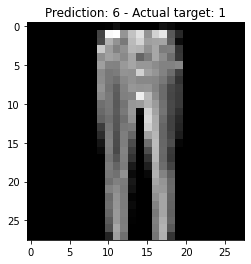

torch.Size([20, 1, 28, 28])


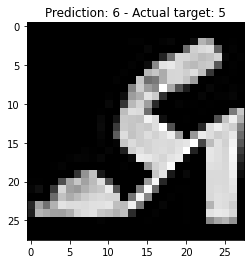

torch.Size([20, 1, 28, 28])


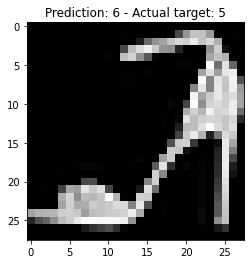

torch.Size([20, 1, 28, 28])


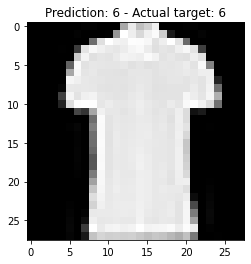

torch.Size([20, 1, 28, 28])


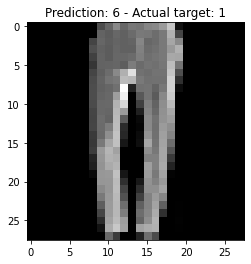

torch.Size([20, 1, 28, 28])


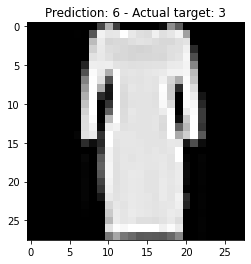

torch.Size([20, 1, 28, 28])


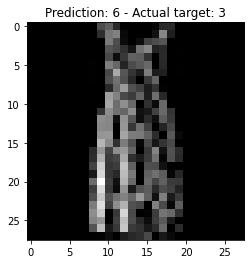

torch.Size([20, 1, 28, 28])


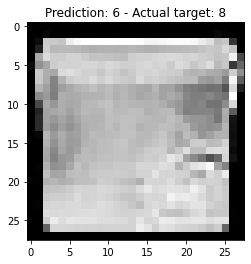

torch.Size([20, 1, 28, 28])


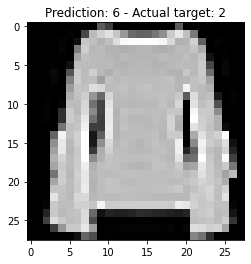

torch.Size([20, 1, 28, 28])


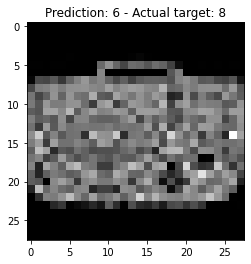

torch.Size([20, 1, 28, 28])


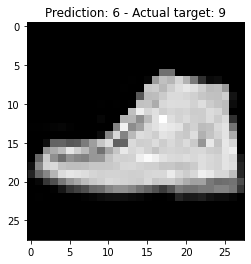

torch.Size([20, 1, 28, 28])


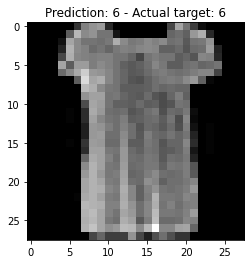

torch.Size([20, 1, 28, 28])


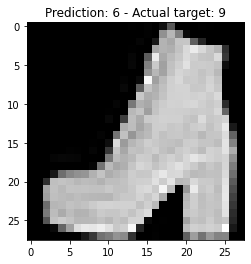

torch.Size([20, 1, 28, 28])


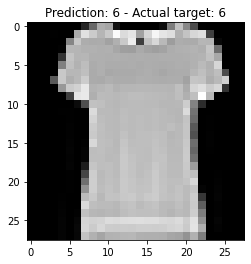

torch.Size([20, 1, 28, 28])


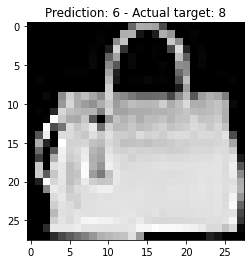

torch.Size([20, 1, 28, 28])


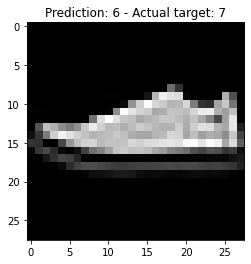

torch.Size([20, 1, 28, 28])


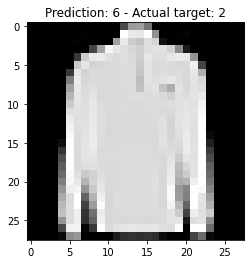

torch.Size([20, 1, 28, 28])


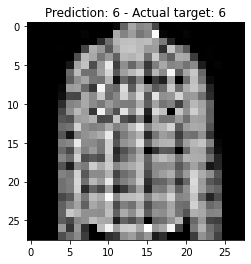

torch.Size([20, 1, 28, 28])


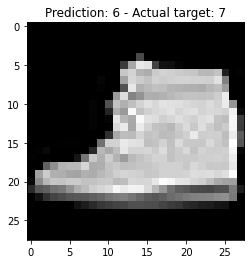

torch.Size([20, 1, 28, 28])


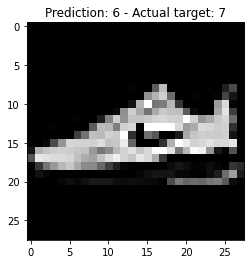

torch.Size([20, 1, 28, 28])


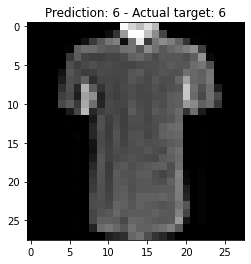

torch.Size([20, 1, 28, 28])


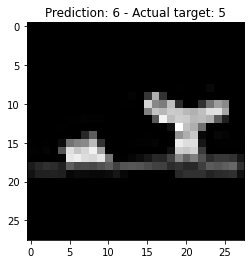

torch.Size([20, 1, 28, 28])


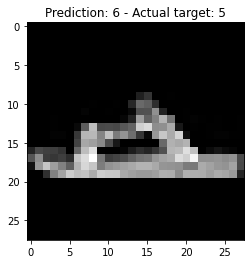

torch.Size([20, 1, 28, 28])


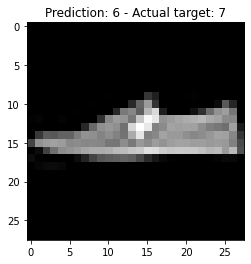

torch.Size([20, 1, 28, 28])


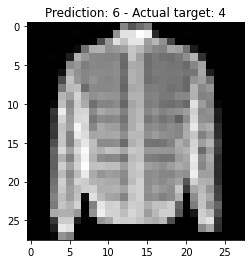

torch.Size([20, 1, 28, 28])


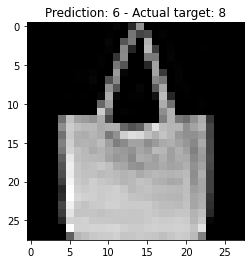

torch.Size([20, 1, 28, 28])


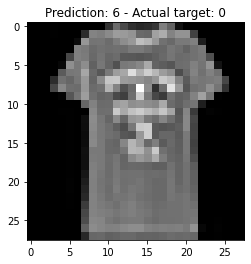

torch.Size([20, 1, 28, 28])


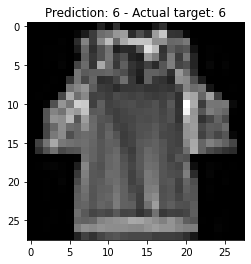

torch.Size([20, 1, 28, 28])


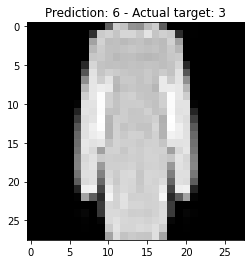

torch.Size([20, 1, 28, 28])


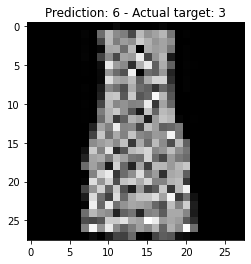

torch.Size([20, 1, 28, 28])


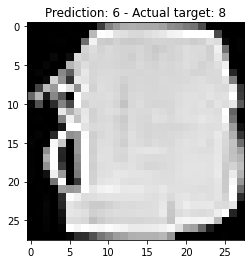

torch.Size([20, 1, 28, 28])


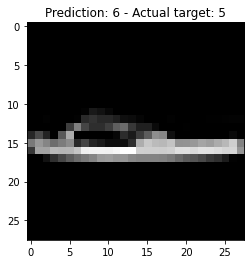

torch.Size([20, 1, 28, 28])


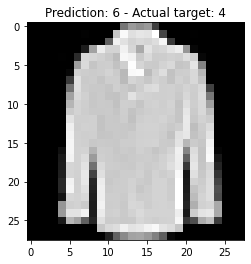

torch.Size([20, 1, 28, 28])


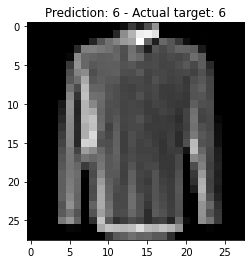

torch.Size([20, 1, 28, 28])


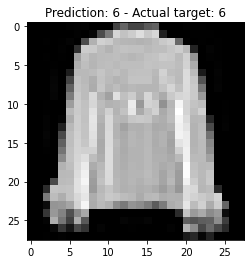

torch.Size([20, 1, 28, 28])


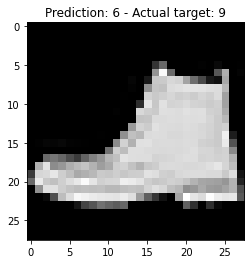

torch.Size([20, 1, 28, 28])


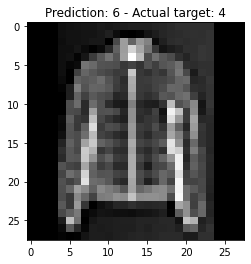

torch.Size([20, 1, 28, 28])


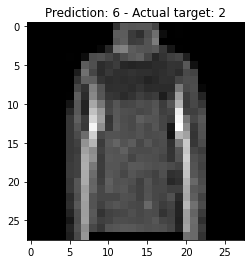

torch.Size([20, 1, 28, 28])


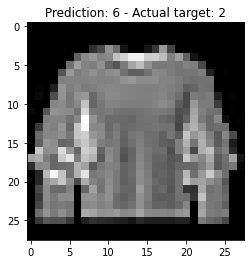

torch.Size([20, 1, 28, 28])


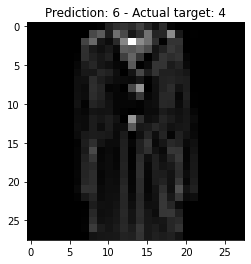

torch.Size([20, 1, 28, 28])


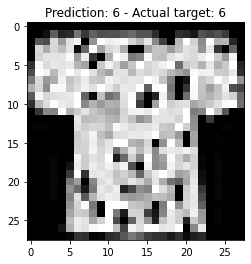

torch.Size([20, 1, 28, 28])


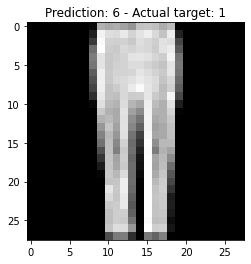

torch.Size([20, 1, 28, 28])


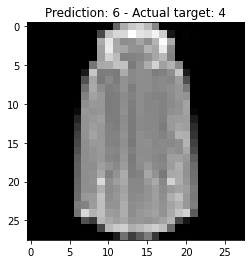

torch.Size([20, 1, 28, 28])


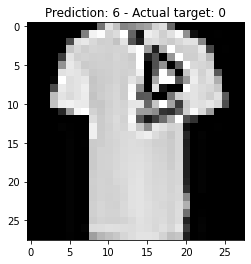

torch.Size([20, 1, 28, 28])


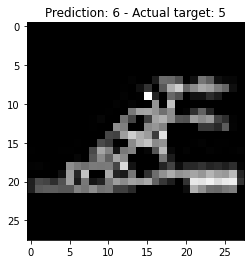

torch.Size([20, 1, 28, 28])


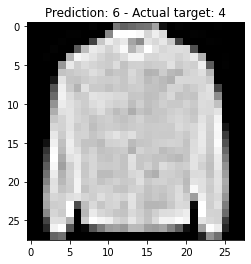

torch.Size([20, 1, 28, 28])


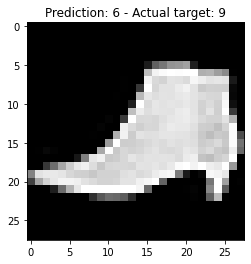

torch.Size([20, 1, 28, 28])


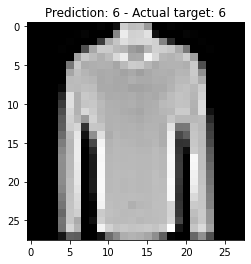

torch.Size([20, 1, 28, 28])


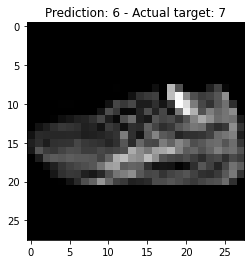

torch.Size([20, 1, 28, 28])


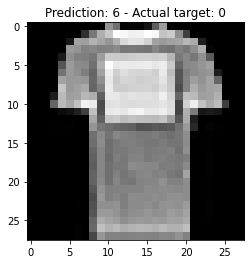

torch.Size([20, 1, 28, 28])


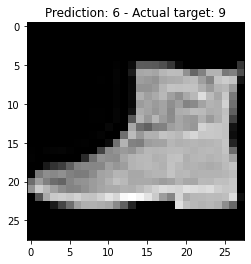

torch.Size([20, 1, 28, 28])


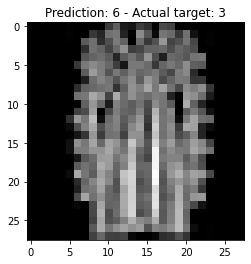

torch.Size([20, 1, 28, 28])


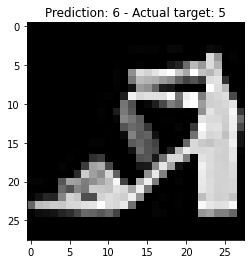

torch.Size([20, 1, 28, 28])


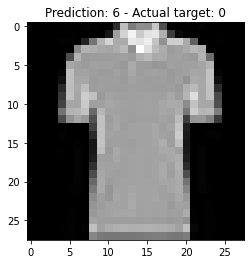

torch.Size([20, 1, 28, 28])


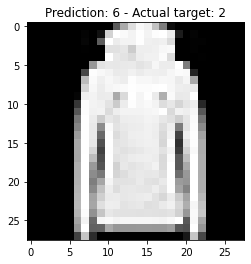

torch.Size([20, 1, 28, 28])


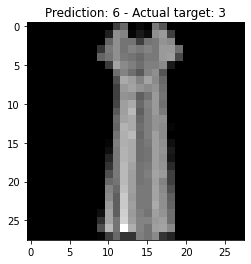

torch.Size([20, 1, 28, 28])


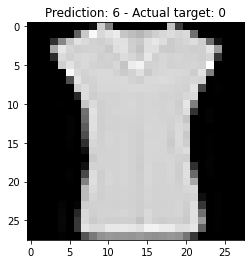

torch.Size([20, 1, 28, 28])


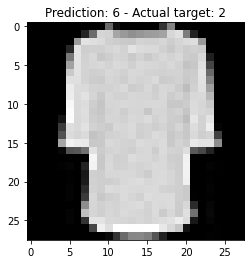

torch.Size([20, 1, 28, 28])


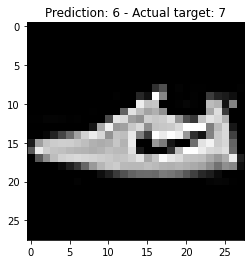

torch.Size([20, 1, 28, 28])


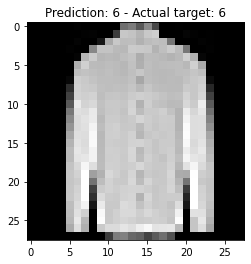

torch.Size([20, 1, 28, 28])


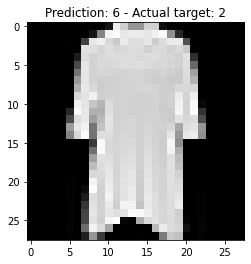

torch.Size([20, 1, 28, 28])


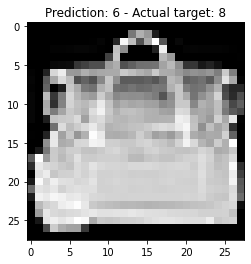

torch.Size([20, 1, 28, 28])


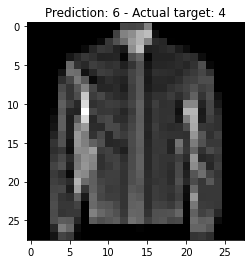

torch.Size([20, 1, 28, 28])


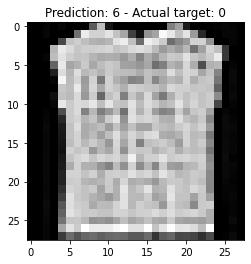

torch.Size([20, 1, 28, 28])


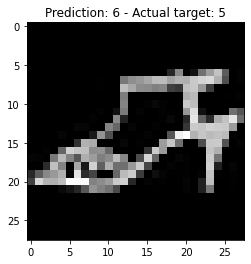

torch.Size([20, 1, 28, 28])


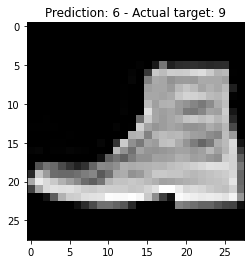

torch.Size([20, 1, 28, 28])


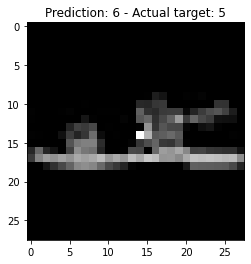

torch.Size([20, 1, 28, 28])


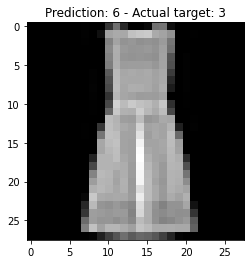

torch.Size([20, 1, 28, 28])


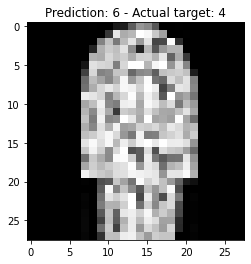

torch.Size([20, 1, 28, 28])


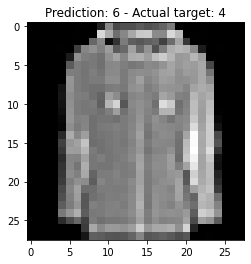

torch.Size([20, 1, 28, 28])


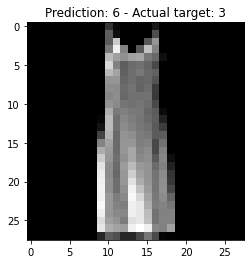

torch.Size([20, 1, 28, 28])


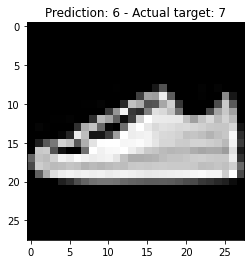

torch.Size([20, 1, 28, 28])


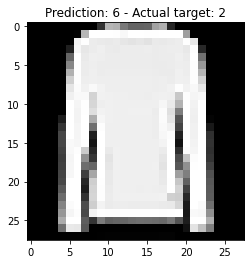

torch.Size([20, 1, 28, 28])


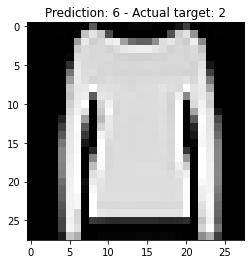

torch.Size([20, 1, 28, 28])


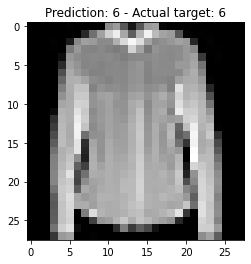

torch.Size([20, 1, 28, 28])


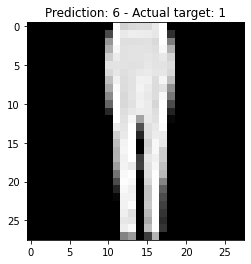

torch.Size([20, 1, 28, 28])


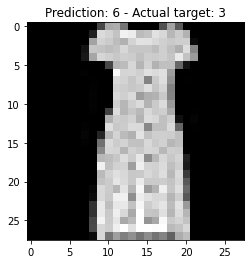

torch.Size([20, 1, 28, 28])


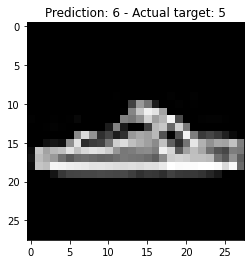

torch.Size([20, 1, 28, 28])


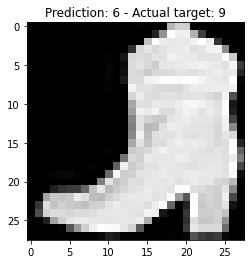

torch.Size([20, 1, 28, 28])


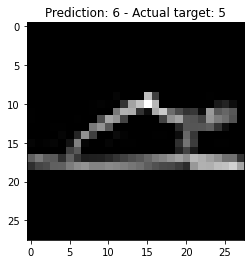

torch.Size([20, 1, 28, 28])


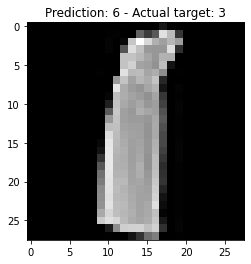

torch.Size([20, 1, 28, 28])


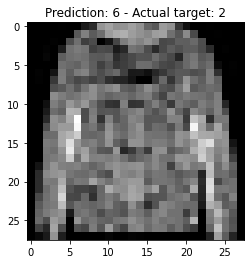

torch.Size([20, 1, 28, 28])


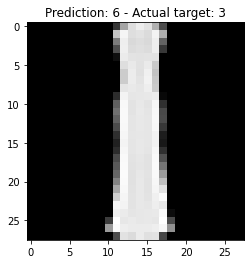

torch.Size([20, 1, 28, 28])


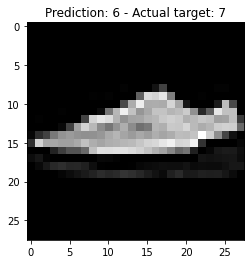

torch.Size([20, 1, 28, 28])


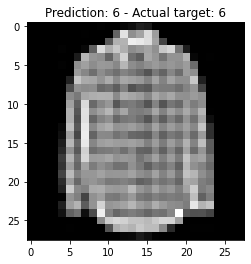

torch.Size([20, 1, 28, 28])


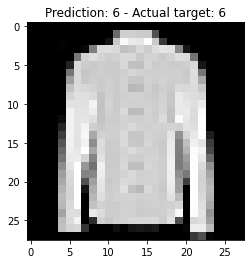

torch.Size([20, 1, 28, 28])


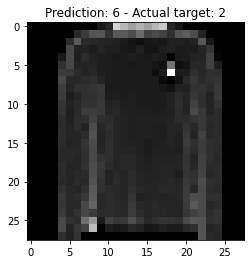

torch.Size([20, 1, 28, 28])


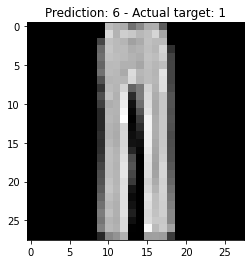

torch.Size([20, 1, 28, 28])


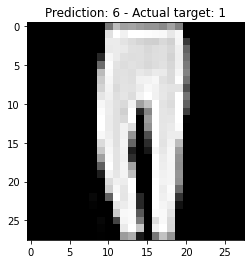

torch.Size([20, 1, 28, 28])


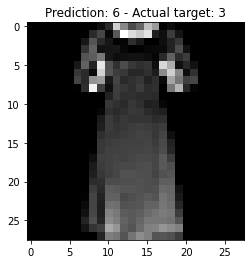

torch.Size([20, 1, 28, 28])


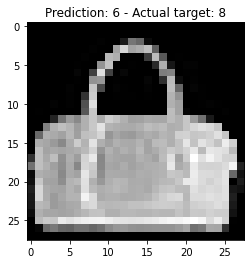

torch.Size([20, 1, 28, 28])


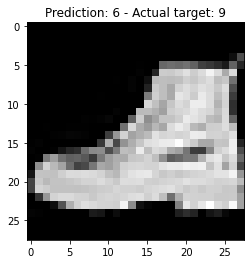

torch.Size([20, 1, 28, 28])


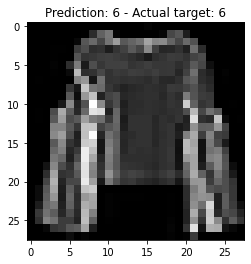

torch.Size([20, 1, 28, 28])


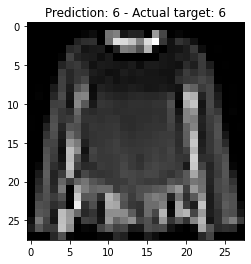

torch.Size([20, 1, 28, 28])


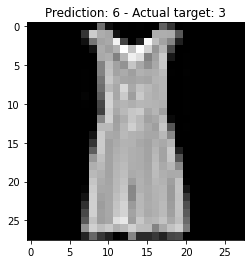

torch.Size([20, 1, 28, 28])


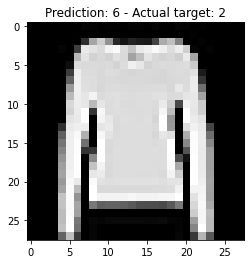

torch.Size([20, 1, 28, 28])


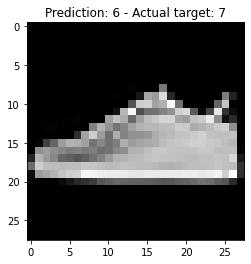

torch.Size([20, 1, 28, 28])


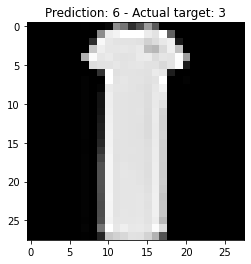

torch.Size([20, 1, 28, 28])


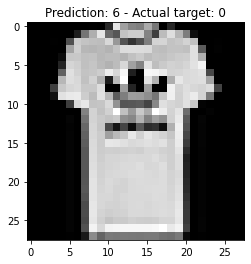

torch.Size([20, 1, 28, 28])


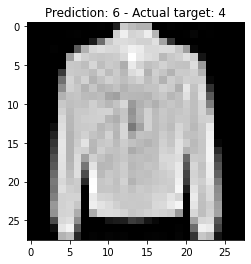

torch.Size([20, 1, 28, 28])


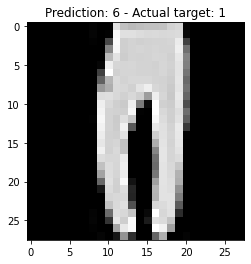

torch.Size([20, 1, 28, 28])


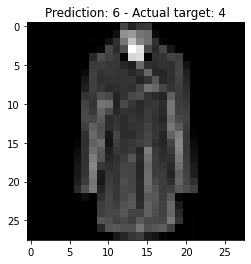

torch.Size([20, 1, 28, 28])


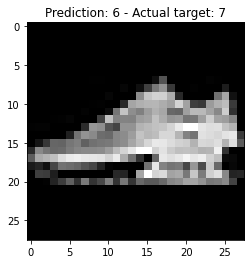

torch.Size([20, 1, 28, 28])


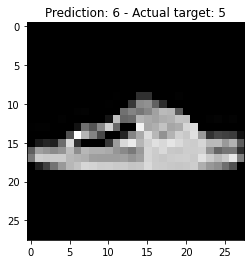

torch.Size([20, 1, 28, 28])


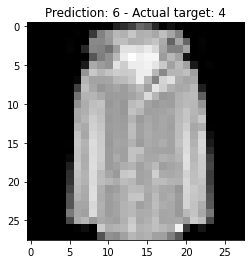

torch.Size([20, 1, 28, 28])


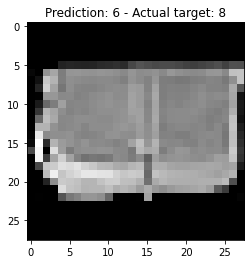

torch.Size([20, 1, 28, 28])


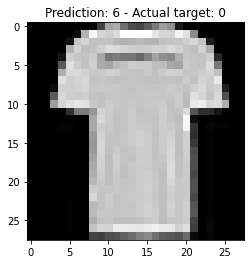

torch.Size([20, 1, 28, 28])


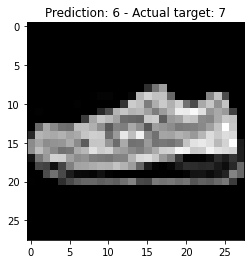

torch.Size([20, 1, 28, 28])


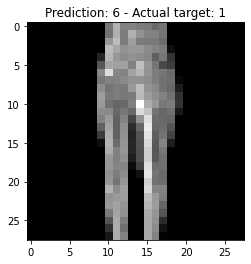

torch.Size([20, 1, 28, 28])


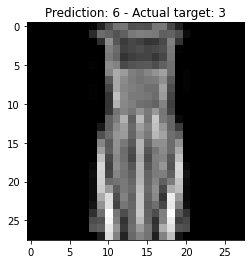

torch.Size([20, 1, 28, 28])


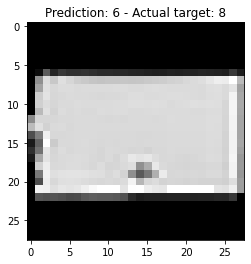

torch.Size([20, 1, 28, 28])


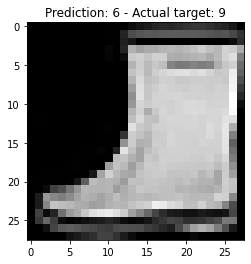

torch.Size([20, 1, 28, 28])


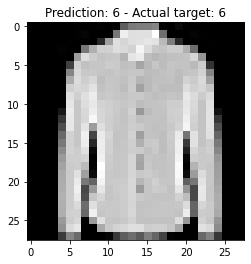

torch.Size([20, 1, 28, 28])


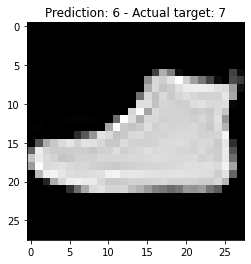

torch.Size([20, 1, 28, 28])


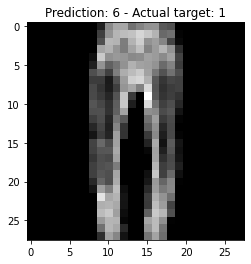

torch.Size([20, 1, 28, 28])


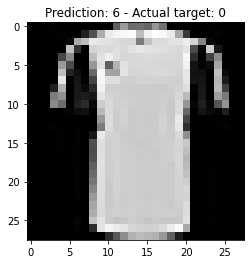

torch.Size([20, 1, 28, 28])


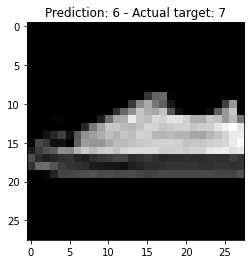

torch.Size([20, 1, 28, 28])


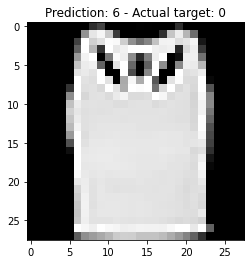

torch.Size([20, 1, 28, 28])


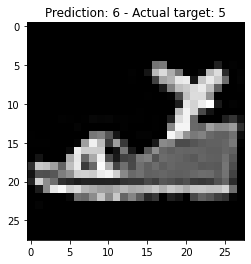

torch.Size([20, 1, 28, 28])


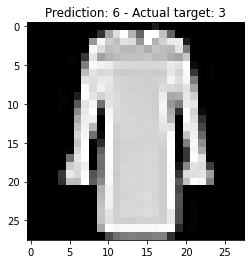

torch.Size([20, 1, 28, 28])


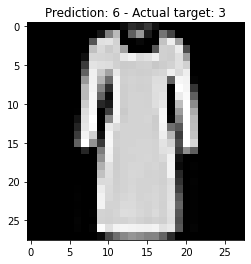

torch.Size([20, 1, 28, 28])


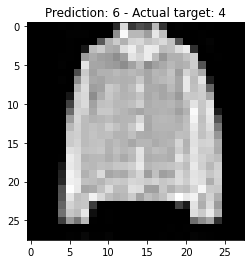

torch.Size([20, 1, 28, 28])


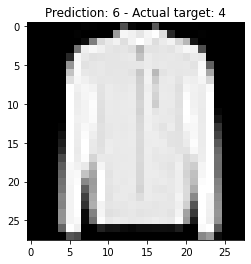

torch.Size([20, 1, 28, 28])


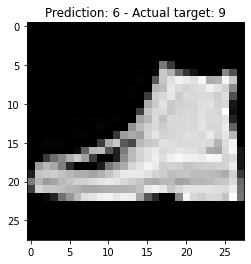

torch.Size([20, 1, 28, 28])


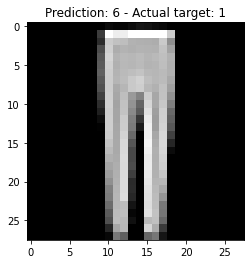

torch.Size([20, 1, 28, 28])


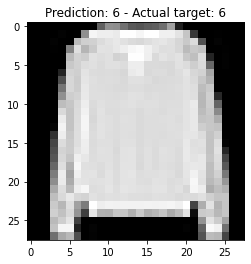

torch.Size([20, 1, 28, 28])


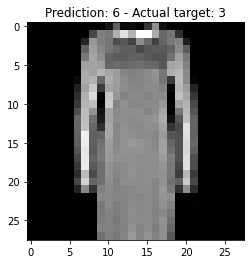

torch.Size([20, 1, 28, 28])


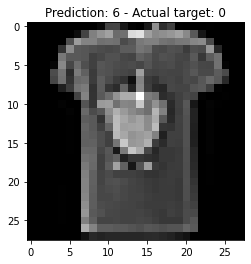

torch.Size([20, 1, 28, 28])


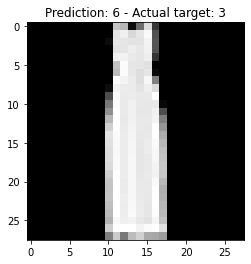

torch.Size([20, 1, 28, 28])


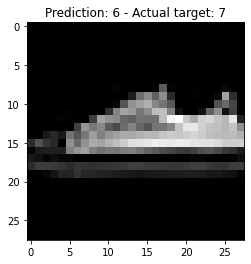

torch.Size([20, 1, 28, 28])


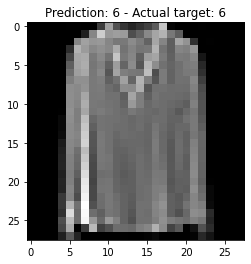

torch.Size([20, 1, 28, 28])


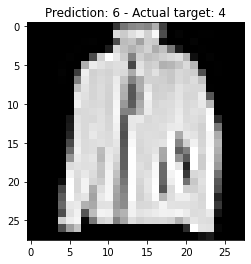

torch.Size([20, 1, 28, 28])


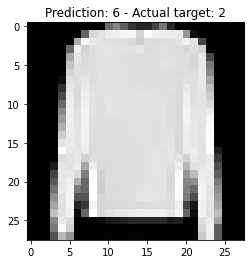

torch.Size([20, 1, 28, 28])


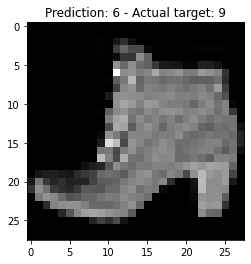

torch.Size([20, 1, 28, 28])


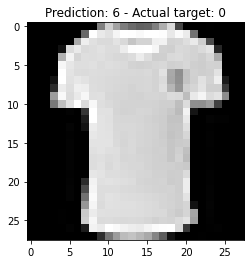

torch.Size([20, 1, 28, 28])


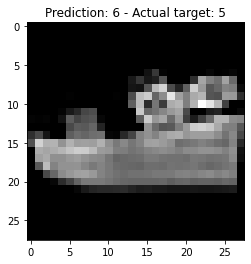

torch.Size([20, 1, 28, 28])


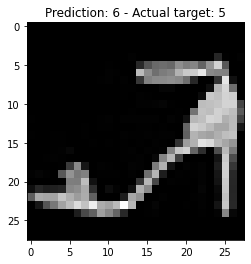

torch.Size([20, 1, 28, 28])


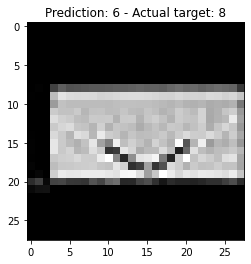

torch.Size([20, 1, 28, 28])


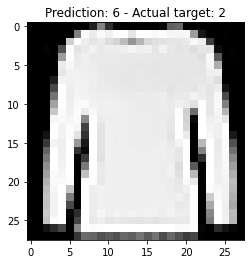

torch.Size([20, 1, 28, 28])


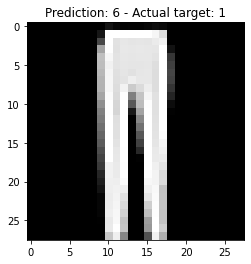

torch.Size([20, 1, 28, 28])


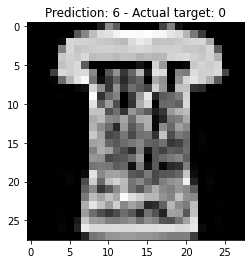

torch.Size([20, 1, 28, 28])


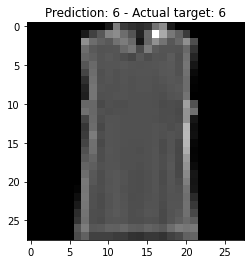

torch.Size([20, 1, 28, 28])


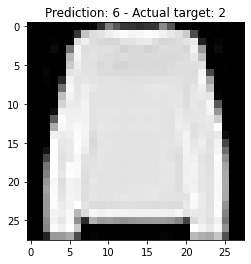

torch.Size([20, 1, 28, 28])


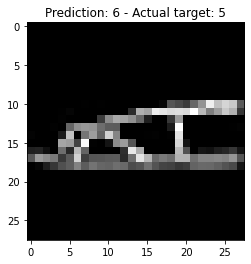

torch.Size([20, 1, 28, 28])


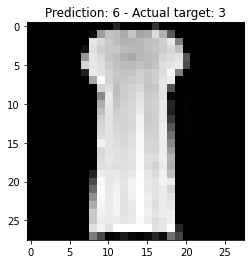

torch.Size([20, 1, 28, 28])


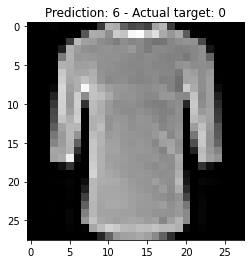

torch.Size([20, 1, 28, 28])


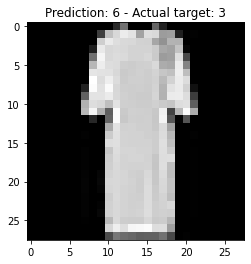

torch.Size([20, 1, 28, 28])


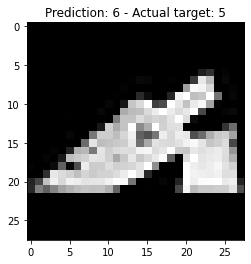

torch.Size([20, 1, 28, 28])


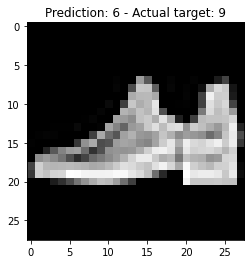

torch.Size([20, 1, 28, 28])


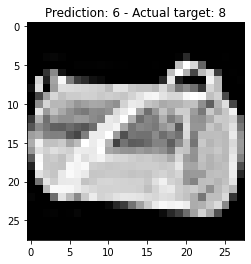

torch.Size([20, 1, 28, 28])


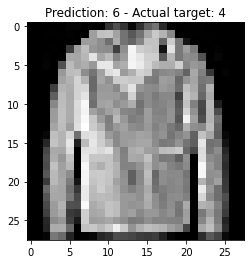

torch.Size([20, 1, 28, 28])


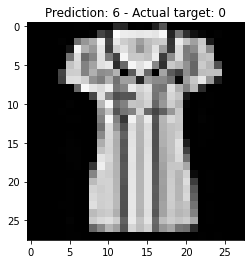

torch.Size([20, 1, 28, 28])


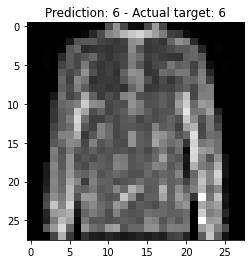

torch.Size([20, 1, 28, 28])


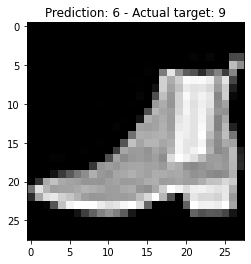

torch.Size([20, 1, 28, 28])


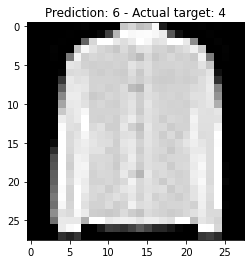

torch.Size([20, 1, 28, 28])


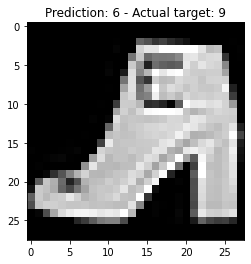

torch.Size([20, 1, 28, 28])


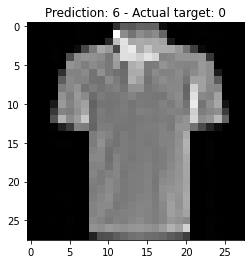

torch.Size([20, 1, 28, 28])


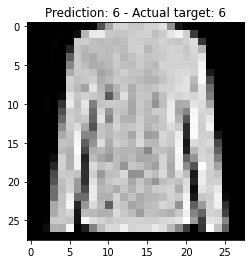

torch.Size([20, 1, 28, 28])


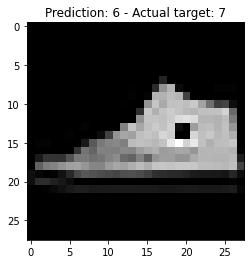

torch.Size([20, 1, 28, 28])


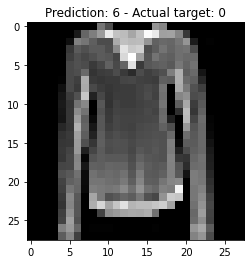

torch.Size([20, 1, 28, 28])


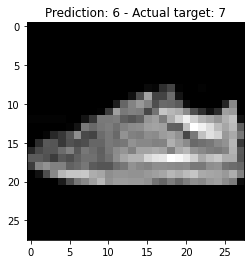

torch.Size([20, 1, 28, 28])


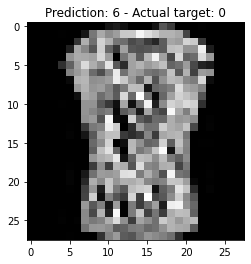

torch.Size([20, 1, 28, 28])


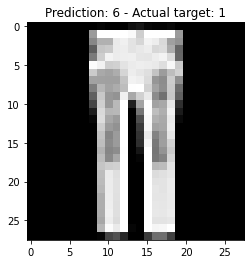

torch.Size([20, 1, 28, 28])


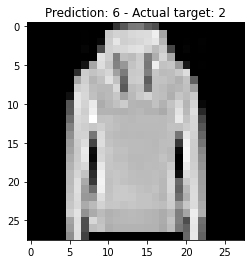

torch.Size([20, 1, 28, 28])


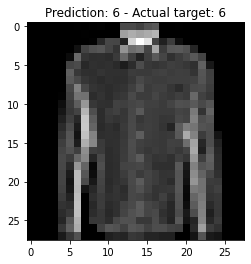

torch.Size([20, 1, 28, 28])


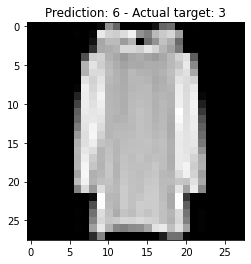

torch.Size([20, 1, 28, 28])


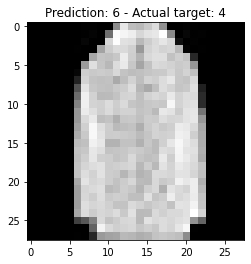

torch.Size([20, 1, 28, 28])


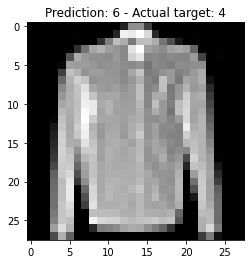

torch.Size([20, 1, 28, 28])


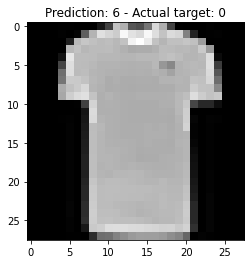

torch.Size([20, 1, 28, 28])


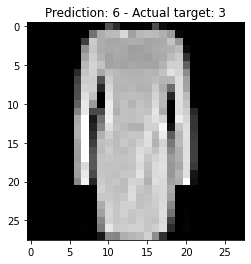

torch.Size([20, 1, 28, 28])


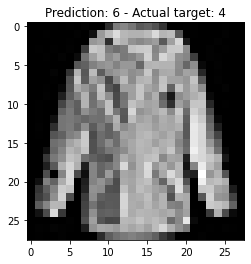

torch.Size([20, 1, 28, 28])


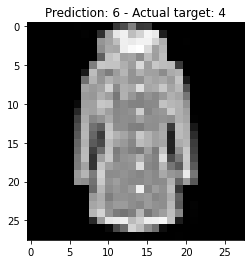

torch.Size([20, 1, 28, 28])


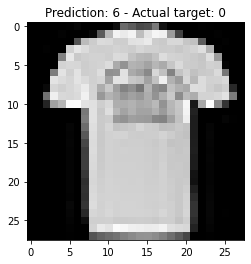

torch.Size([20, 1, 28, 28])


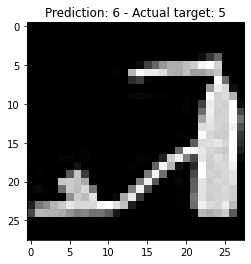

torch.Size([20, 1, 28, 28])


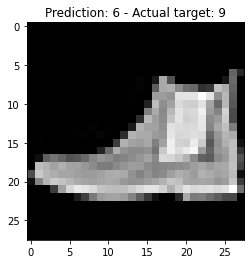

torch.Size([20, 1, 28, 28])


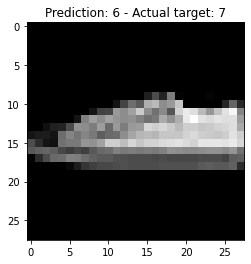

torch.Size([20, 1, 28, 28])


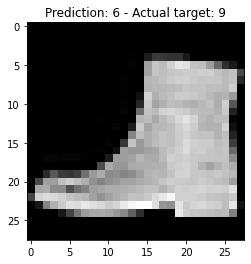

torch.Size([20, 1, 28, 28])


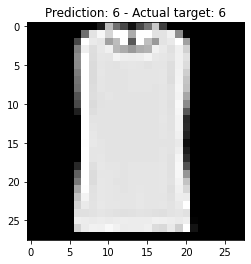

torch.Size([20, 1, 28, 28])


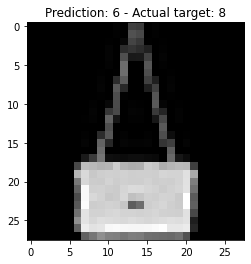

torch.Size([20, 1, 28, 28])


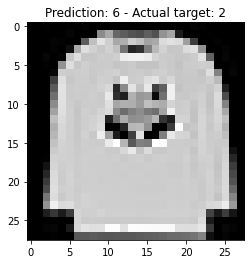

torch.Size([20, 1, 28, 28])


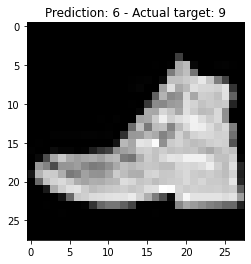

torch.Size([20, 1, 28, 28])


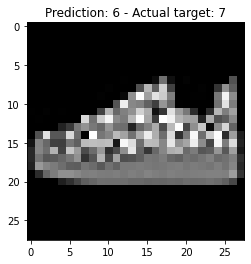

torch.Size([20, 1, 28, 28])


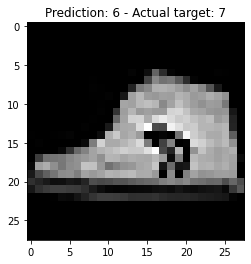

Accuracy: 10.000


In [163]:
acc = evaluate_model(test_loader2, model)
print('Accuracy: %.3f' % acc)